<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/EDA_linegraphs/EDA__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import glob
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
file_path = '/content/drive/MyDrive/group_9/Datasets/hps_sbps_unemp_merged.csv'
cols = list(pd.read_csv(file_path, nrows =1))
df = pd.read_csv(file_path,  usecols =[i for i in cols if i != 'Unnamed: 0'])

In [5]:
df.MONTH = df.MONTH.astype(str)
df.YEAR = df.YEAR.astype(str)
if len(df.MONTH) ==1:
  df.MONTH = "0"+df.MONTH

df['date'] = pd.to_datetime(df['YEAR']+df['MONTH'], format='%Y%m')
df.set_index(df['date'], inplace =True)

In [6]:
df.head()

STATE_ABBR  YEAR  ... unemployment_rate       date
date                         ...                             
2020-04-01         AL  2020  ...            12.700 2020-04-01
2020-05-01         AL  2020  ...             7.600 2020-05-01
2020-06-01         AL  2020  ...             8.000 2020-06-01
2020-08-01         AL  2020  ...             7.300 2020-08-01
2020-09-01         AL  2020  ...             6.800 2020-09-01

[5 rows x 44 columns]

In [31]:
df.describe().T

count   mean  ...    75%    max
AGE_GRP_18_24                             800.000  8.855  ...  9.956 16.970
AGE_GRP_25_39                             800.000 27.058  ... 28.747 36.292
AGE_GRP_40_49                             800.000 16.542  ... 17.324 23.433
AGE_GRP_50_59                             800.000 17.164  ... 18.160 22.602
AGE_GRP_60_69                             800.000 17.882  ... 19.061 24.613
AGE_GRP_70_up                             800.000 11.552  ... 12.517 16.845
AGE_GRP_less_18                           800.000  0.947  ...  1.253  3.518
COVID_VACC_DOSE_not_plan_all_dose         800.000  0.053  ...  0.000  1.223
COVID_VACC_DOSE_plan_to_receive_all_doses 800.000  0.373  ...  0.000  8.377
COVID_VACC_DOSE_received_all_doses        800.000  9.527  ...  0.000 90.090
EDUCATION_bachelor_or_higher              800.000 29.590  ... 32.442 42.529
EDUCATION_high_school_diploma_GED         800.000 36.908  ... 40.031 51.887
EDUCATION_less_high school                800.000  1.966  ...  2.425  6.976
EDUCATION_some_college_asscte_degree      800.000 31.536  ... 34.157 47.953
INCOME_BEFORE_TAX_$100,000_$149,999       800.000 11.639  ... 13.157 19.540
INCOME_BEFORE_TAX_$150,000_$199,999       800.000  4.928  ...  5.957  9.843
INCOME_BEFORE_TAX_$200,000_above          800.000  4.887  ...  5.780 12.098
INCOME_BEFORE_TAX_$25,000_$34,999         800.000  8.334  ...  9.495 15.581
INCOME_BEFORE_TAX_$35,000_$49,999         800.000  9.554  ... 10.693 16.073
INCOME_BEFORE_TAX_$50,000_$74,999         800.000 13.806  ... 15.100 23.166
INCOME_BEFORE_TAX_$75,000_$99,999         800.000 10.318  ... 11.357 17.359
INCOME_BEFORE_TAX_Less_$25,000            800.000 10.645  ... 12.313 28.377
RACE_Any_other_race_alone_or_mixed_race   800.000  6.476  ...  6.791 40.273
RACE_Asian,_alone                         800.000  4.351  ...  4.934 41.692
RACE_Black_alone                          800.000  9.928  ... 14.222 35.113
RACE_White_alone                          800.000 79.245  ... 88.709 96.840
FOOD_SCARCITY                             800.000  9.677  ... 11.416 22.533
HOUSING_INSECURITY                        800.000  2.238  ...  2.744  6.102
MALE                                      800.000 48.631  ... 49.335 51.159
FEMALE                                    800.000 51.369  ... 52.005 53.073
HISPANIC_ORIGIN                           800.000 11.228  ... 13.158 46.734
RECVD_COVID_VACC                          400.000 58.206  ... 79.898 92.916
CHILDCARE_ISSUE                           250.000 19.307  ... 23.293 36.747
Expected recovery index                   800.000 -0.518  ... -0.468 -0.305
Financial stress index                    450.000 -0.314  ... -0.297 -0.230
Market challenges index                    50.000  0.076  ...  0.094  0.125
Market(s) challenges index                 50.000  0.080  ...  0.098  0.170
Operational challenges index              800.000 -0.171  ... -0.115 -0.043
Overall sentiment index                   800.000 -0.465  ... -0.396 -0.223
unemployment_rate                         800.000  6.894  ...  8.000 29.700

[40 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


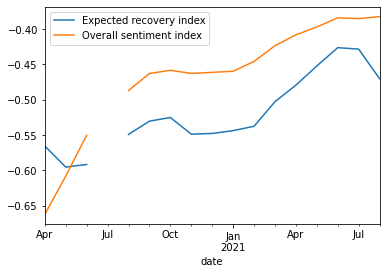

In [7]:
df.groupby(pd.Grouper(freq='M'))['Expected recovery index', 'Overall sentiment index'].mean().plot()

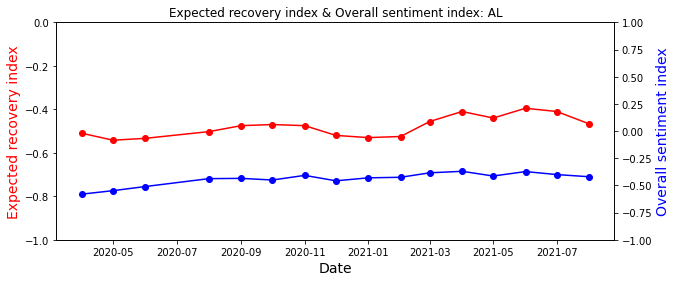

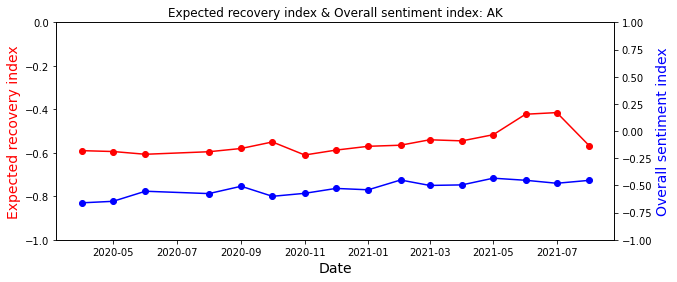

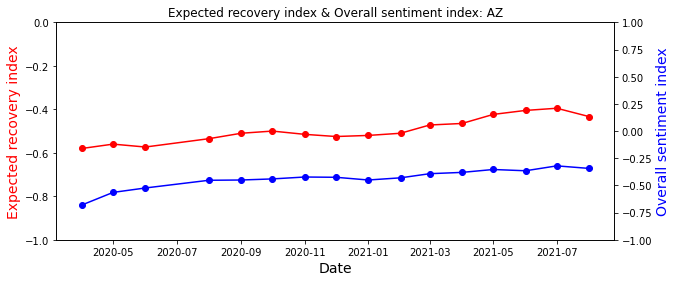

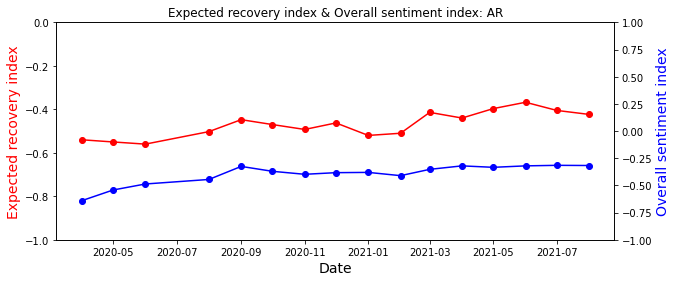

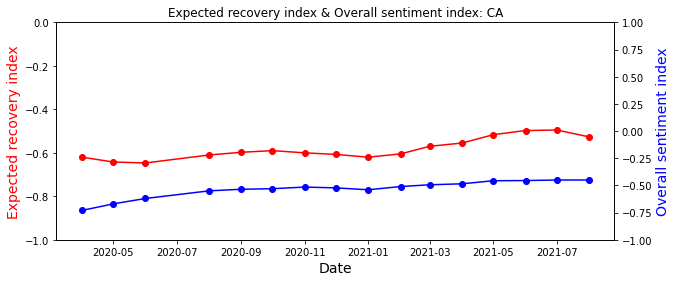

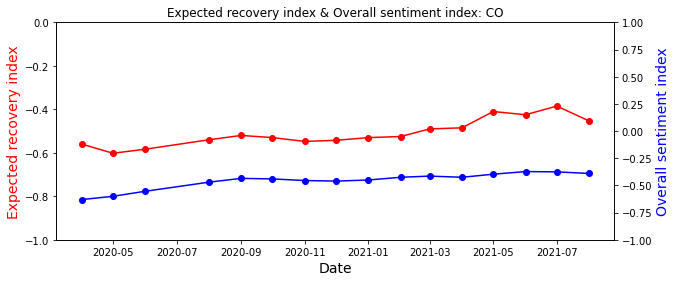

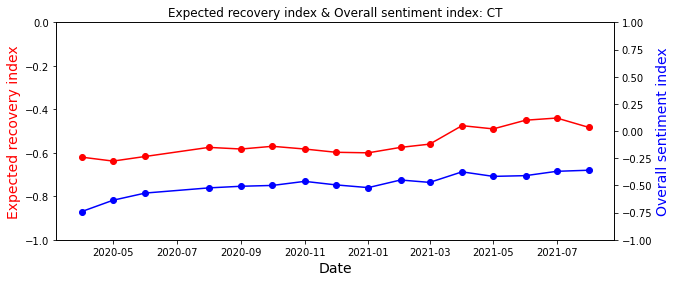

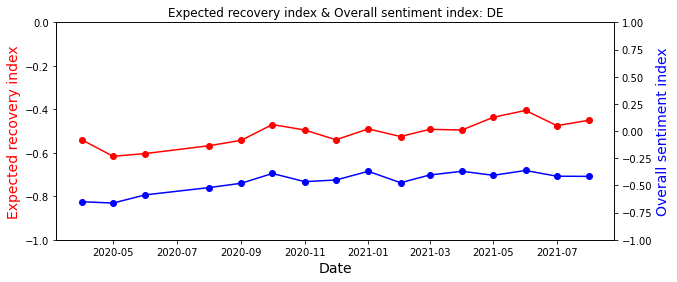

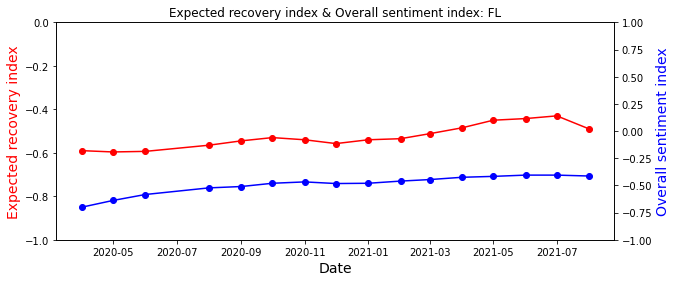

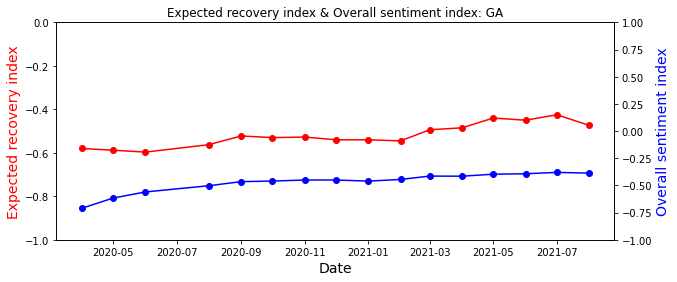

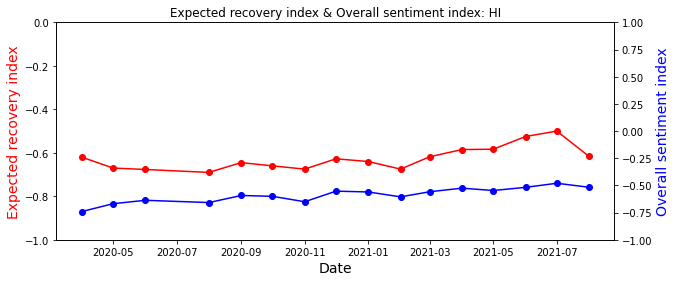

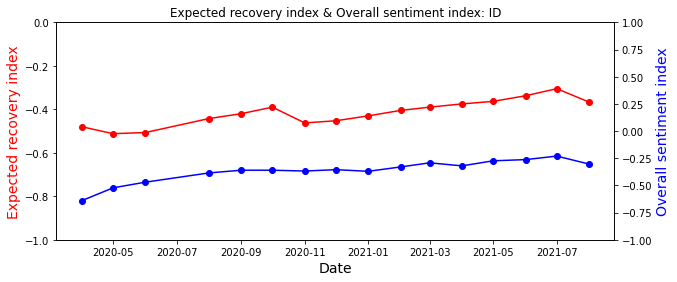

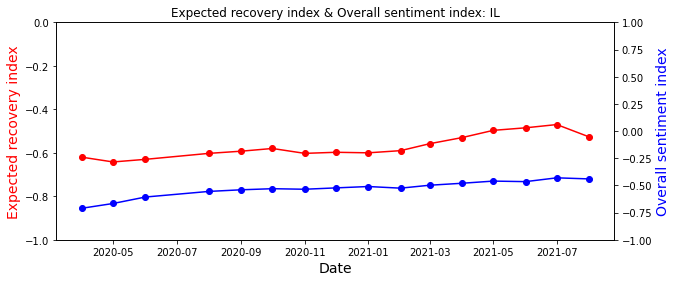

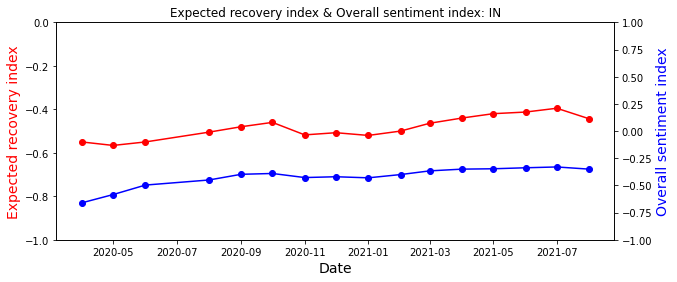

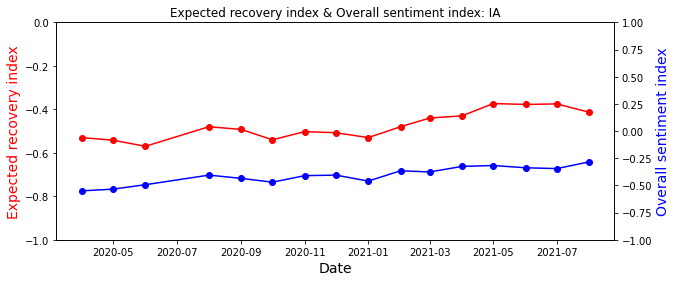

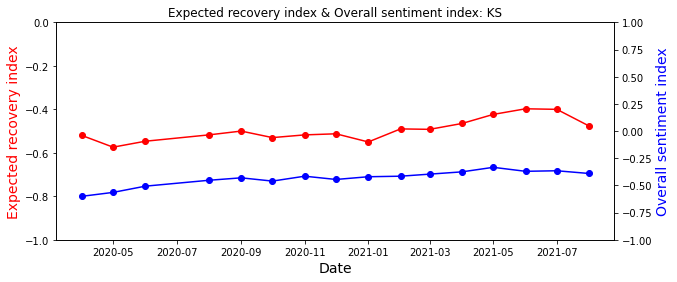

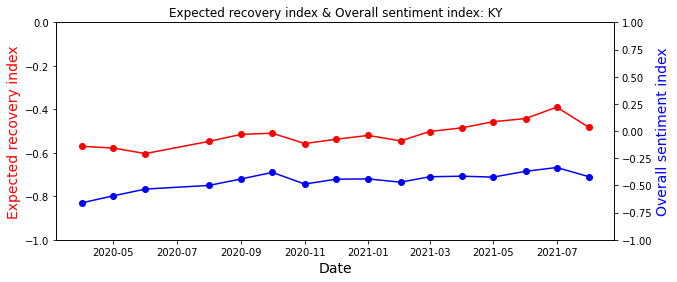

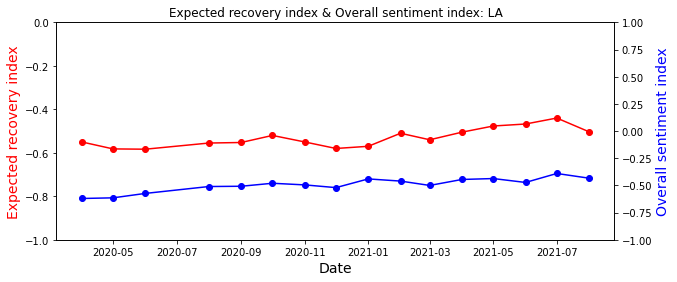

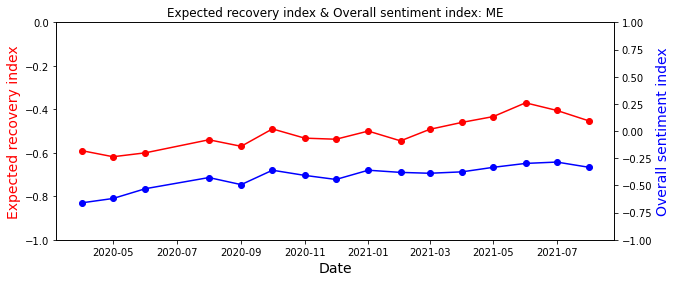

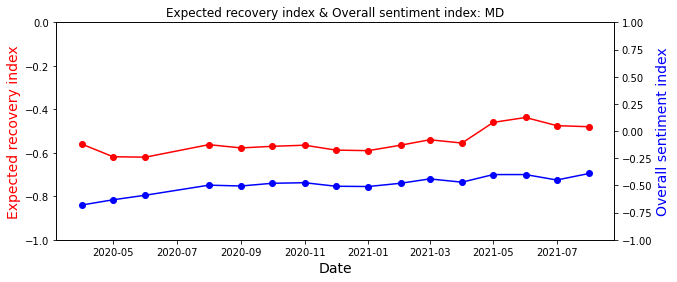

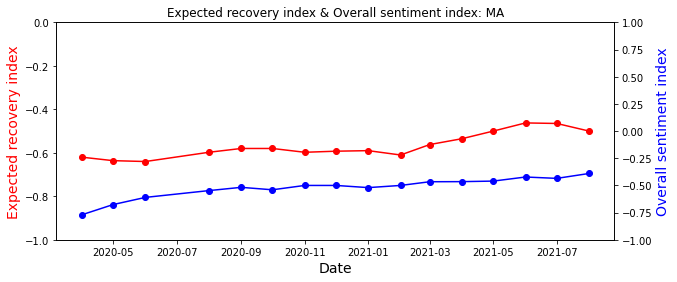

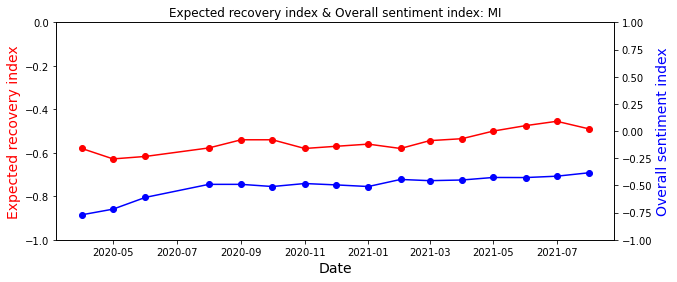

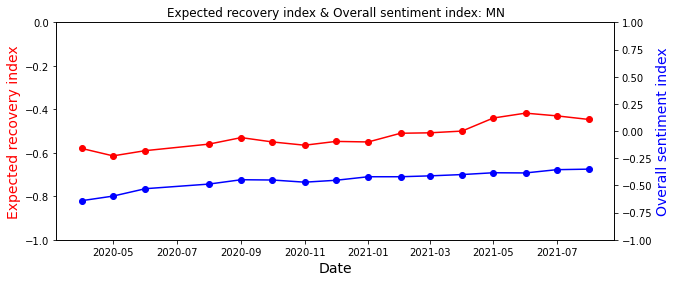

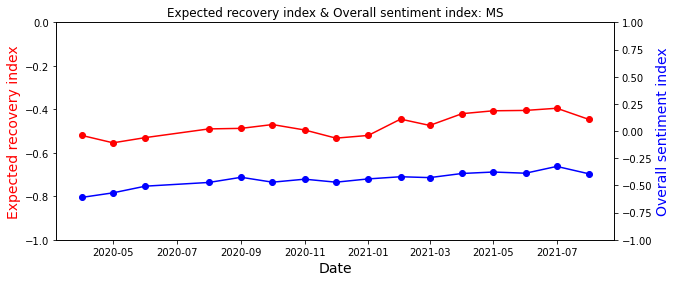

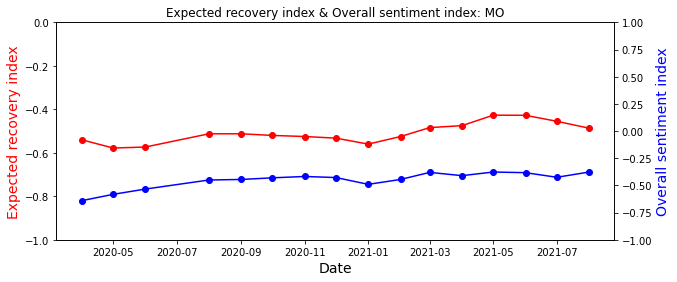

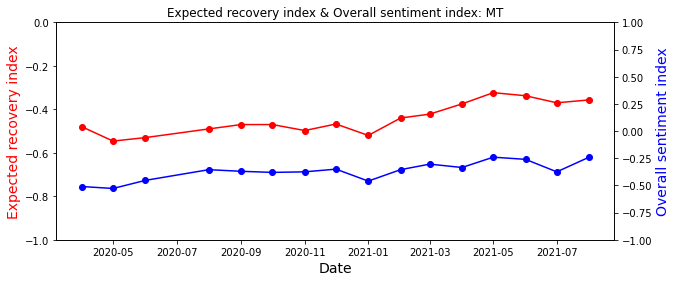

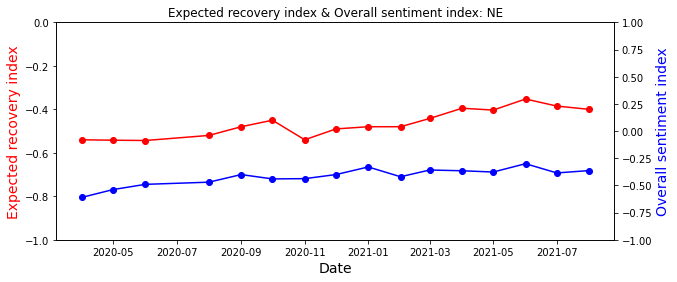

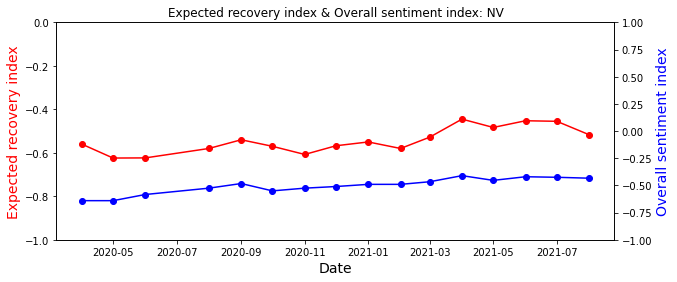

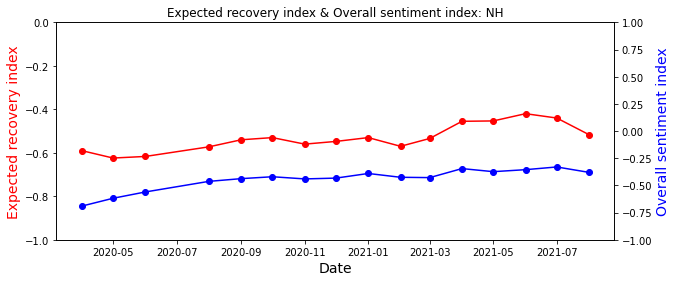

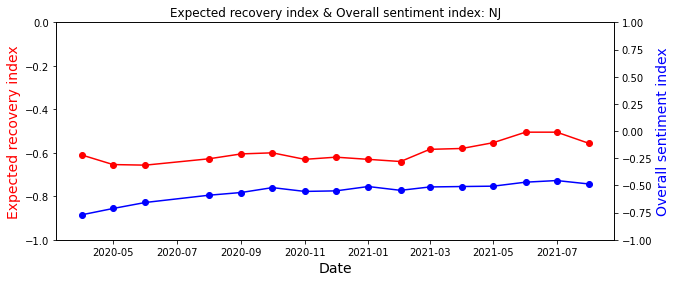

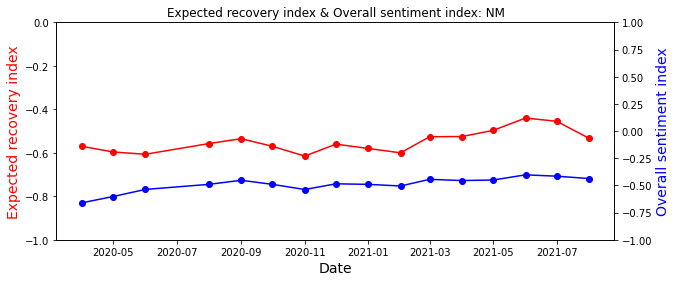

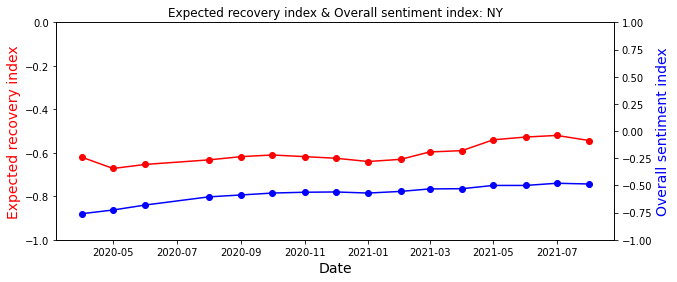

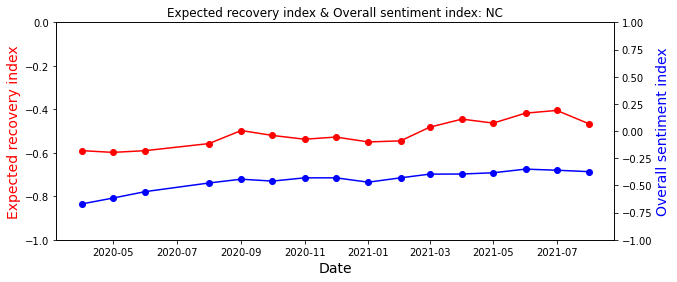

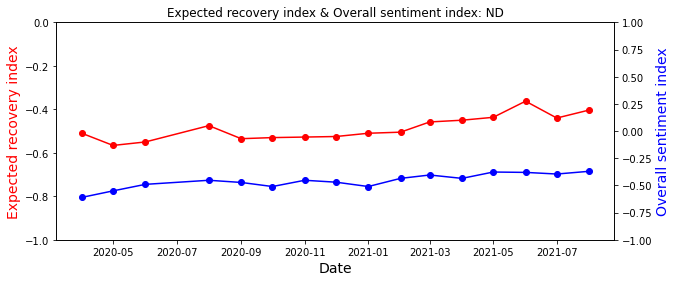

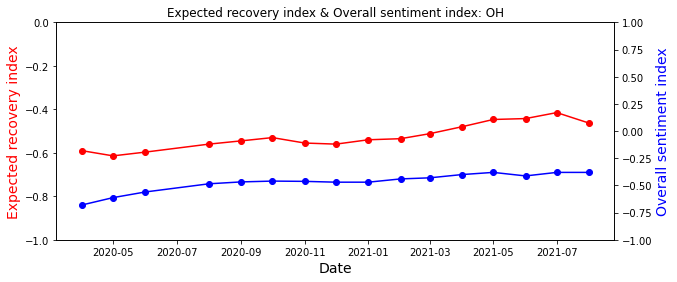

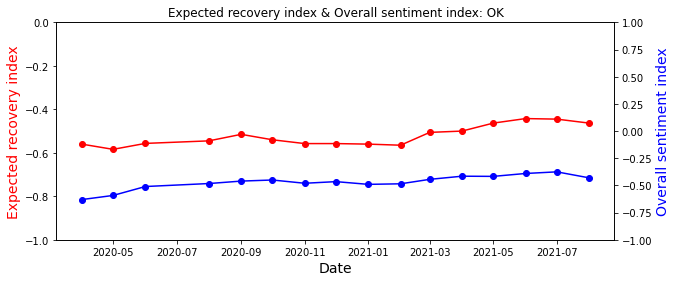

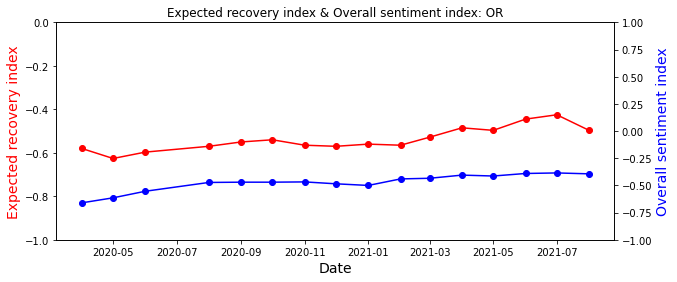

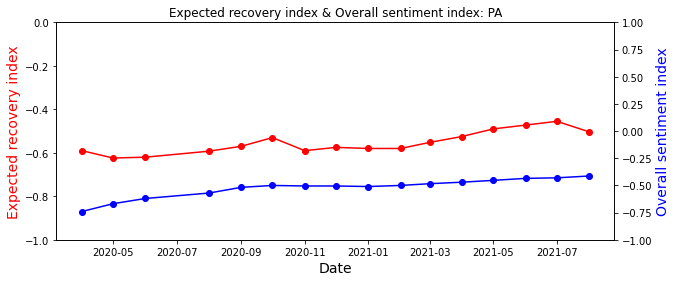

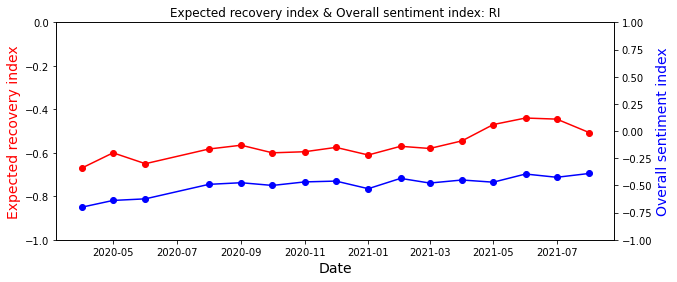

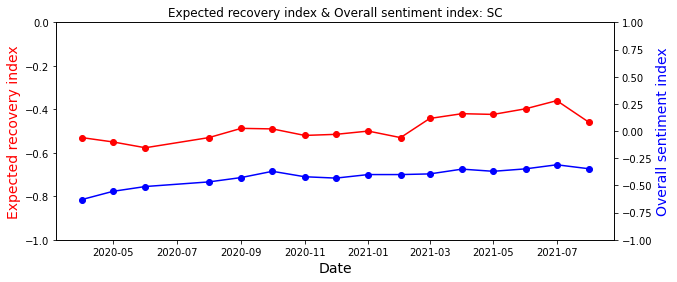

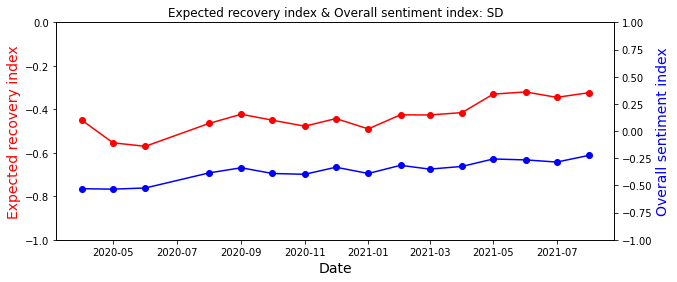

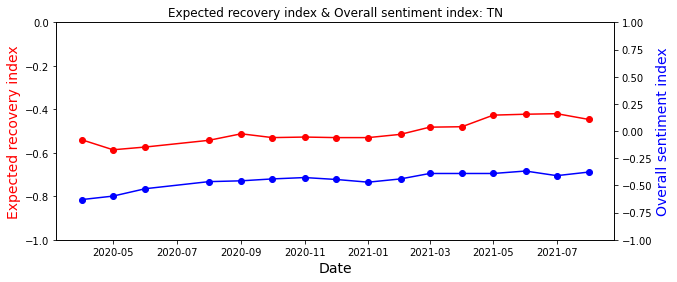

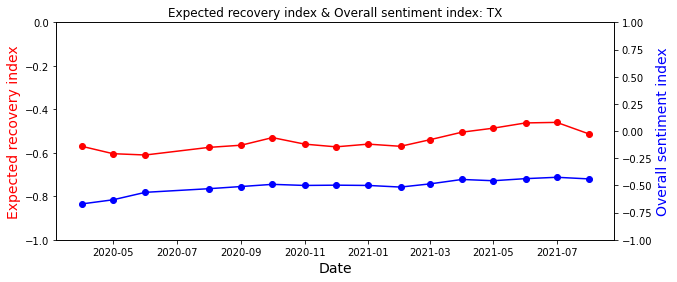

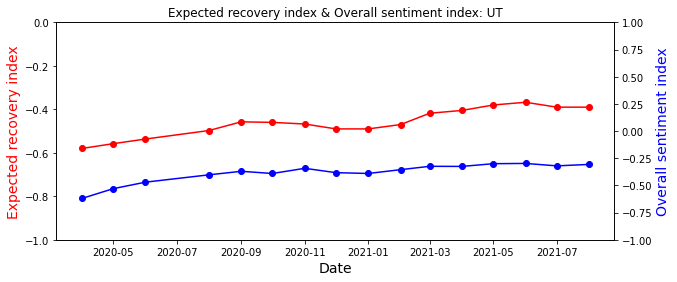

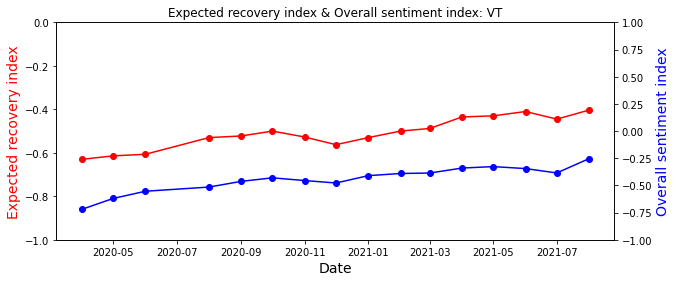

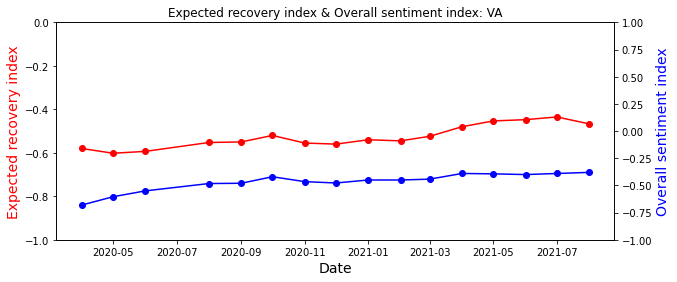

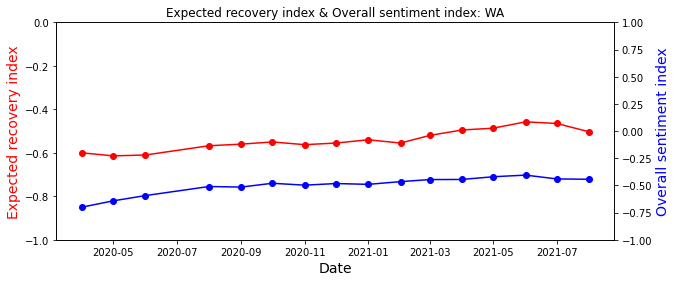

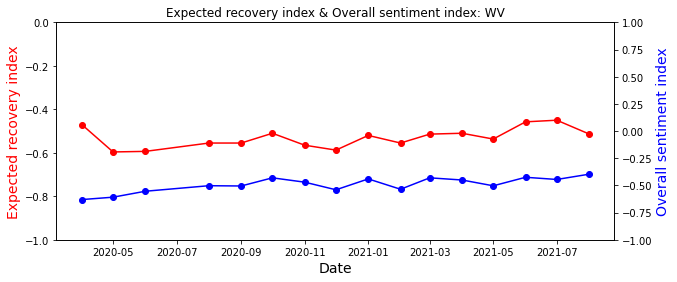

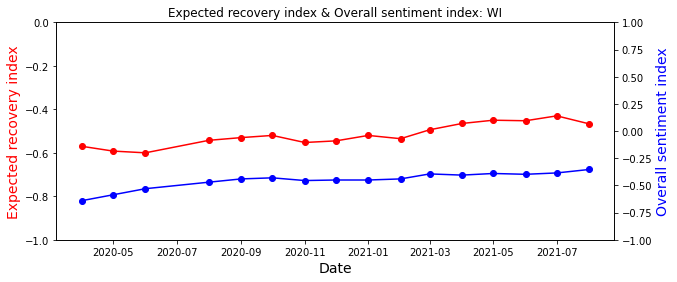

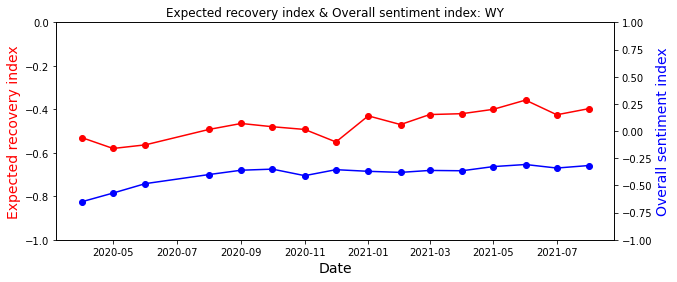

In [77]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'Overall sentiment index'
   title = 'Expected recovery index & Overall sentiment index: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([-1,1])
   plt.title(title +state)
   plt.show()


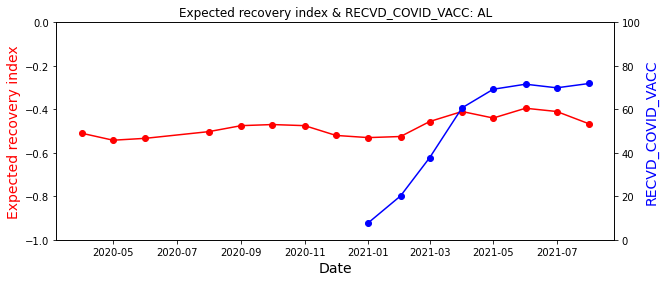

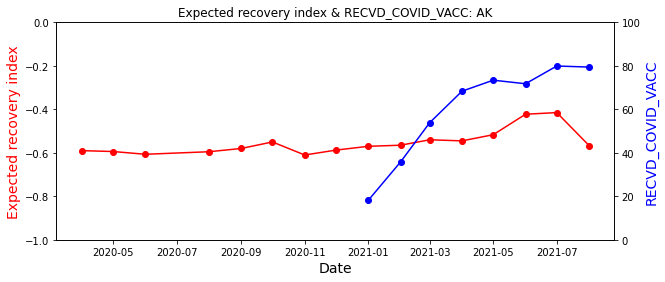

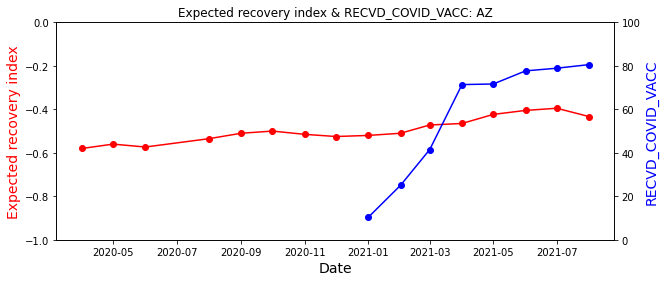

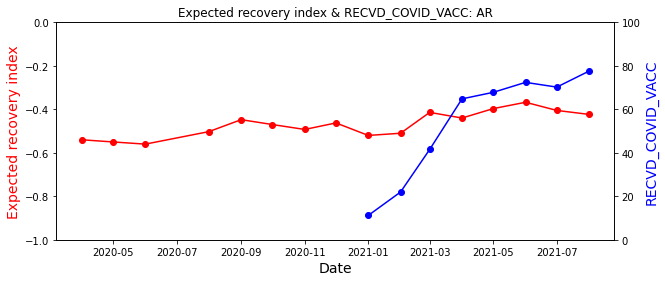

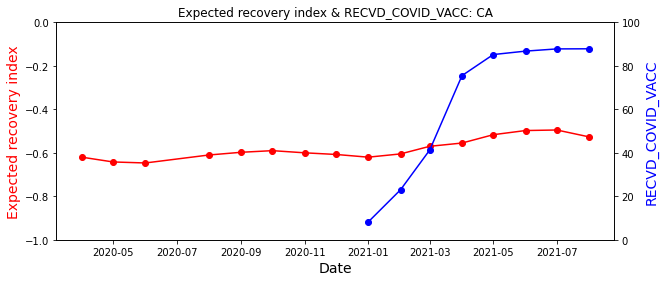

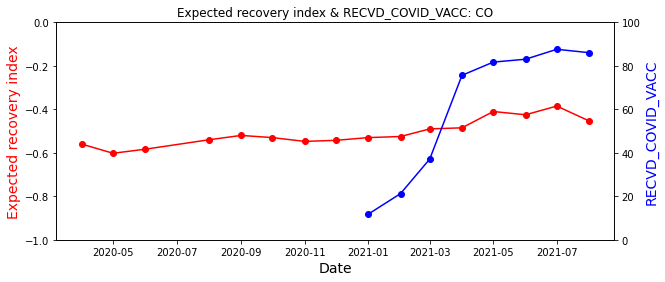

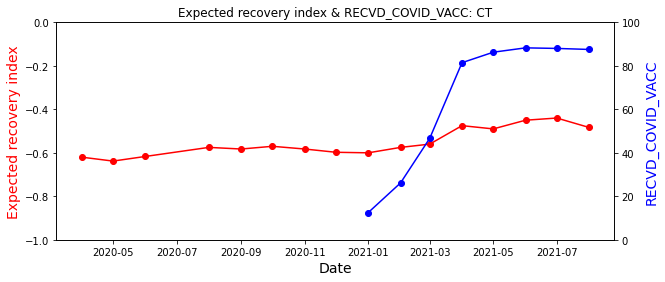

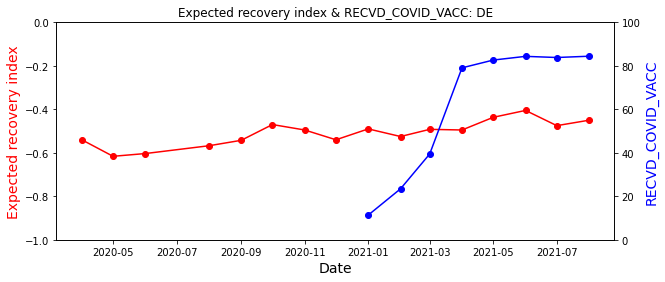

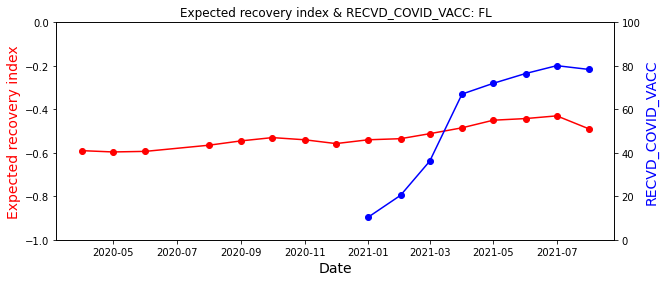

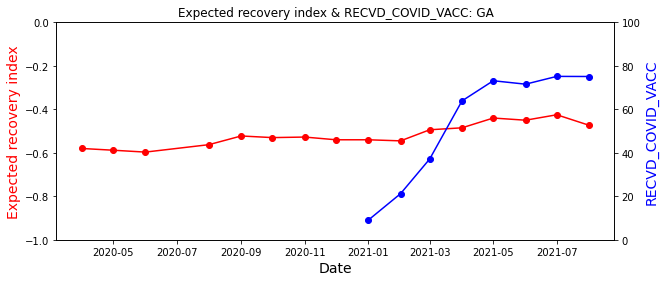

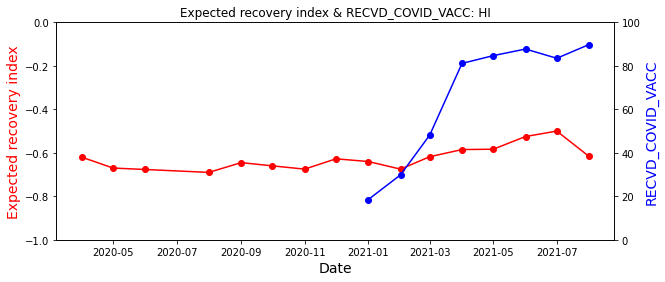

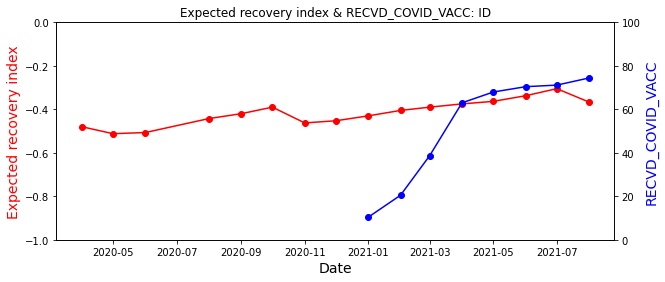

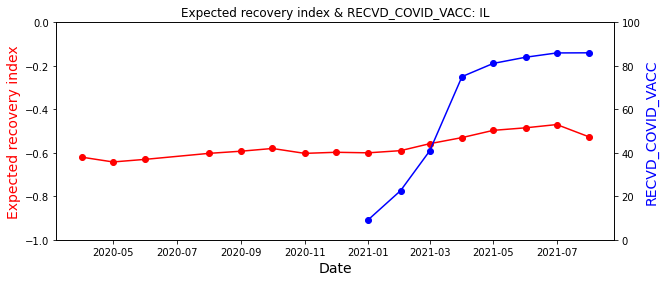

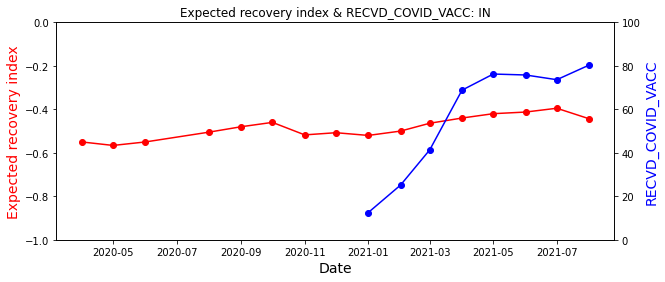

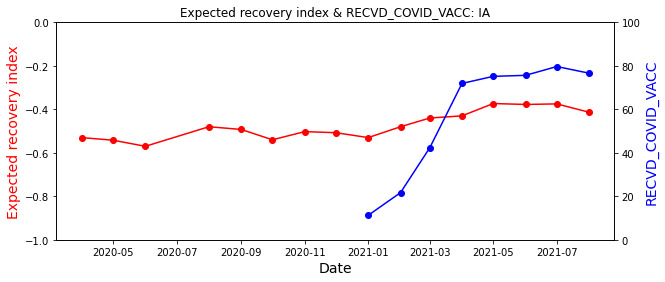

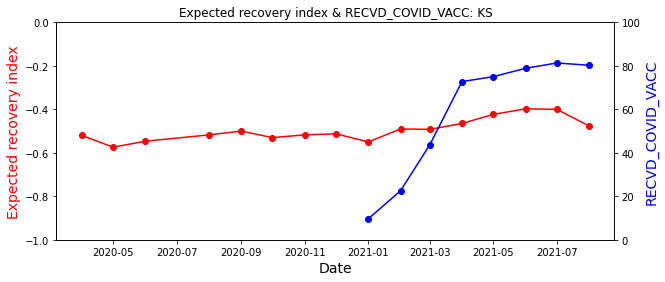

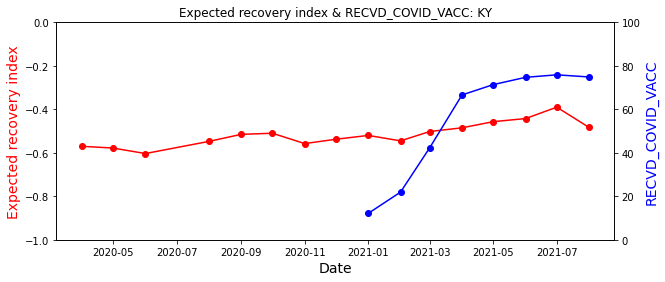

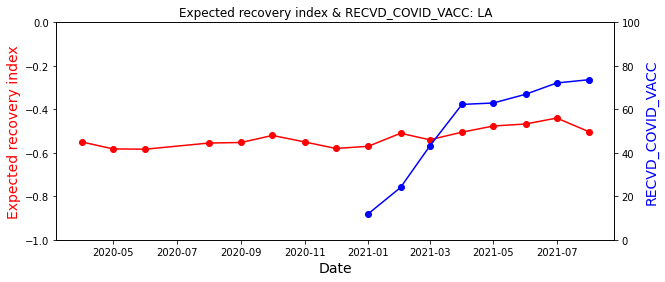

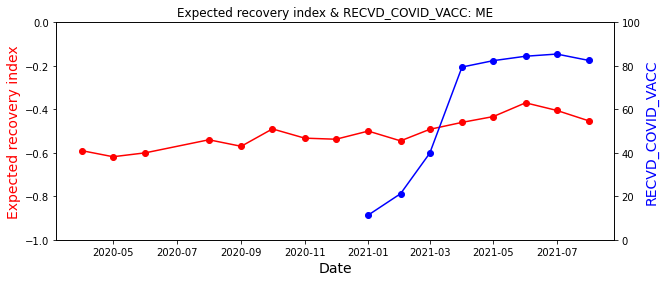

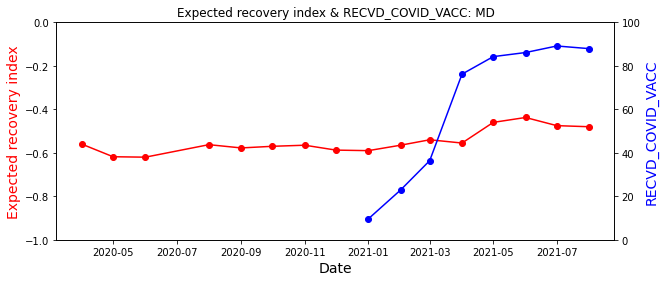

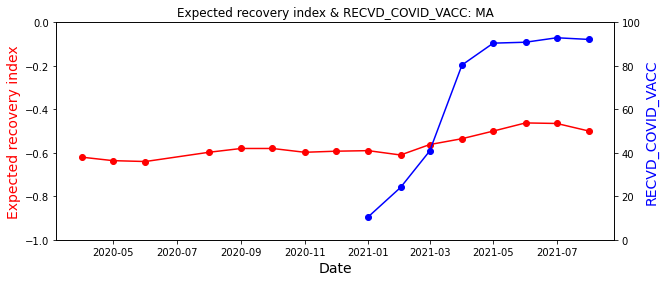

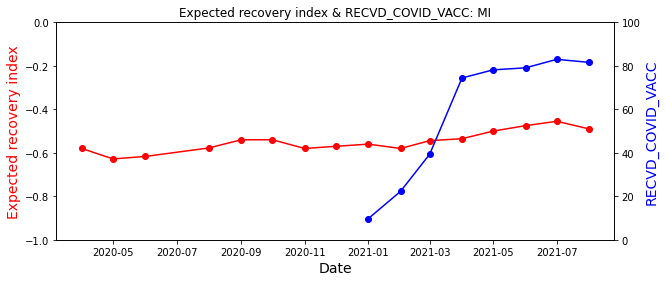

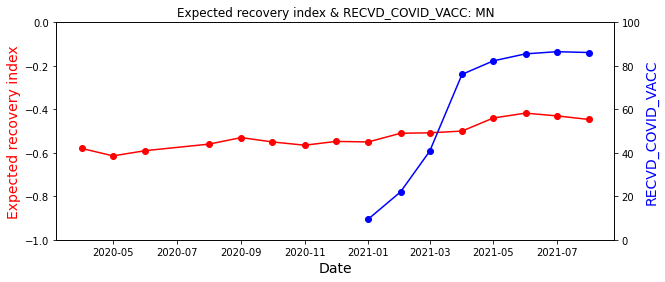

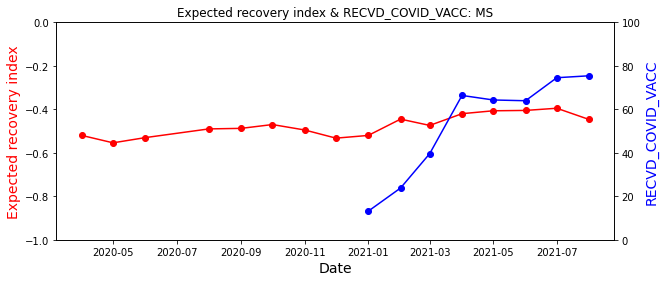

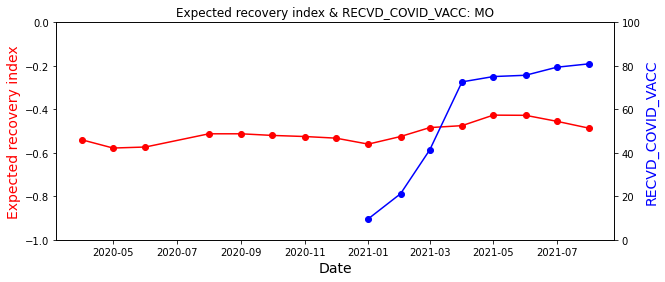

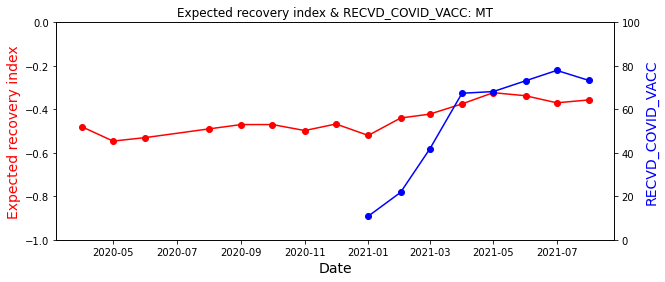

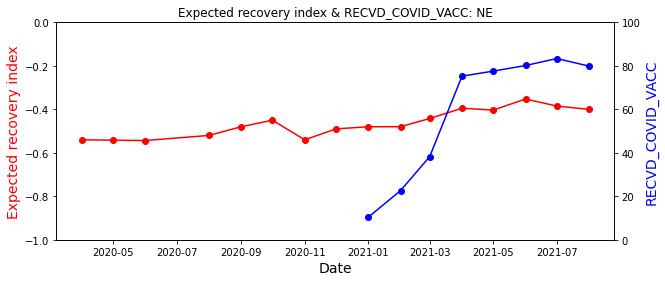

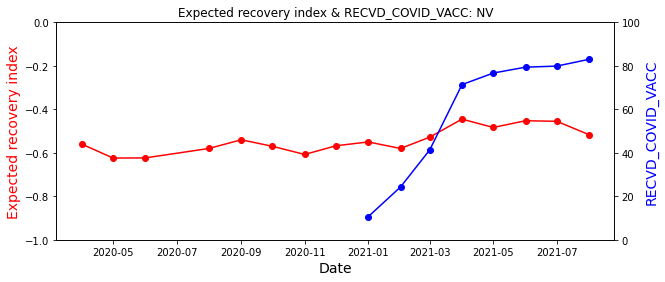

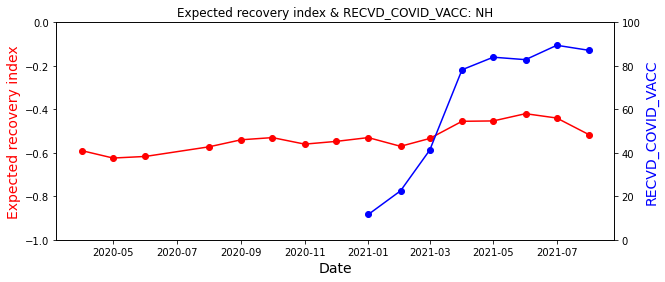

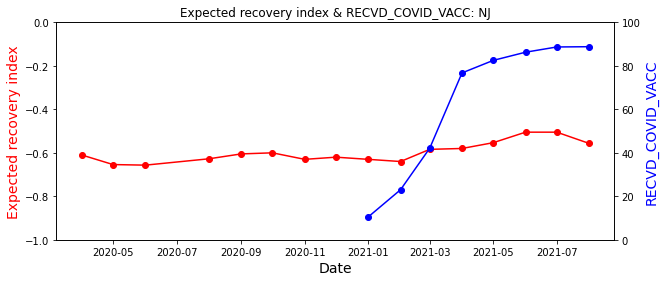

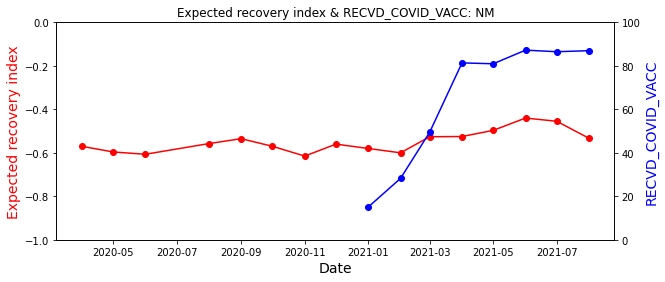

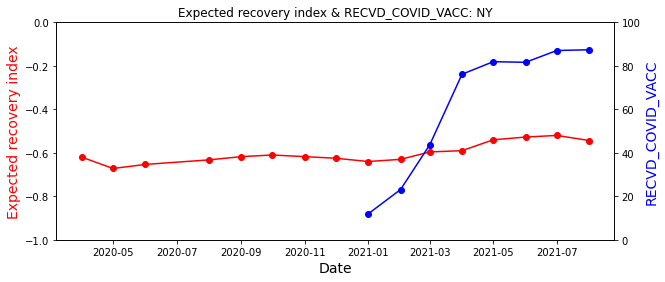

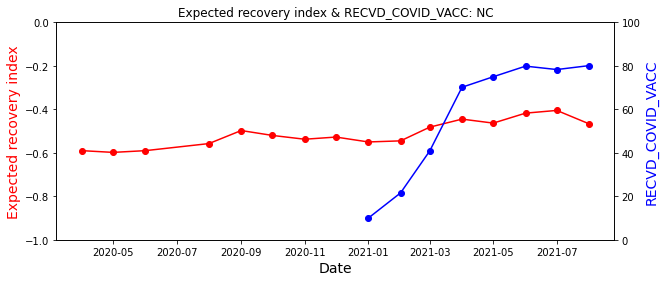

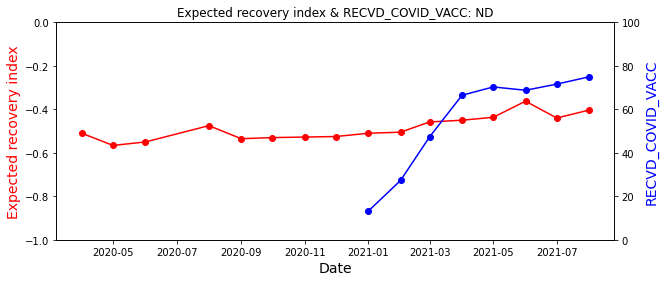

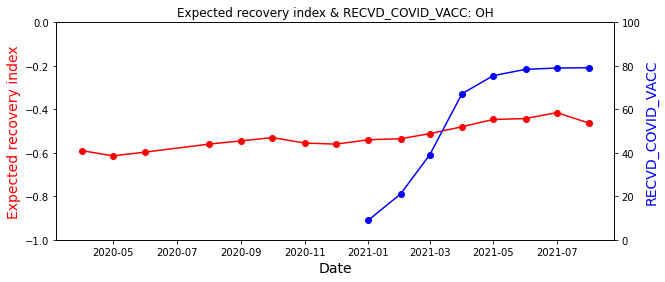

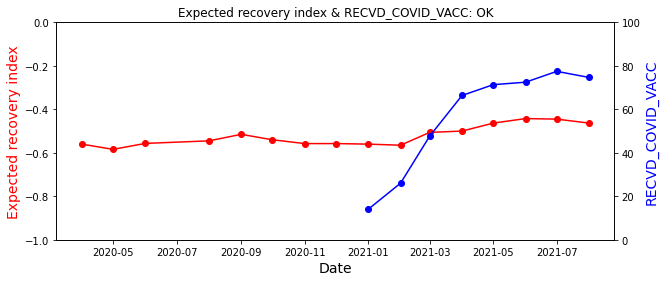

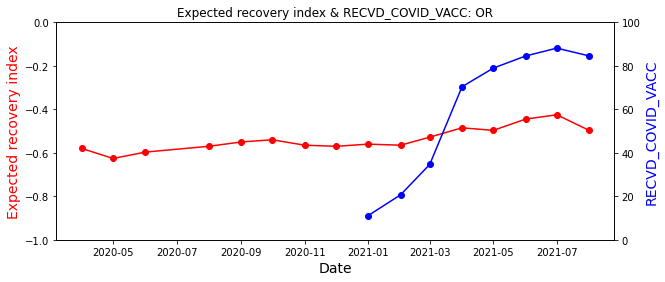

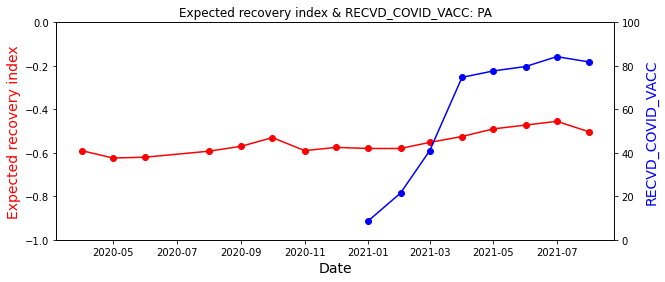

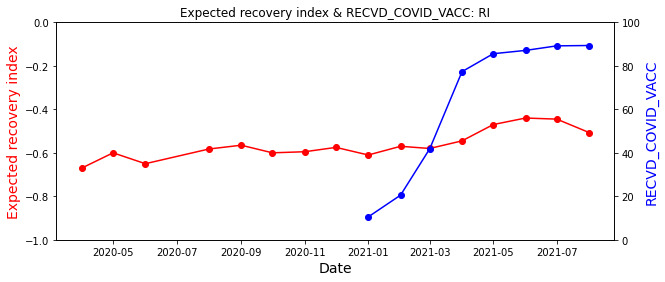

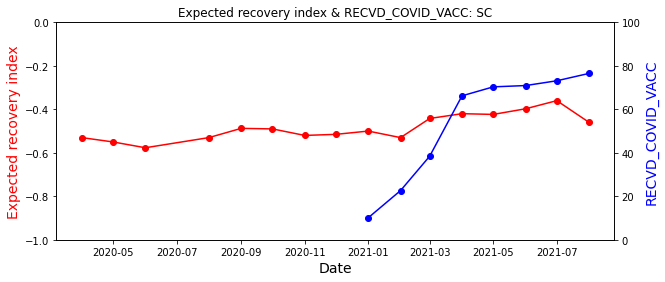

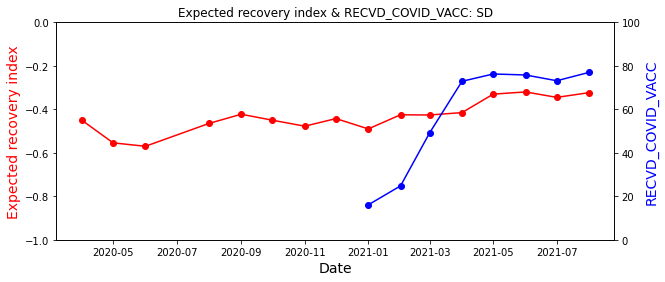

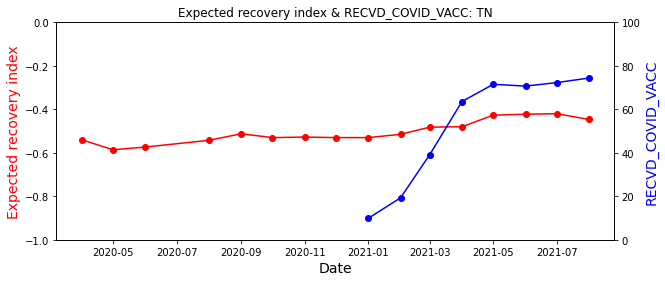

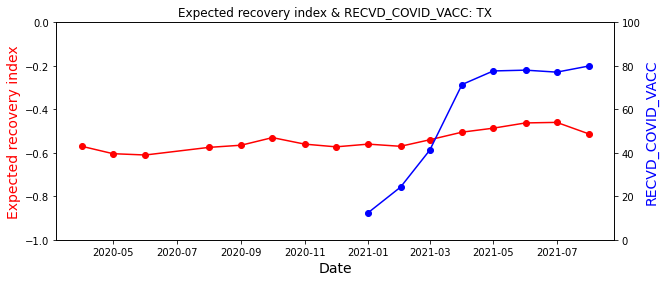

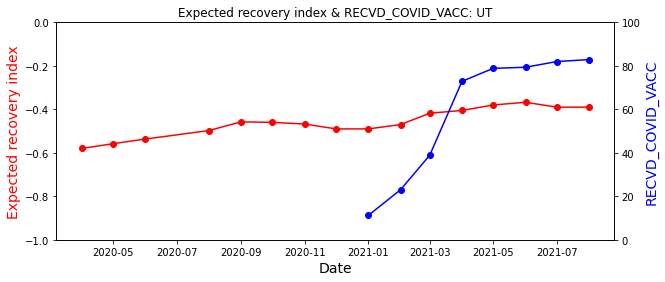

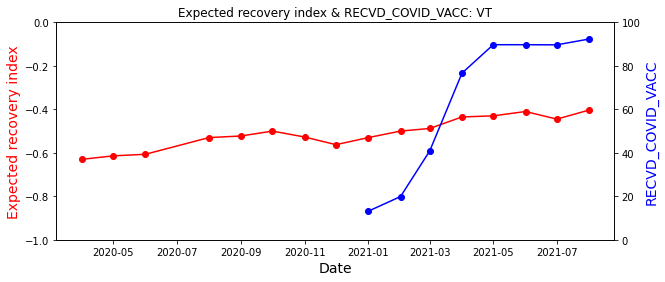

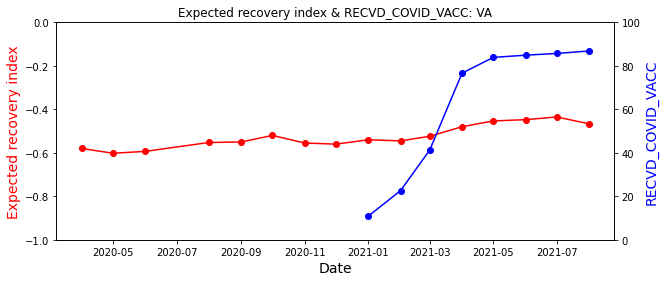

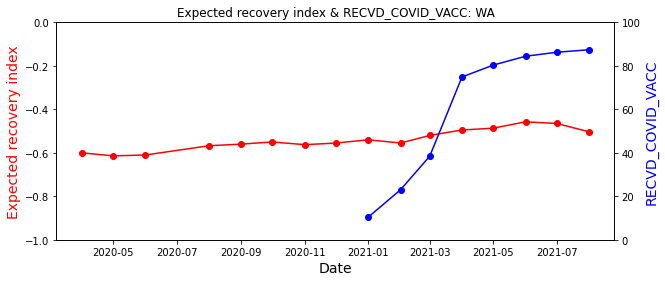

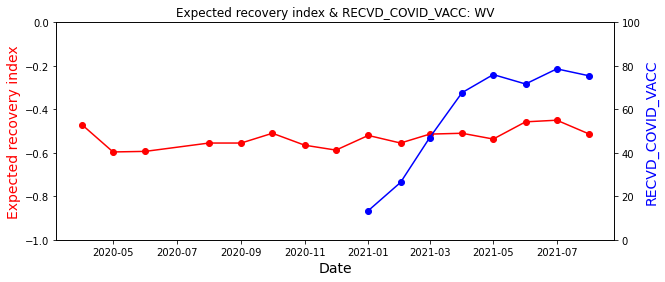

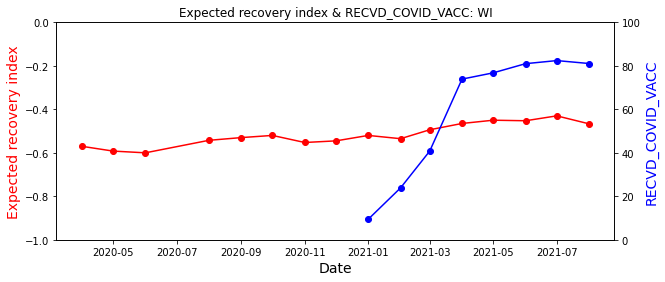

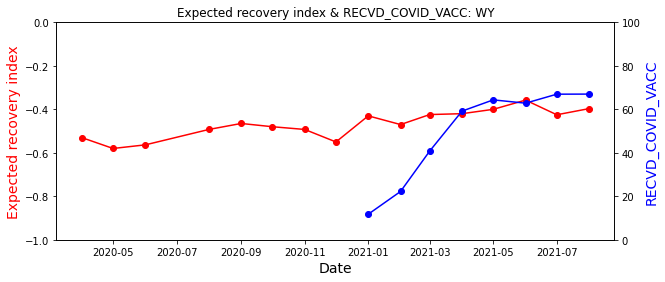

In [85]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'RECVD_COVID_VACC'
   title = 'Expected recovery index & RECVD_COVID_VACC: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([0,100])
   plt.title(title +state)
   plt.show()


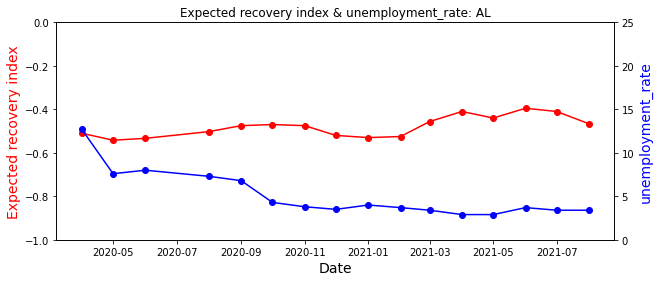

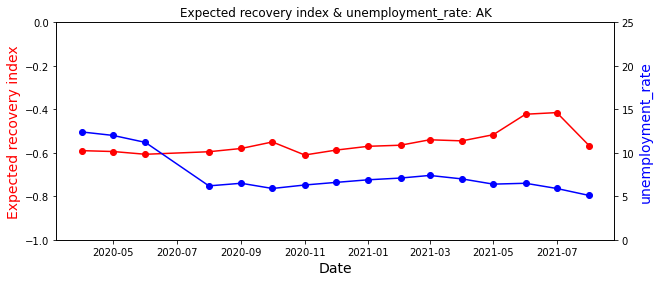

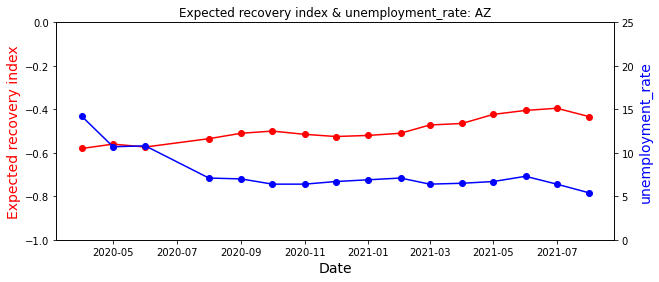

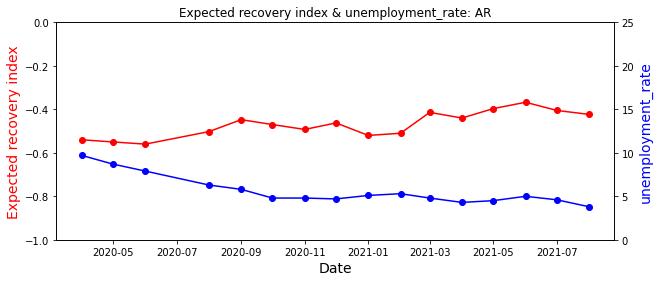

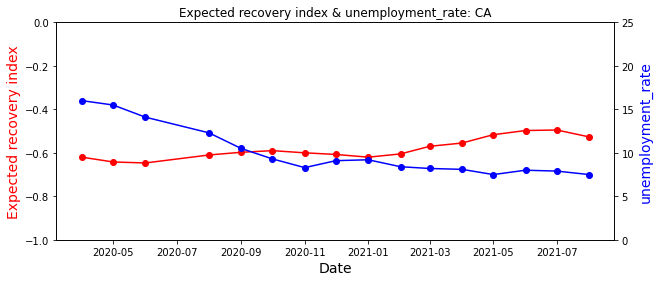

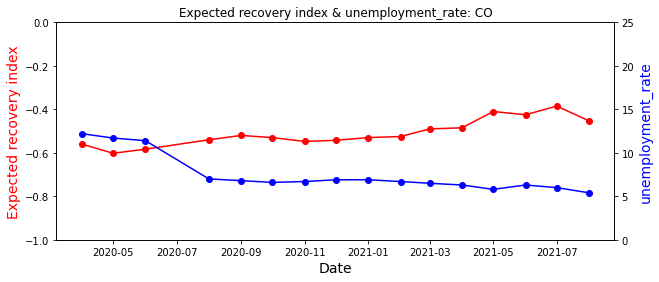

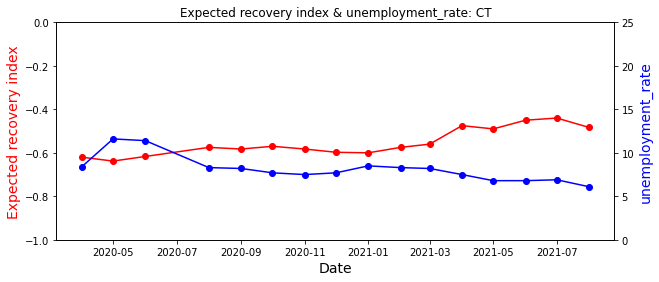

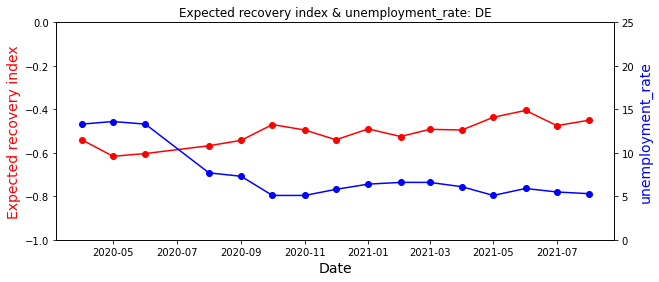

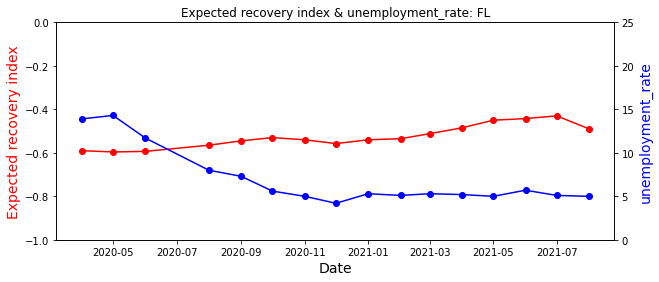

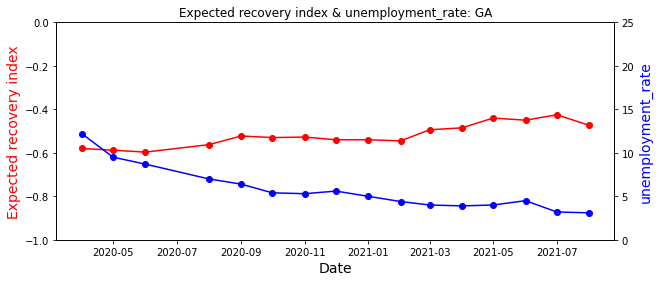

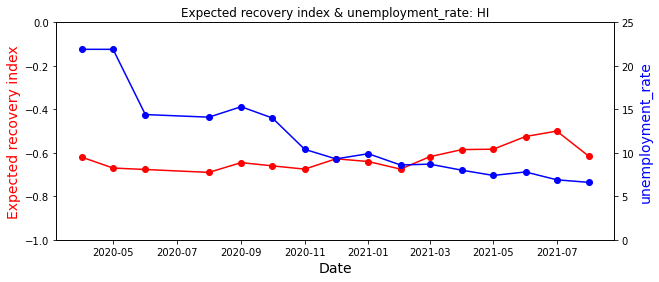

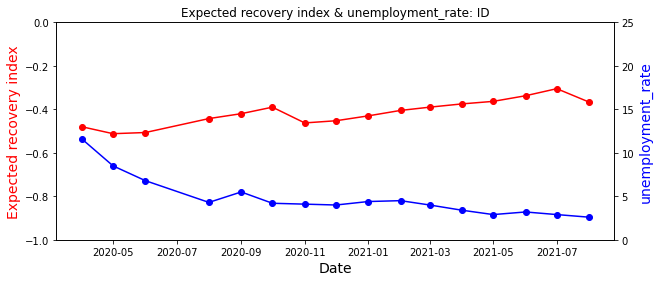

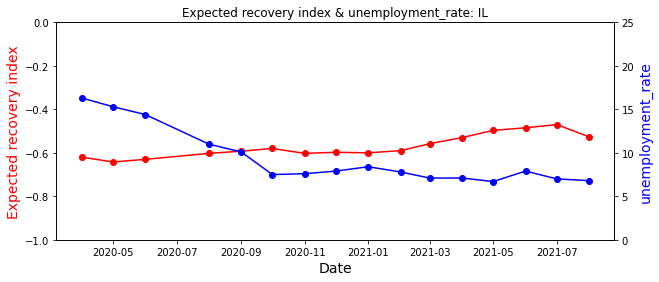

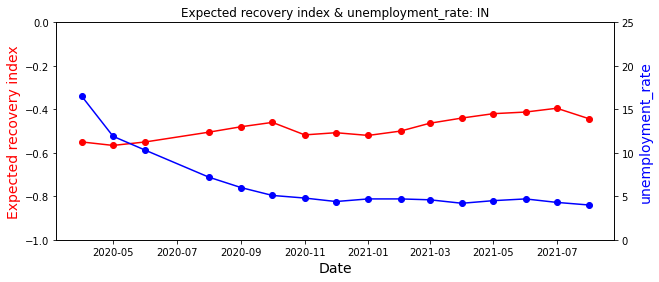

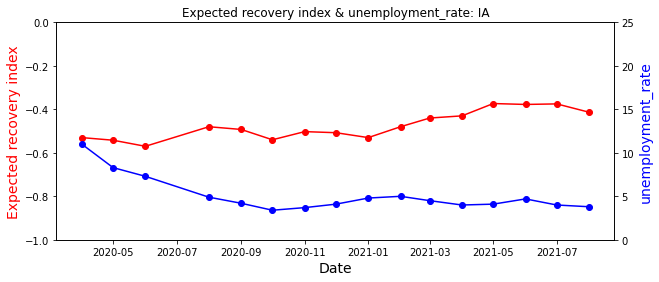

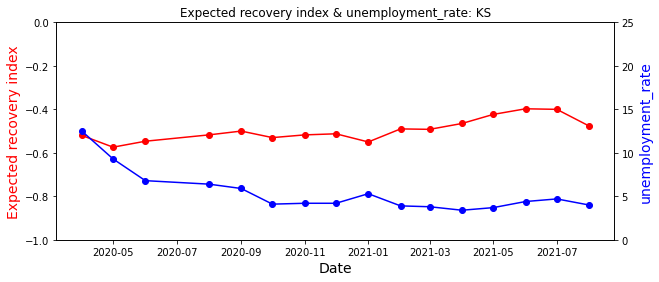

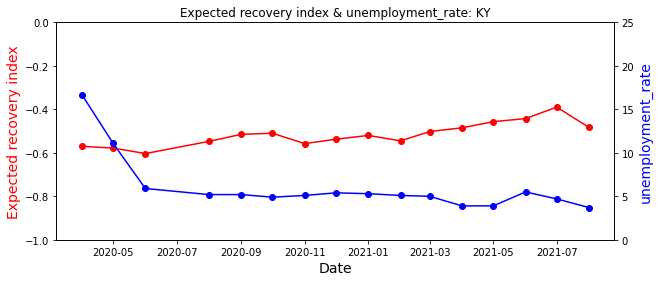

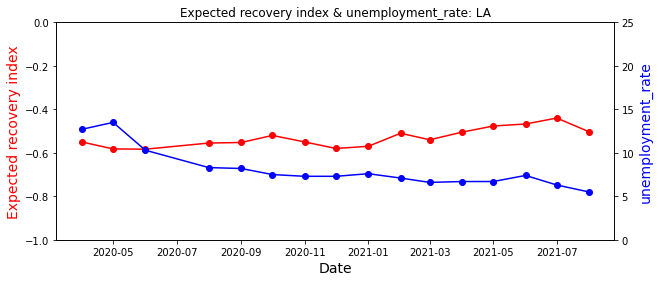

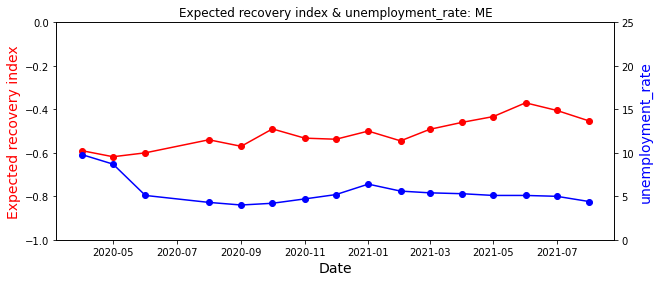

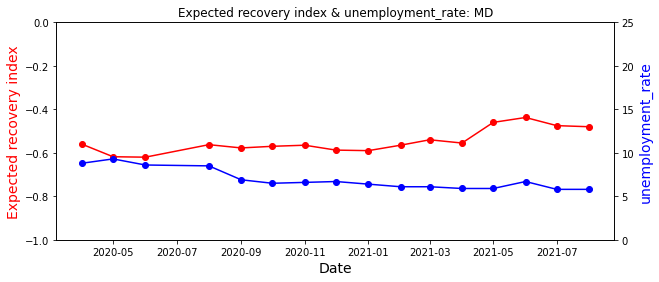

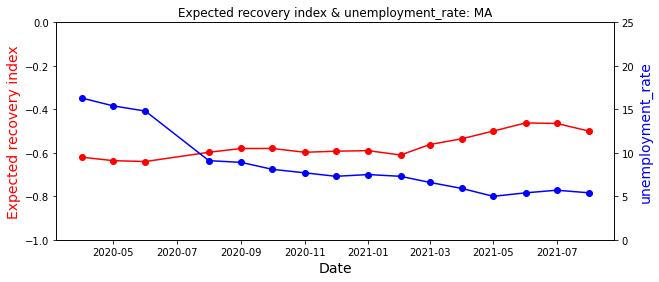

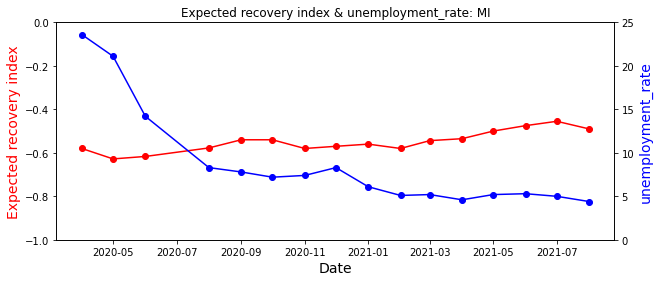

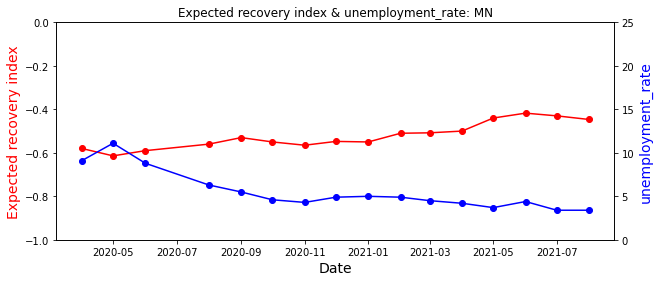

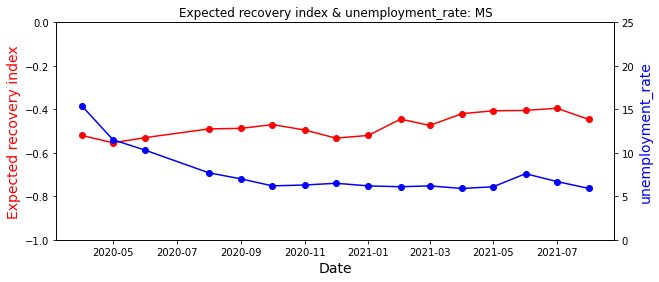

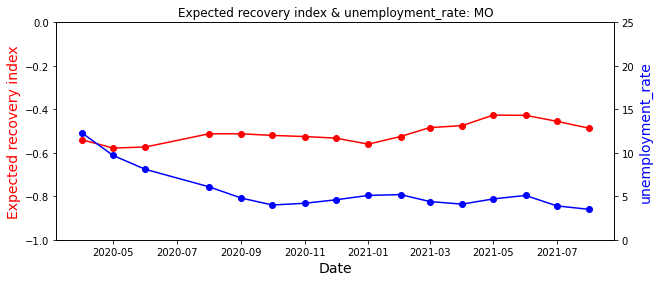

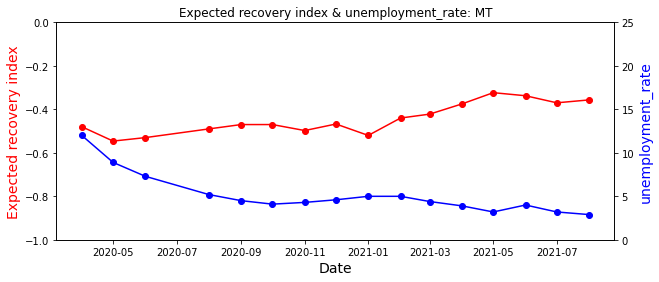

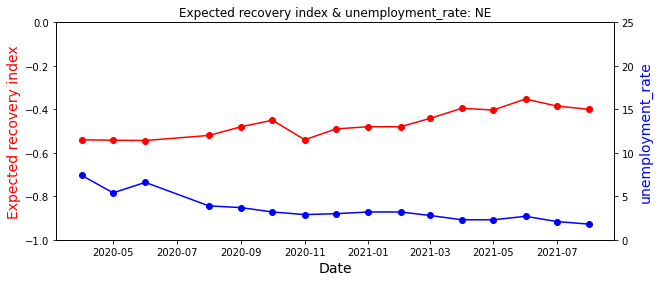

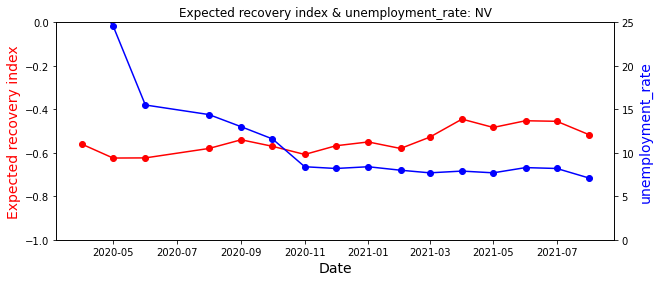

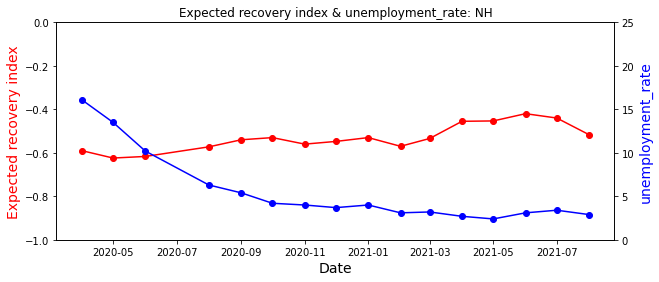

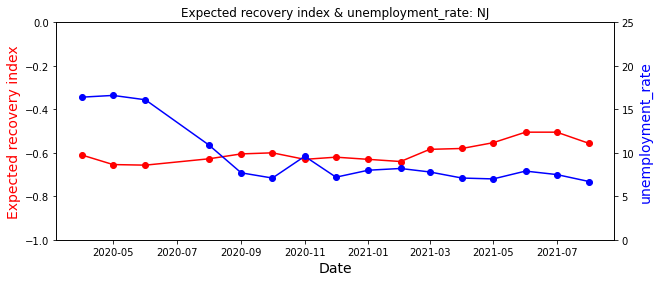

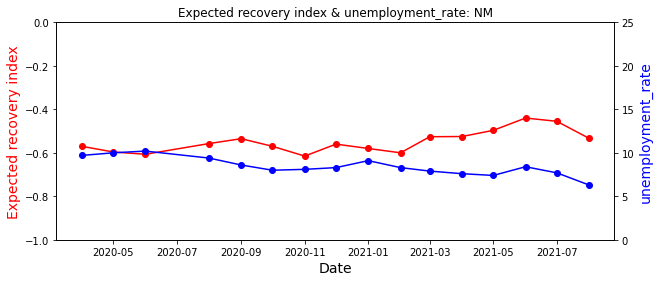

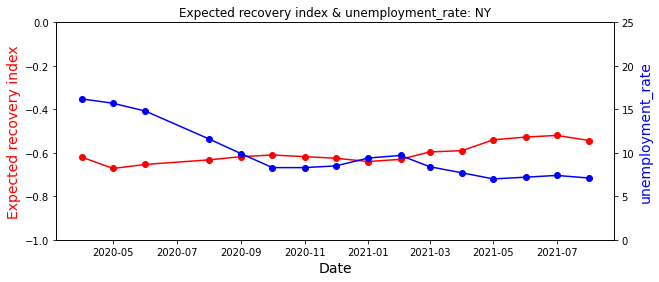

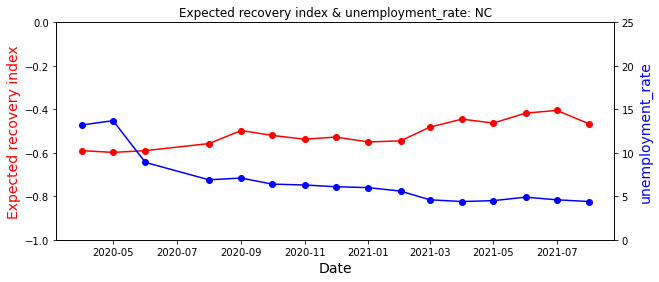

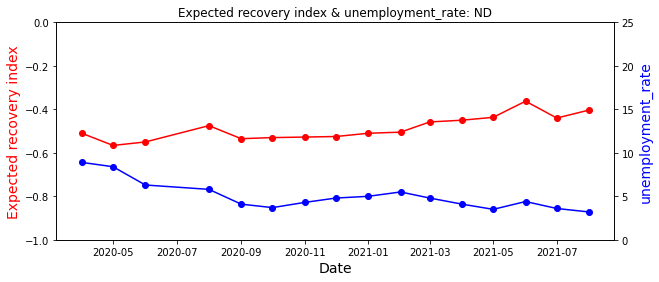

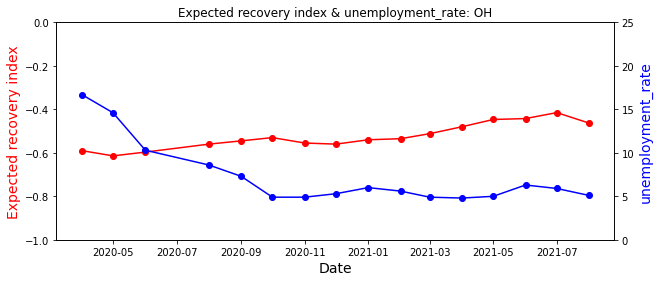

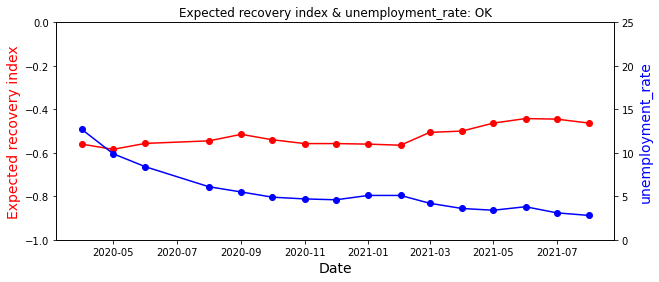

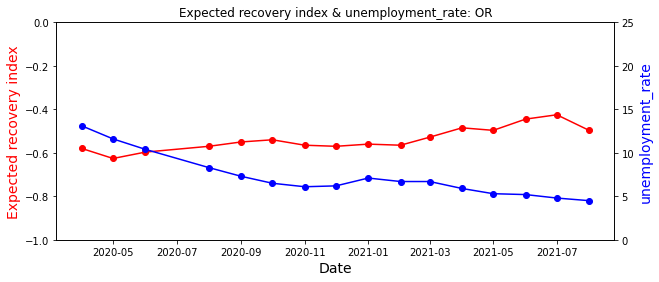

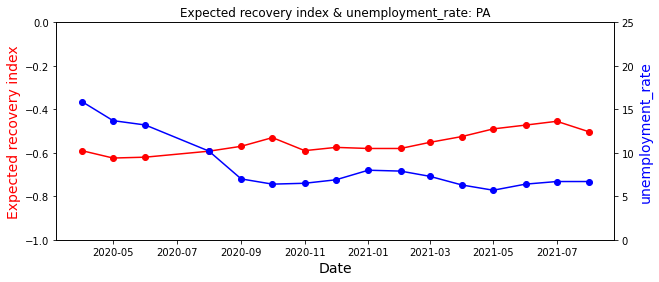

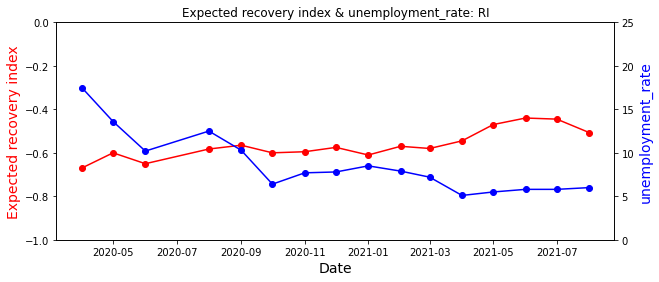

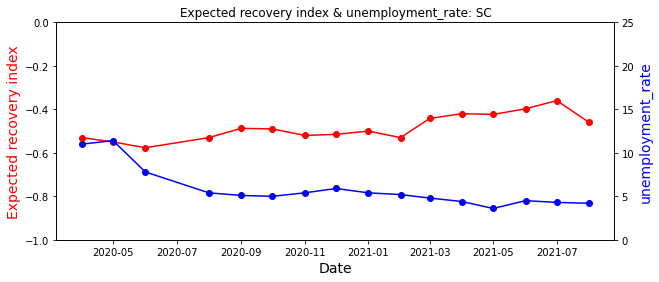

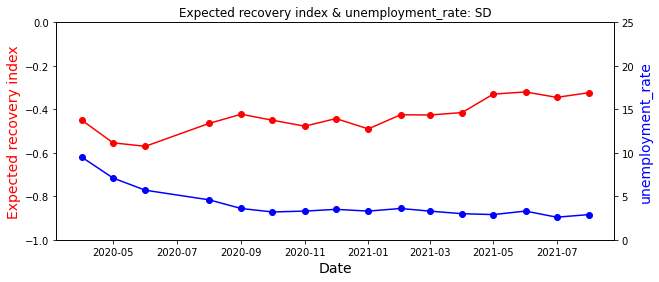

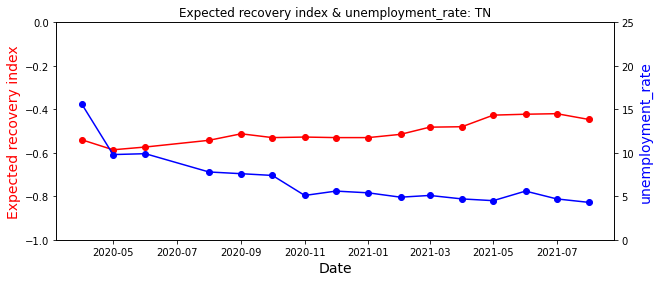

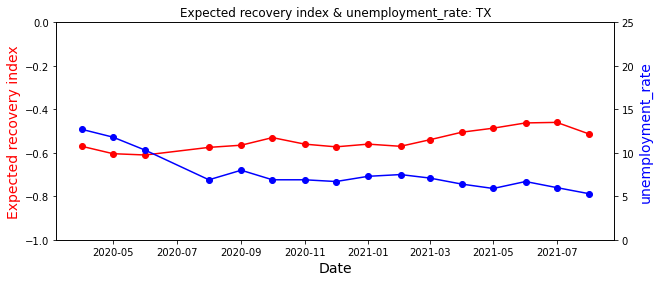

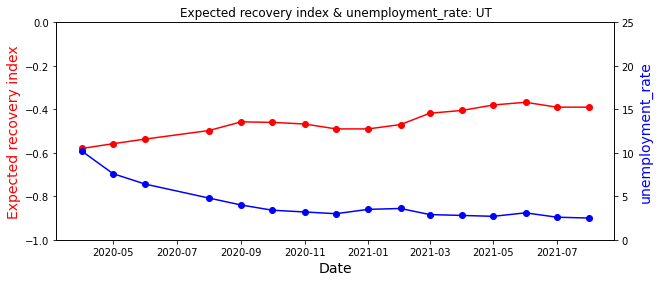

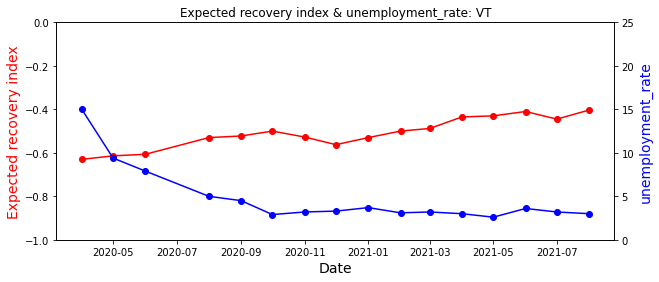

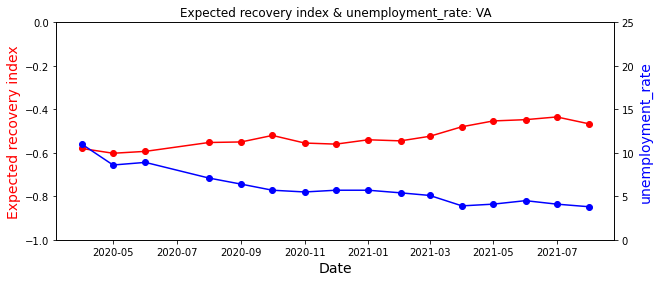

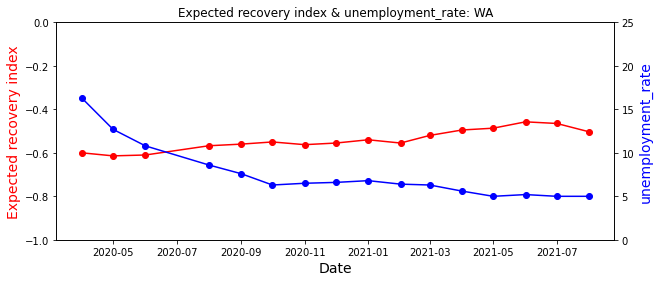

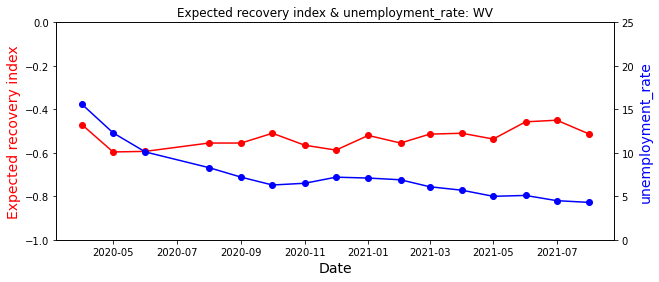

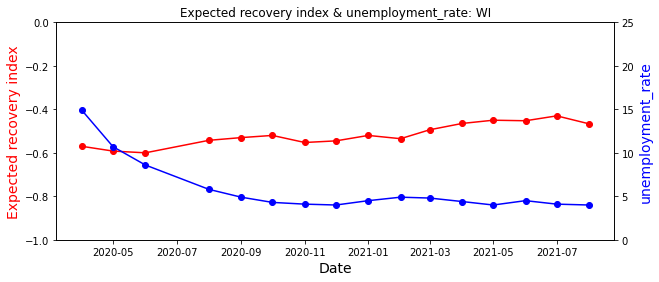

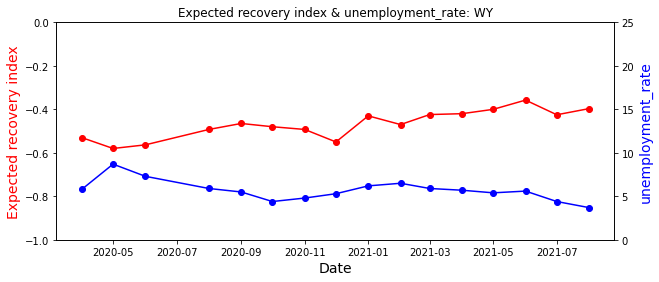

In [84]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'unemployment_rate'
   title = 'Expected recovery index & unemployment_rate: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([0,25])
   plt.title(title +state)
   plt.show()

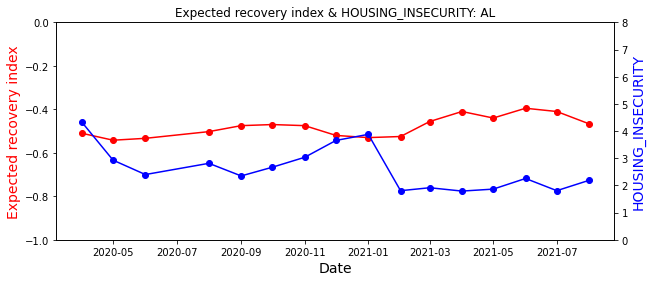

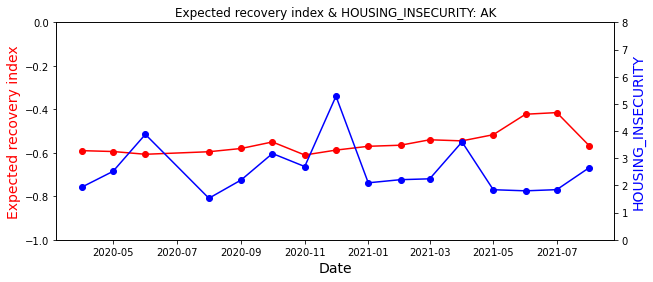

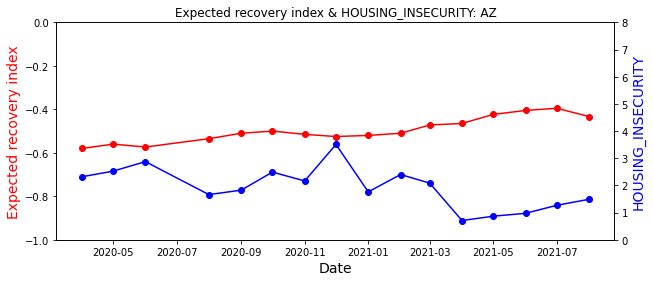

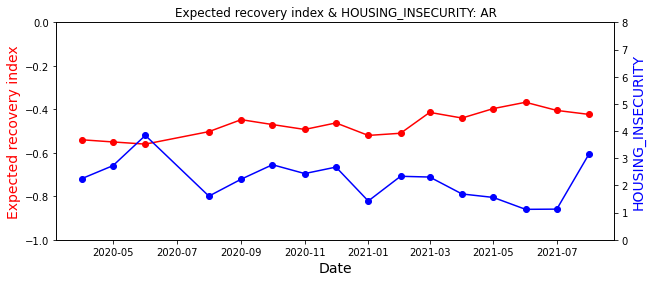

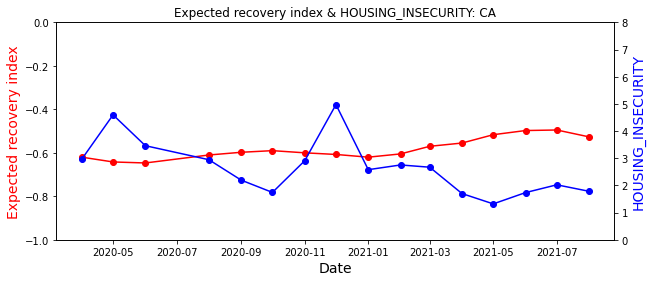

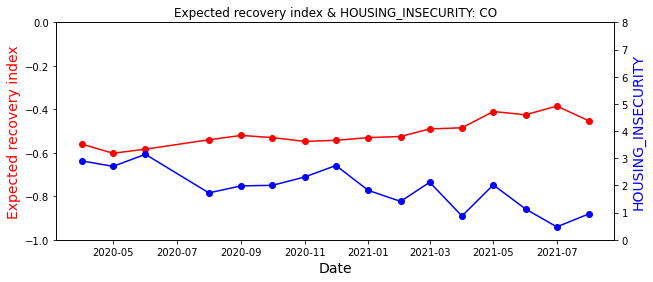

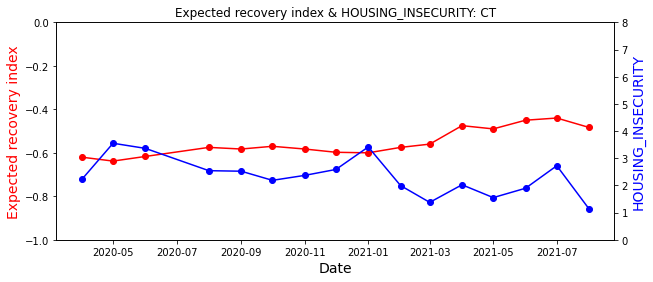

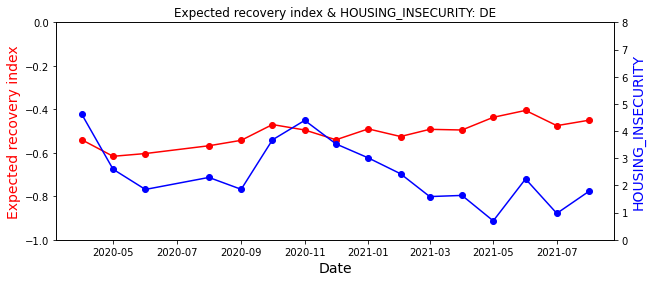

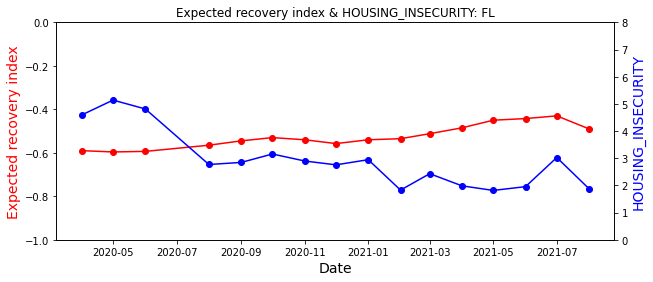

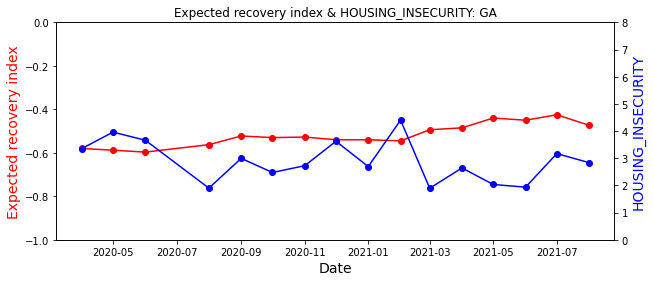

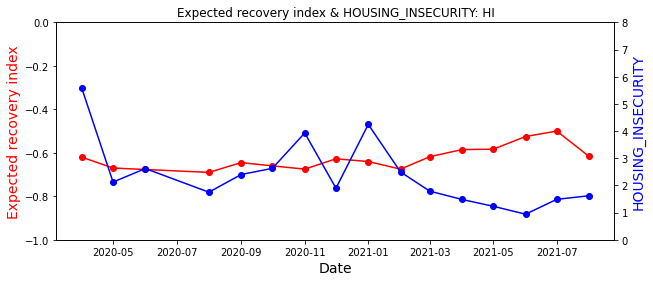

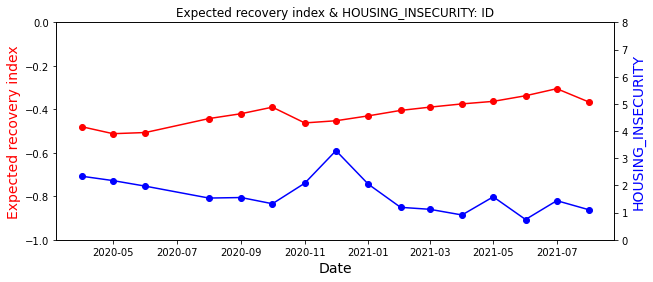

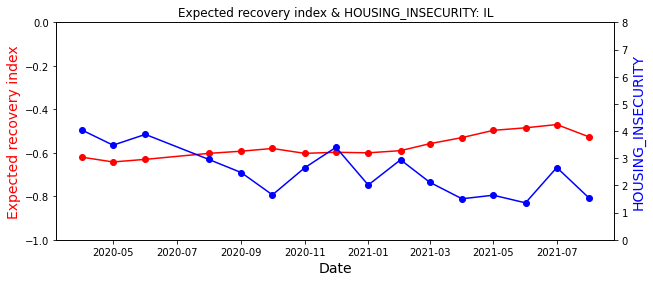

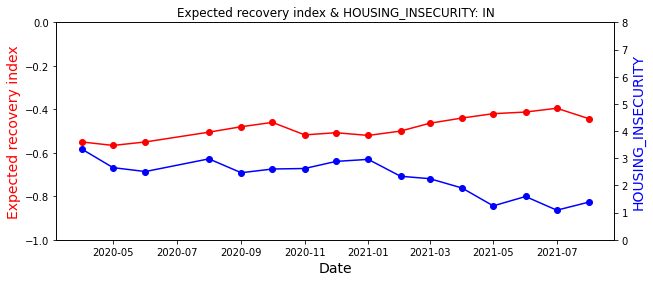

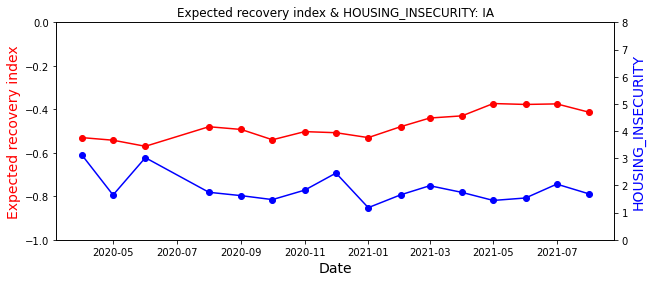

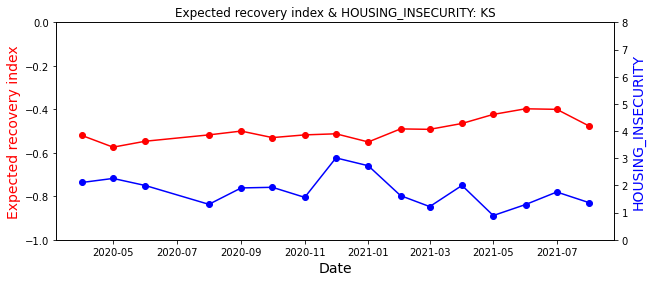

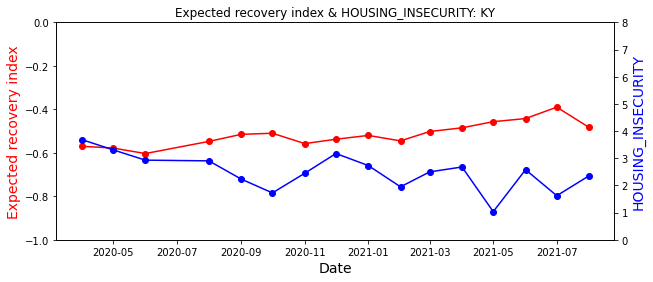

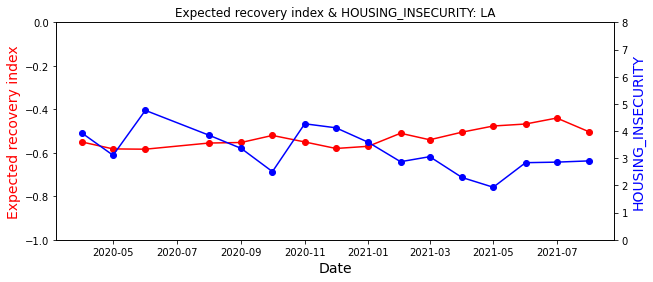

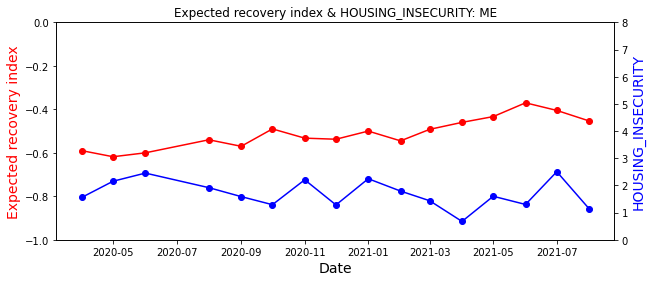

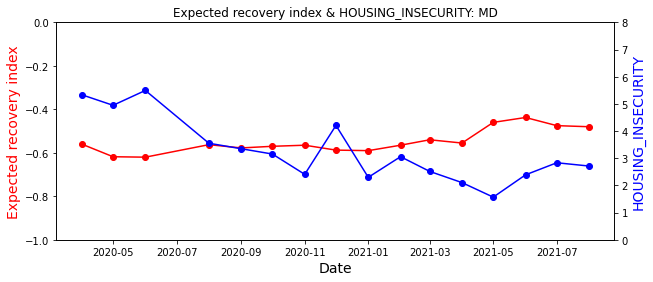

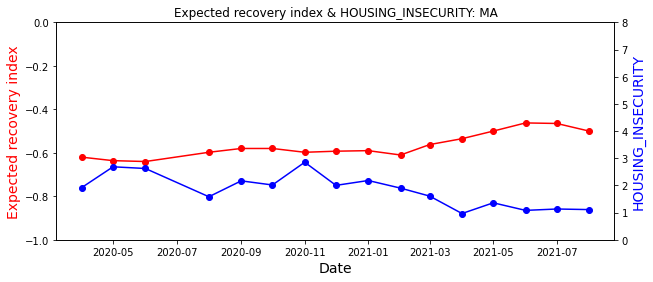

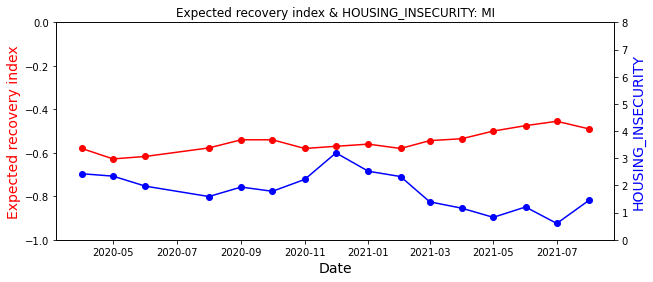

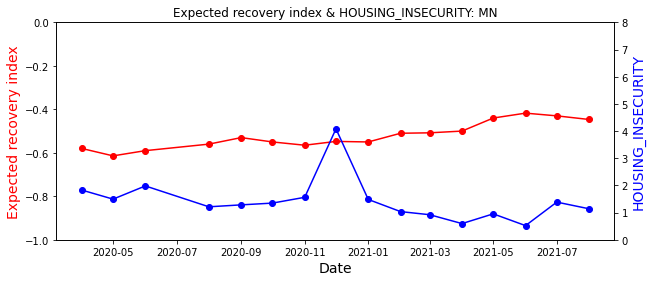

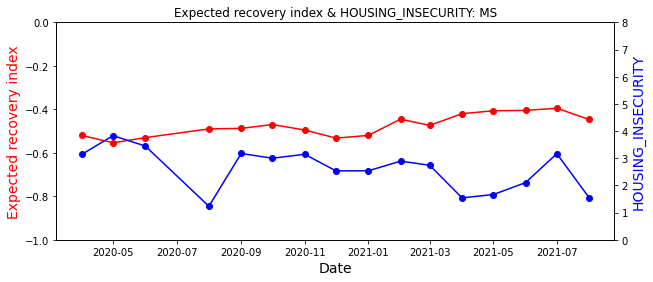

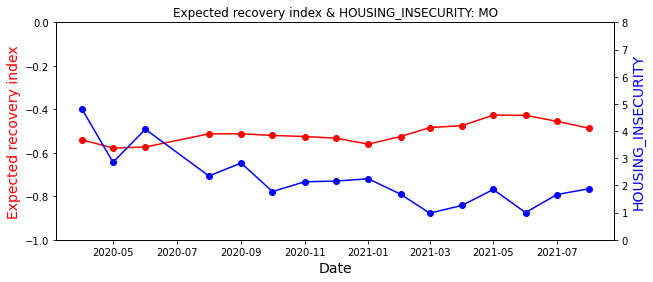

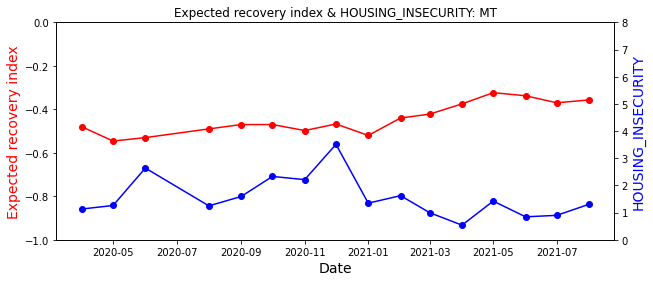

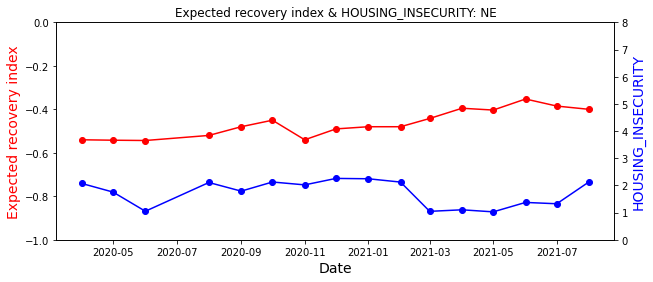

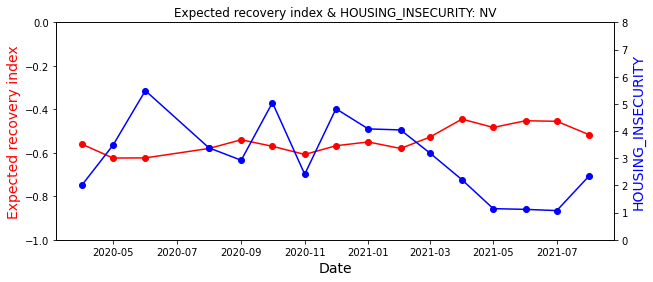

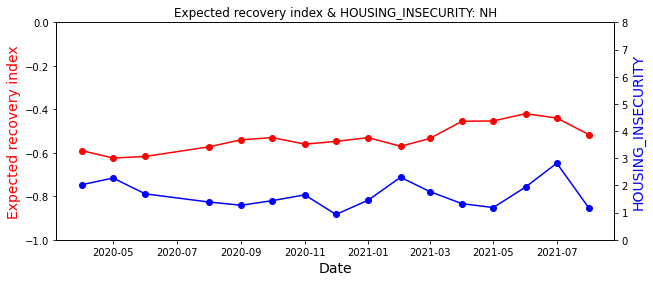

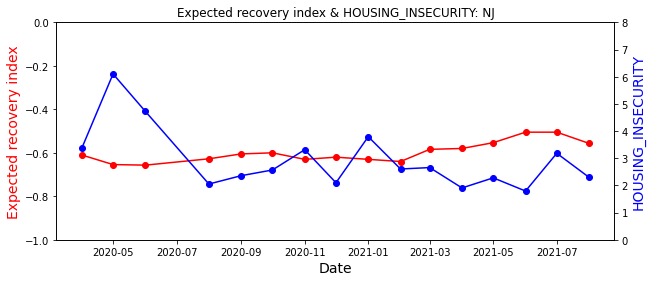

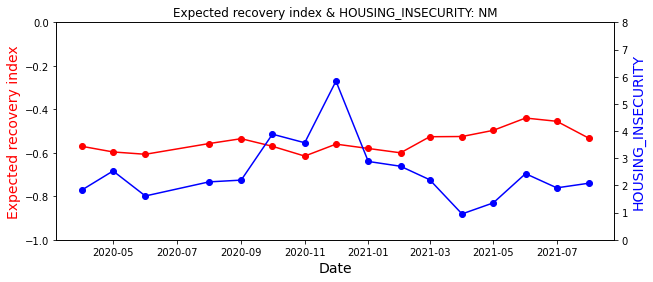

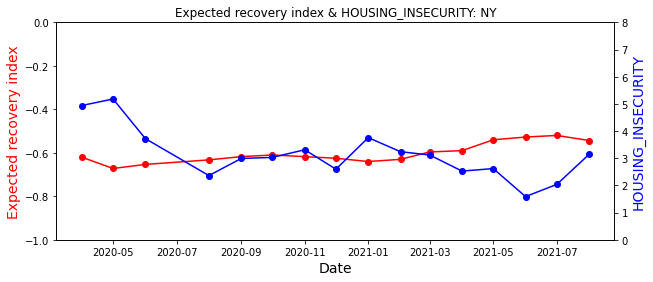

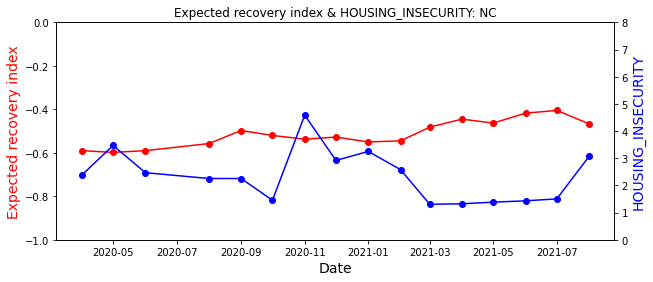

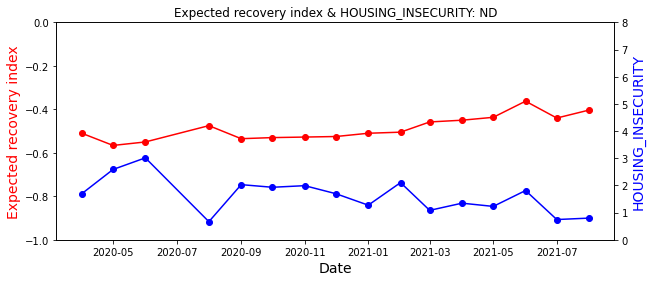

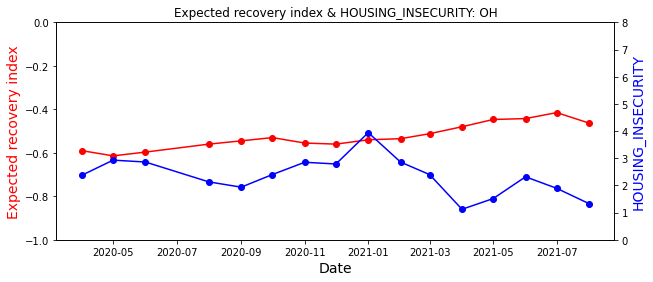

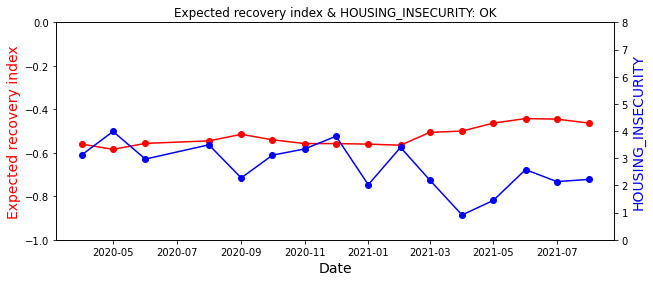

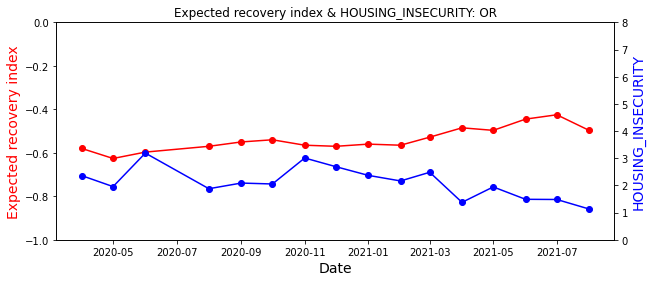

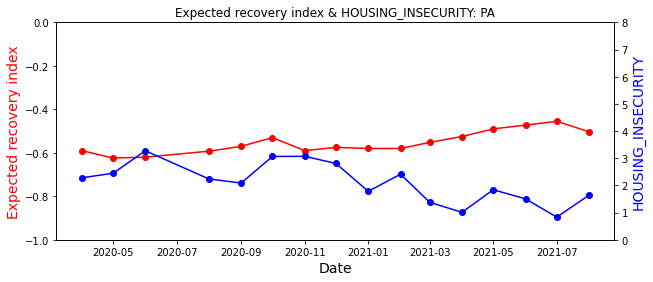

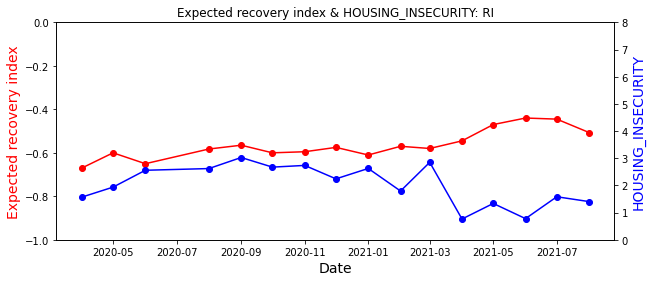

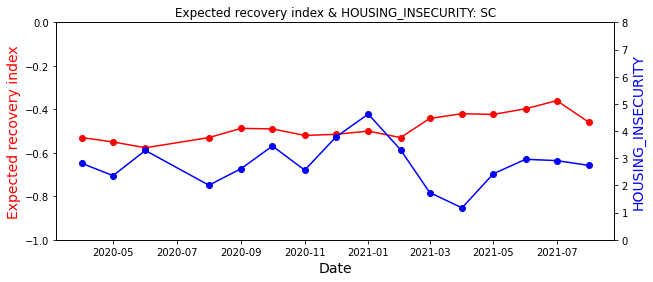

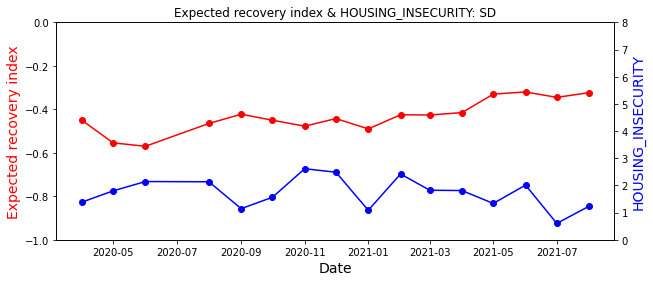

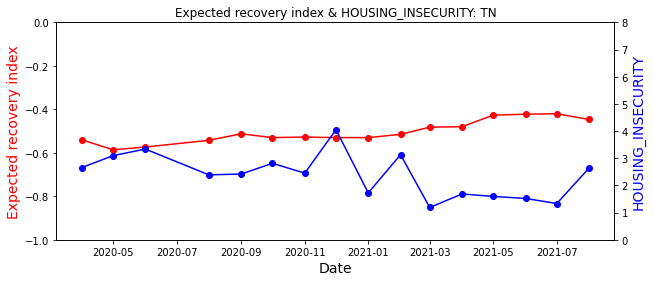

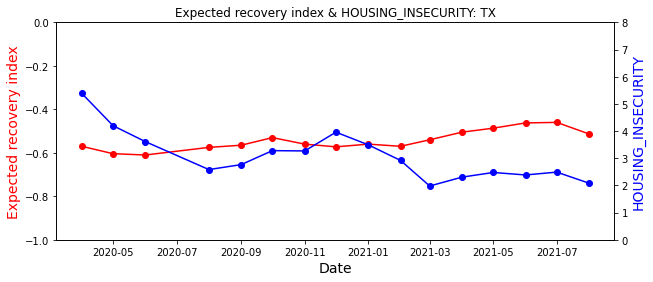

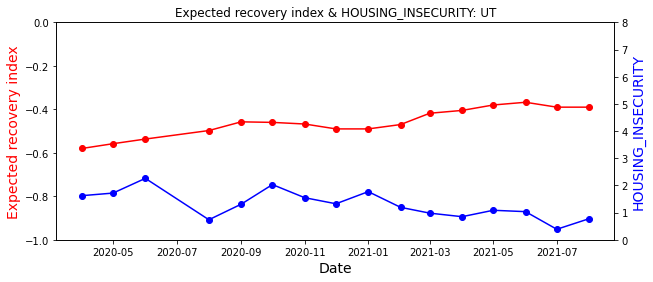

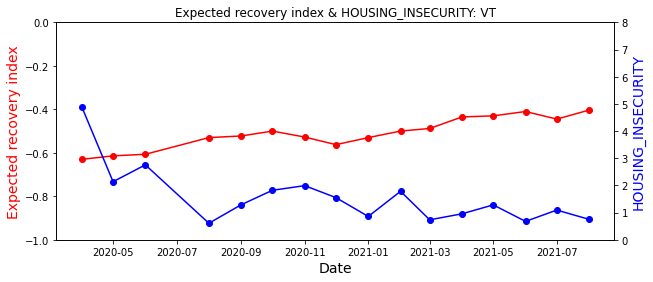

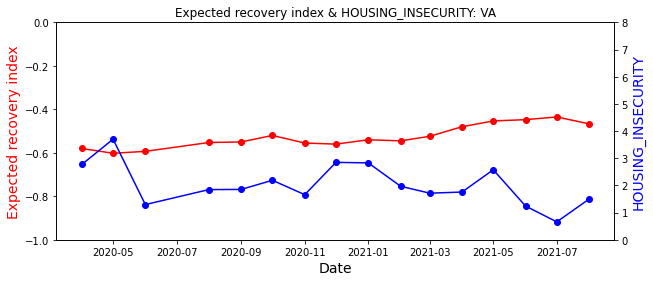

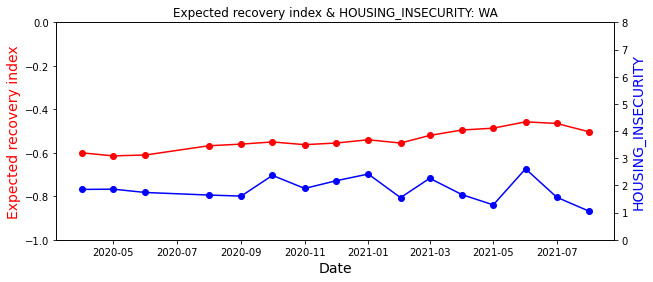

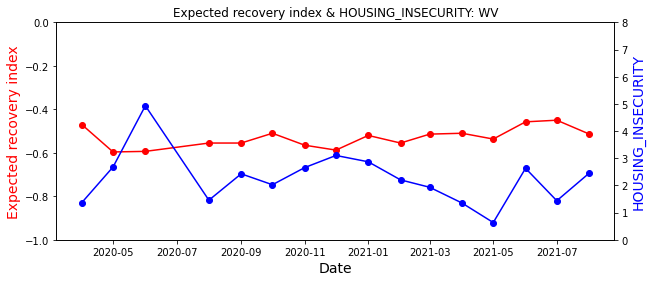

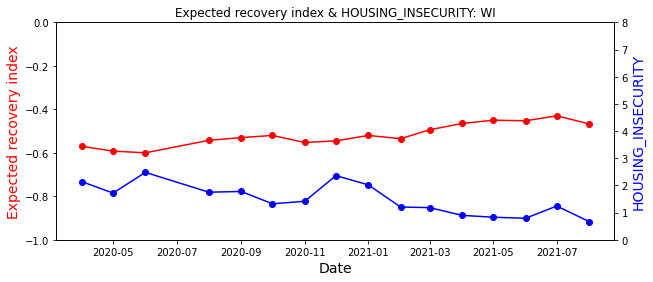

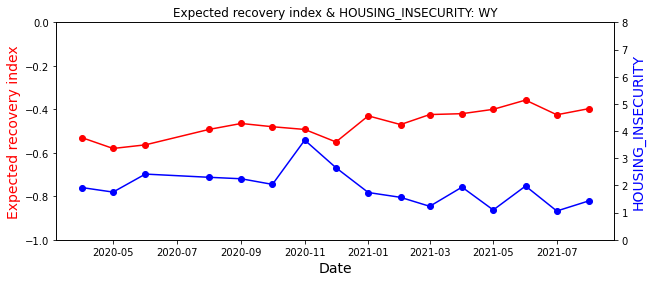

In [109]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'HOUSING_INSECURITY'
   title = 'Expected recovery index & HOUSING_INSECURITY: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([0,8])
   plt.title(title +state)
   plt.show()

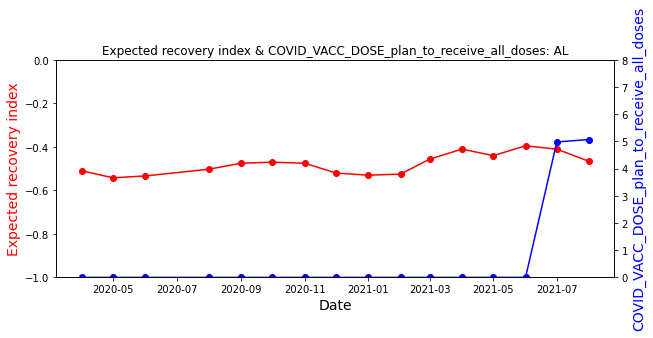

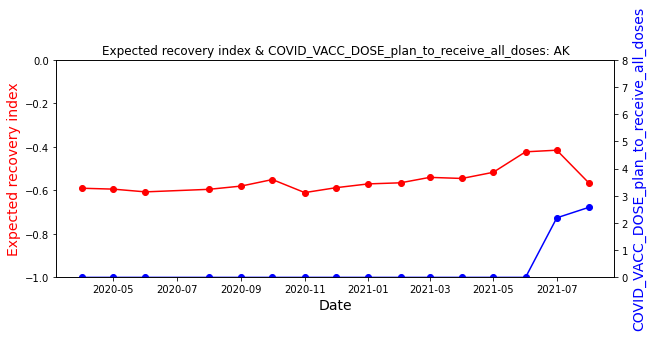

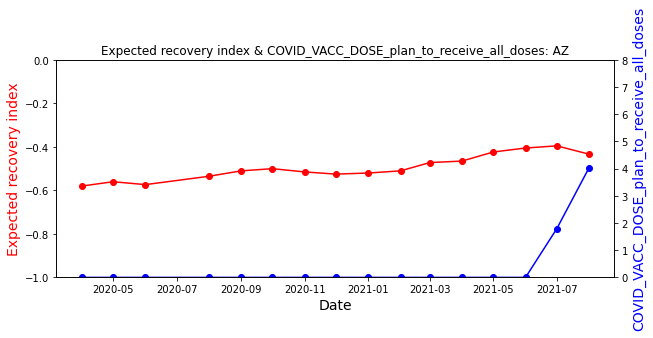

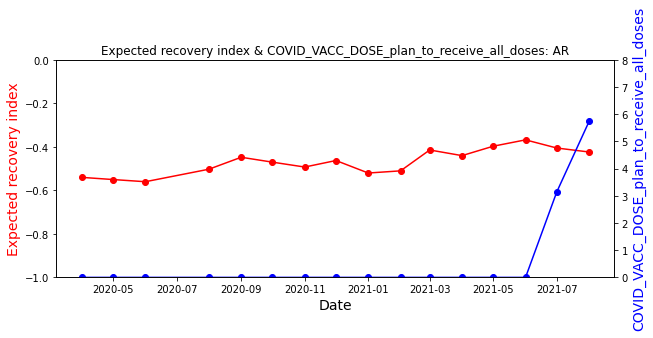

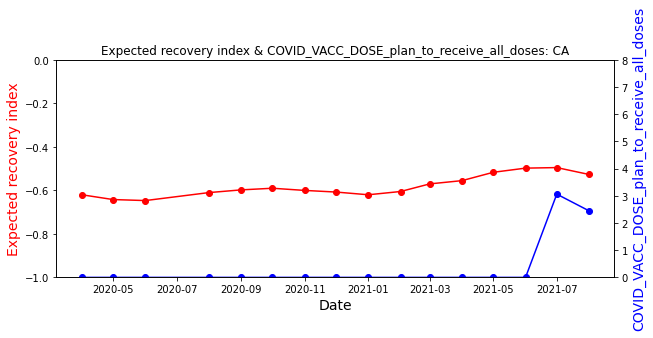

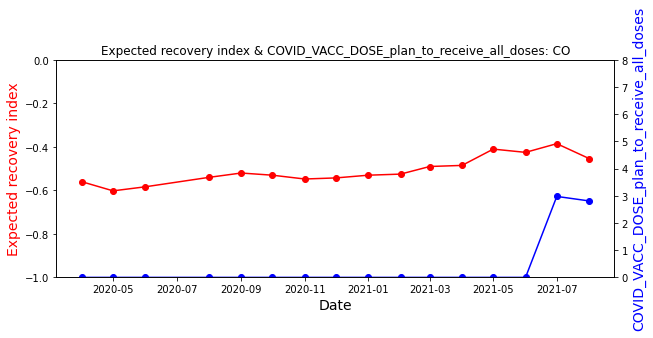

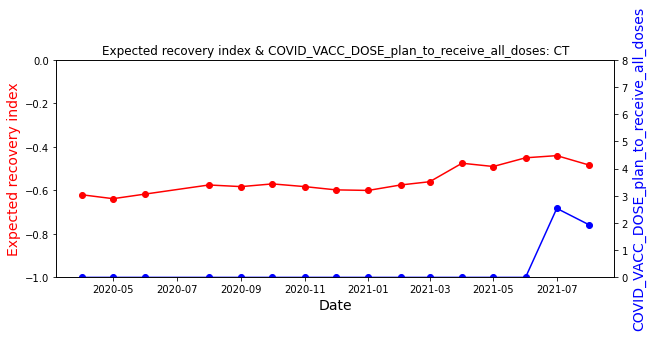

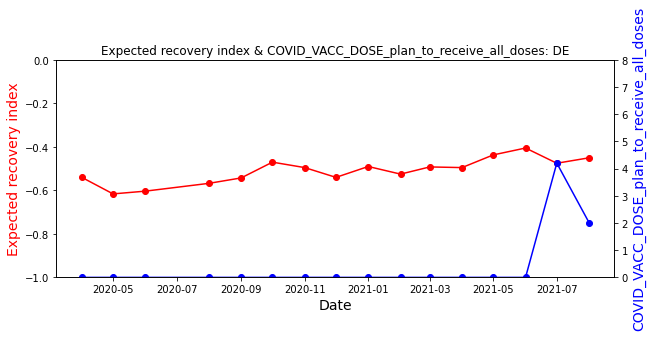

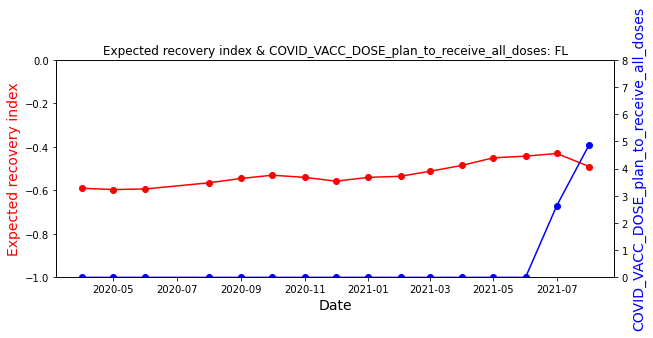

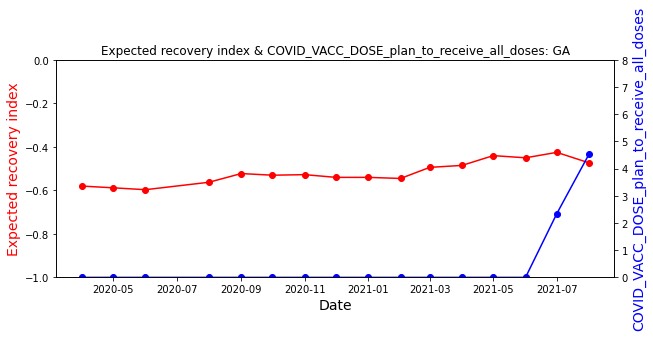

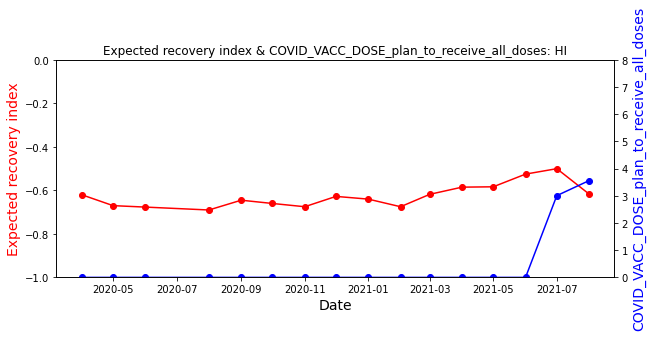

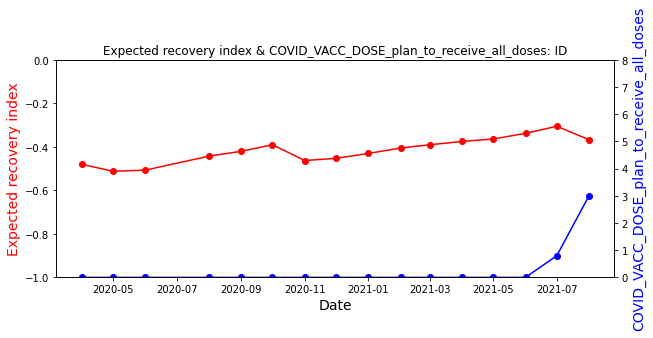

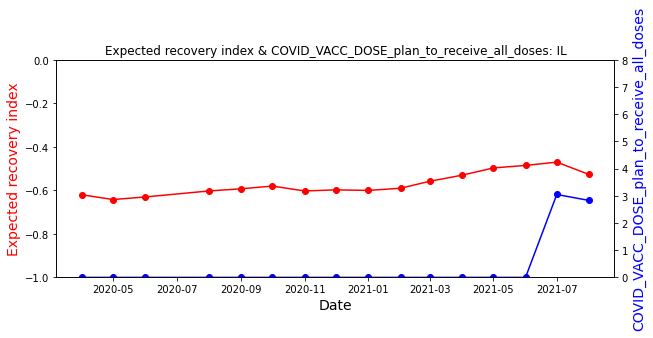

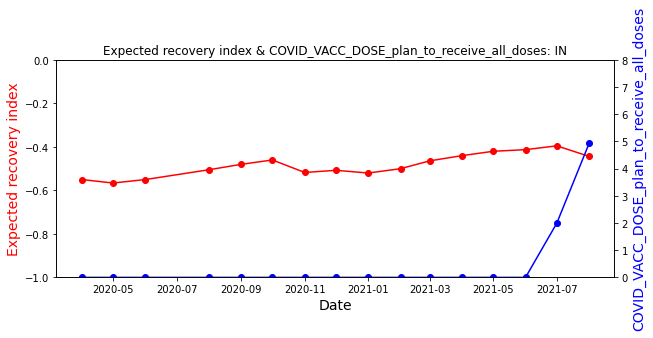

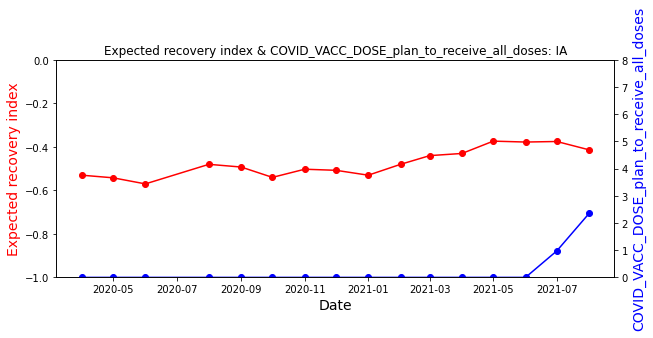

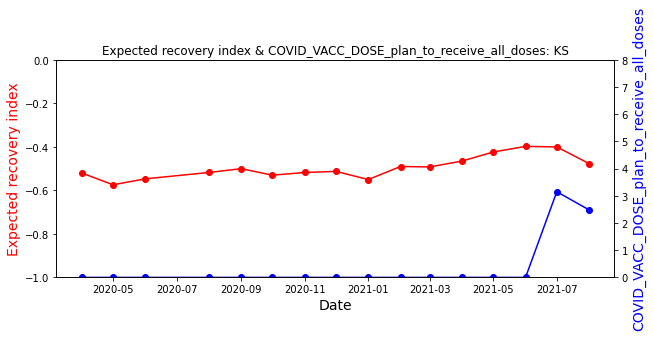

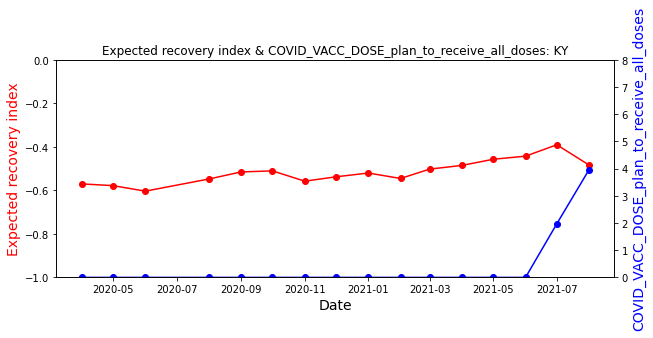

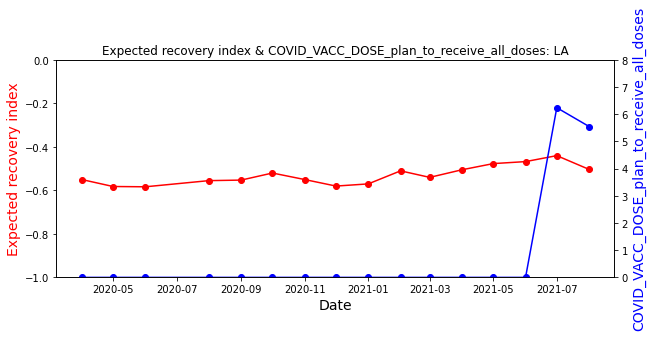

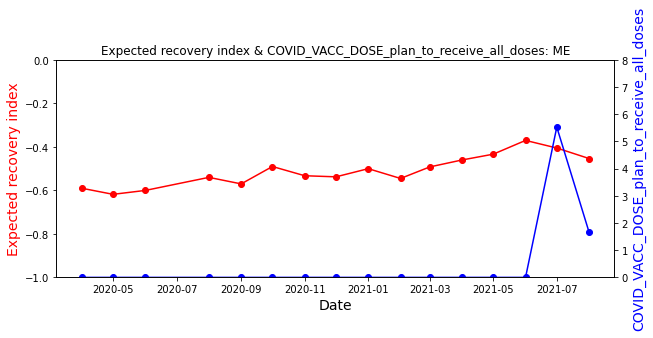

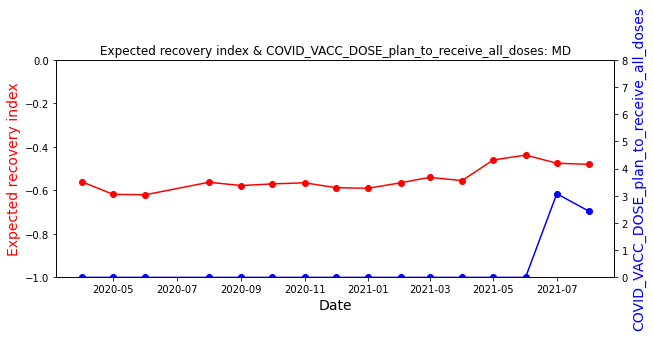

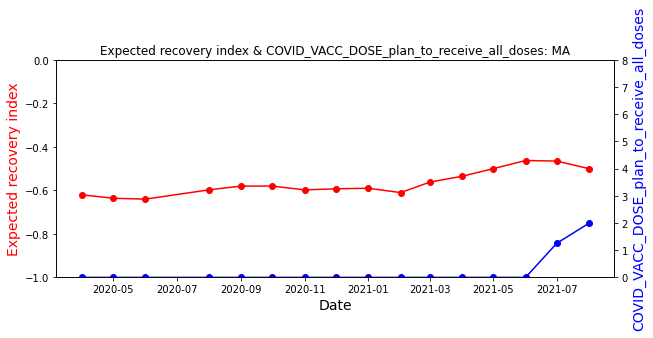

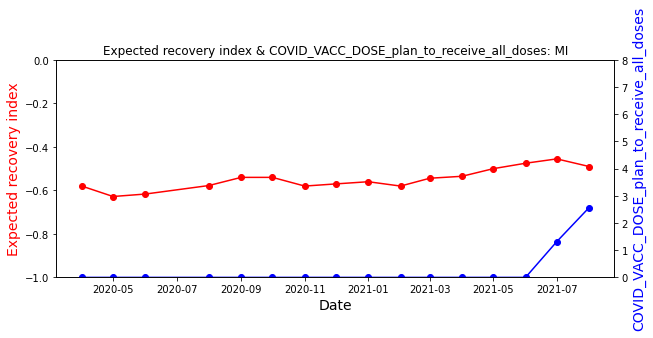

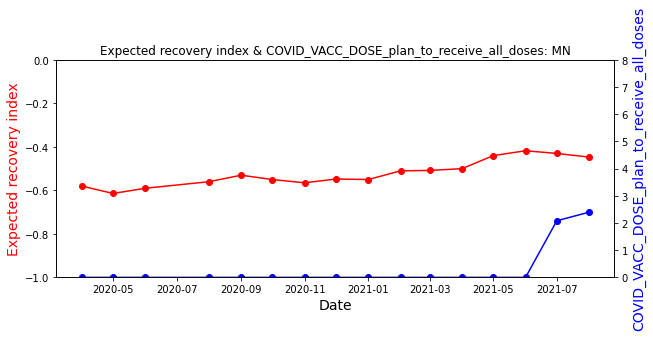

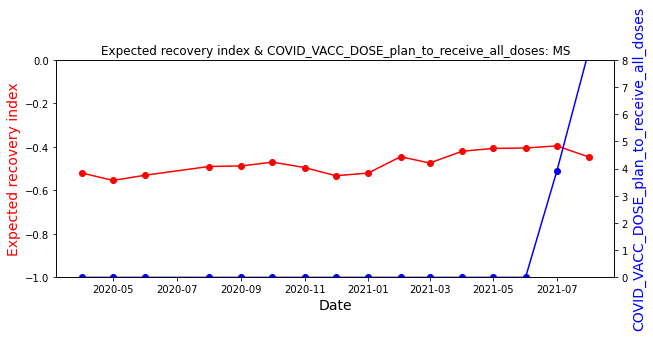

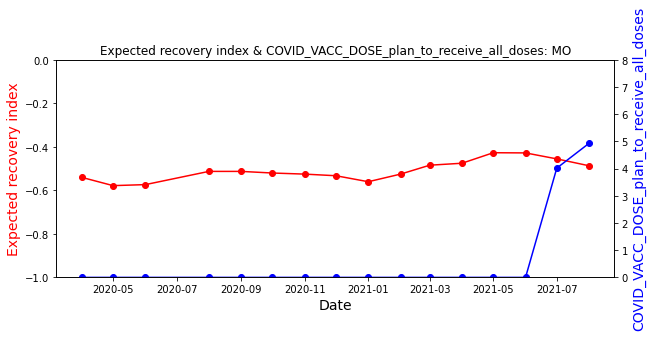

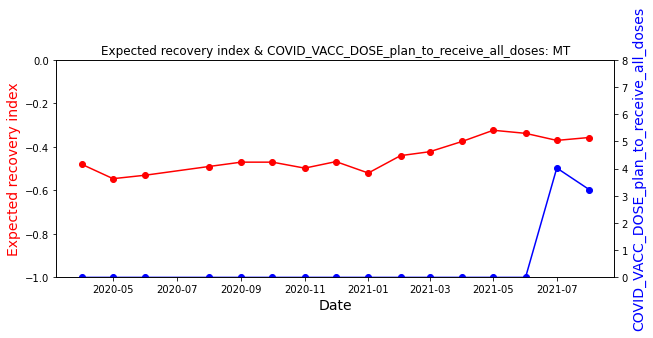

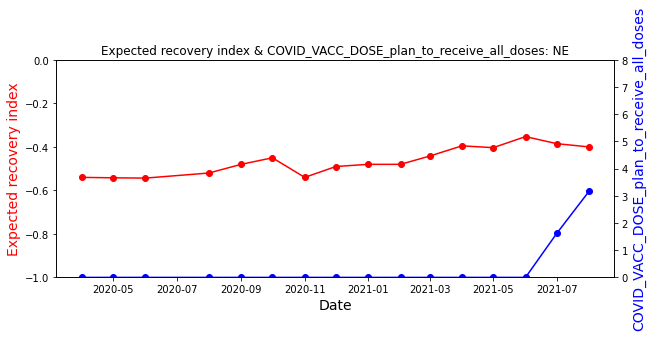

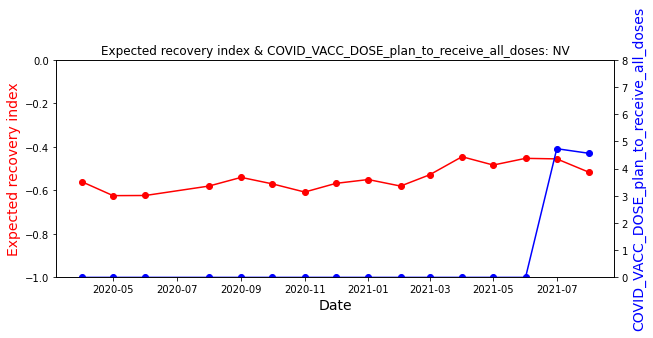

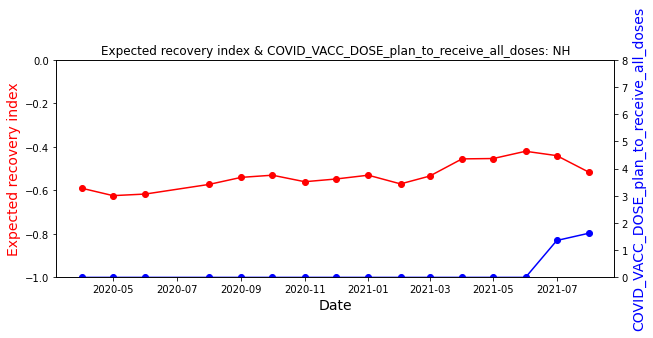

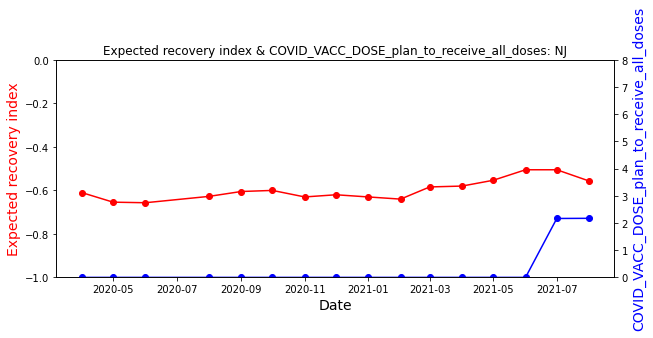

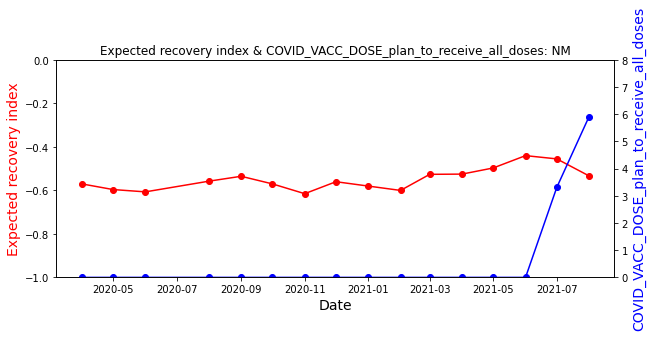

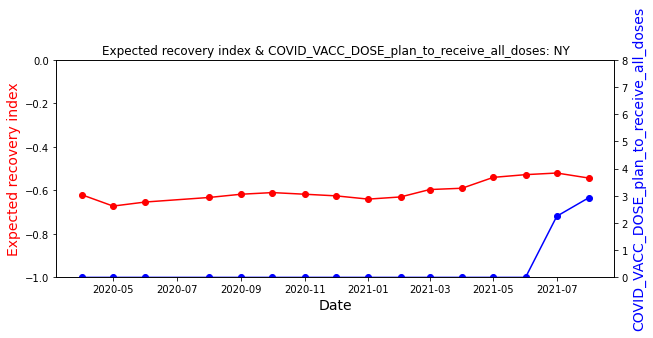

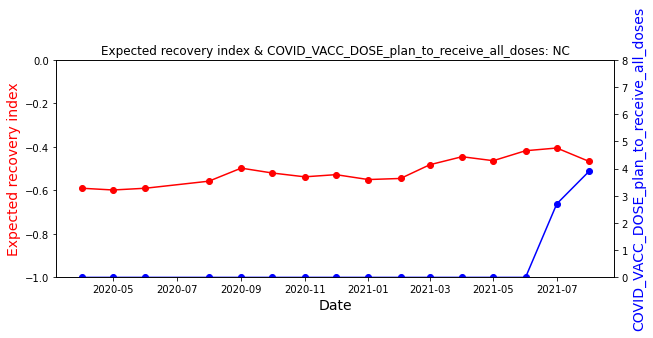

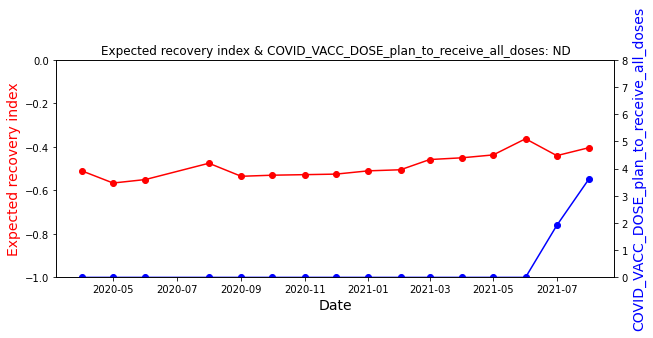

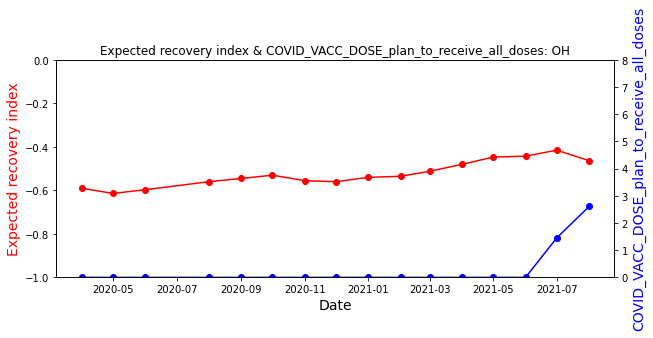

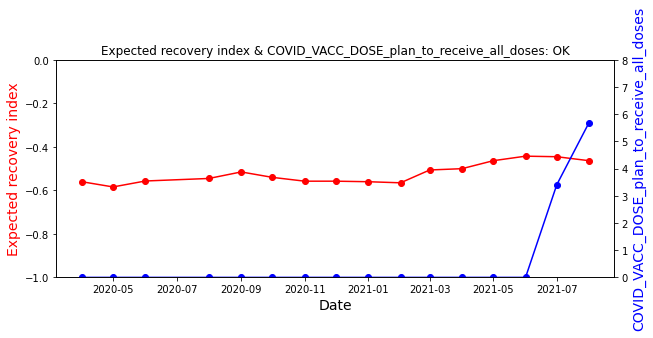

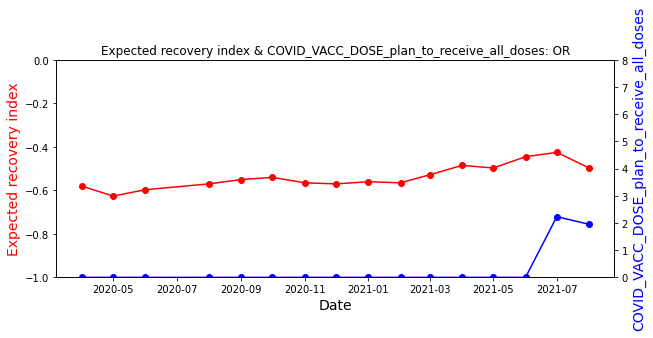

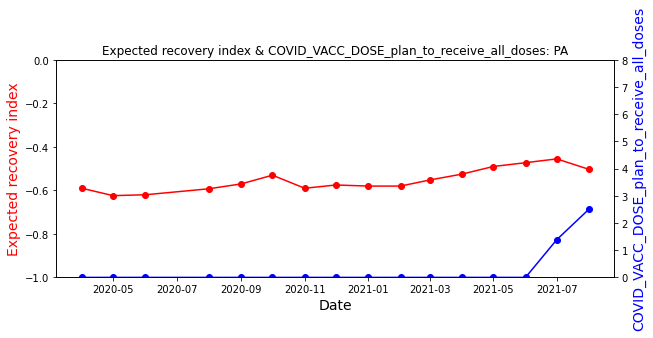

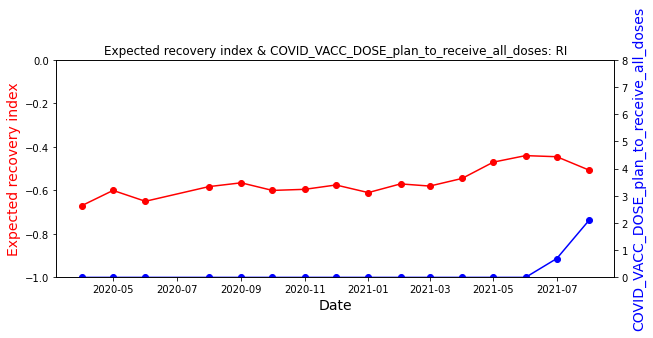

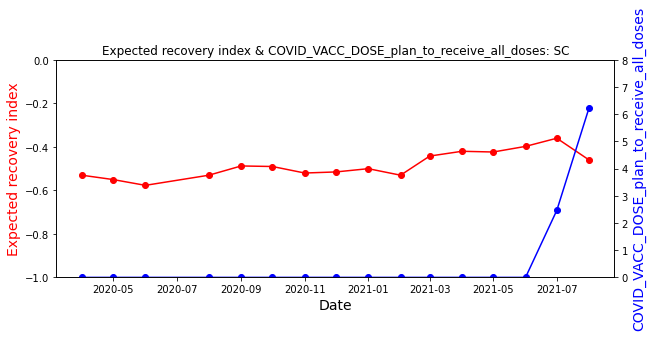

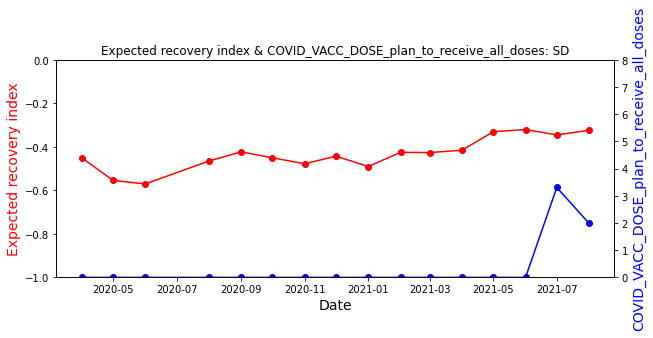

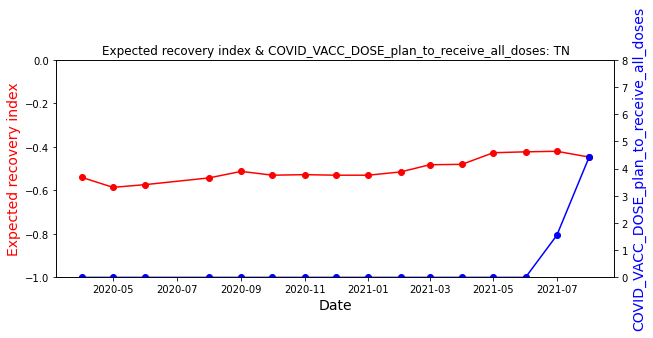

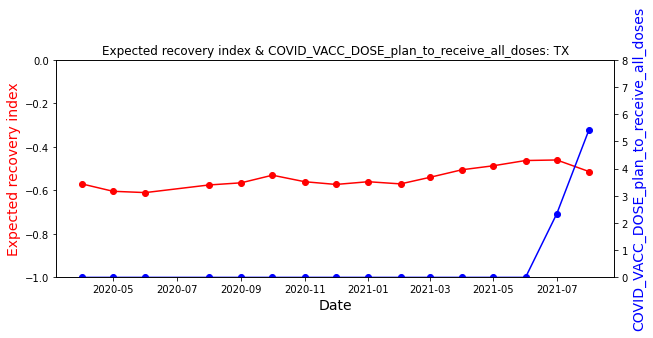

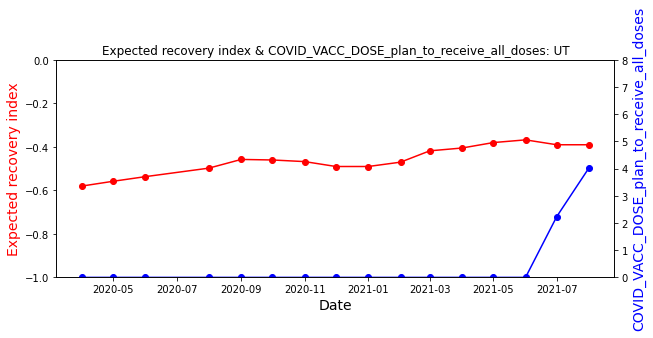

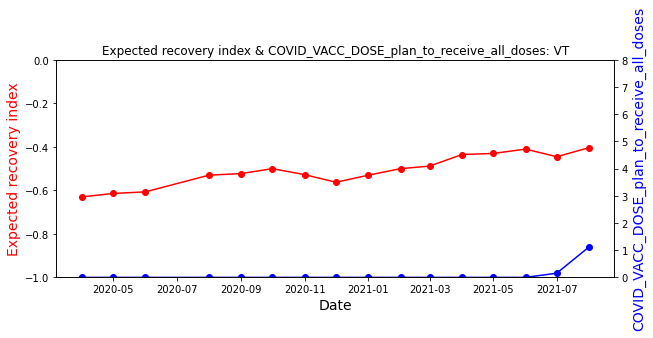

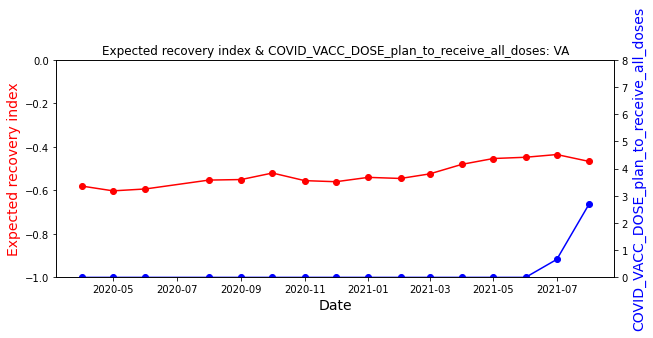

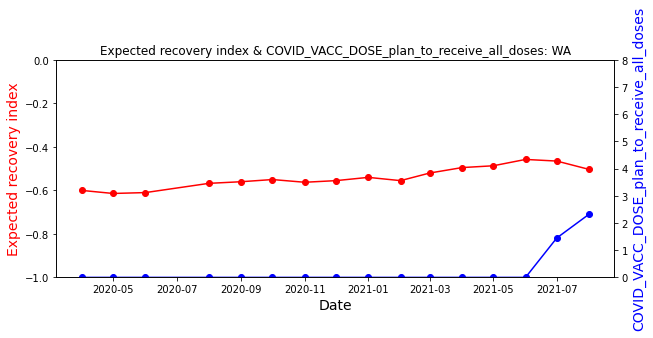

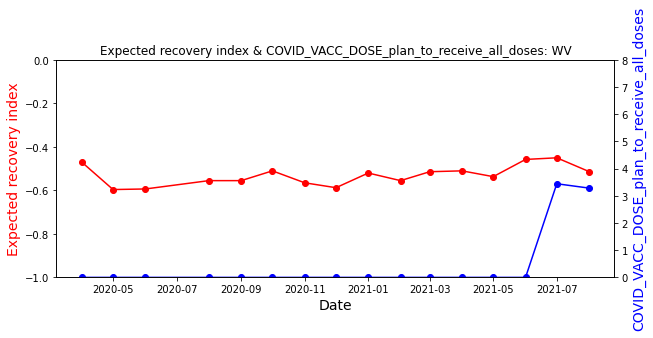

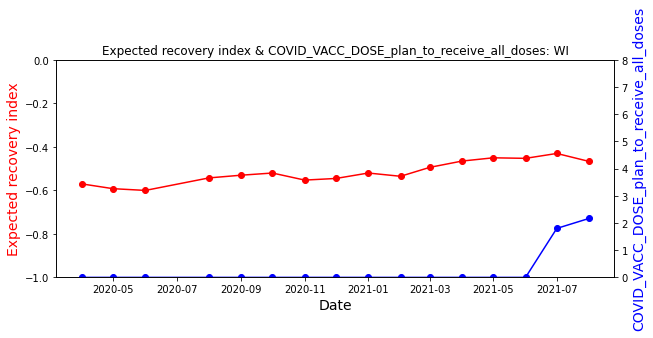

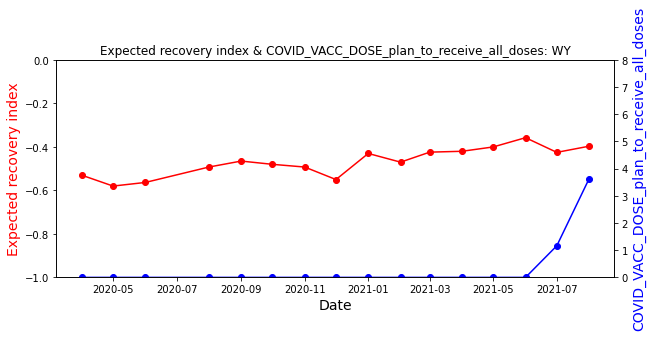

In [19]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'COVID_VACC_DOSE_plan_to_receive_all_doses'
   title = 'Expected recovery index & COVID_VACC_DOSE_plan_to_receive_all_doses: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([0,8])
   plt.title(title +state)
   plt.show()

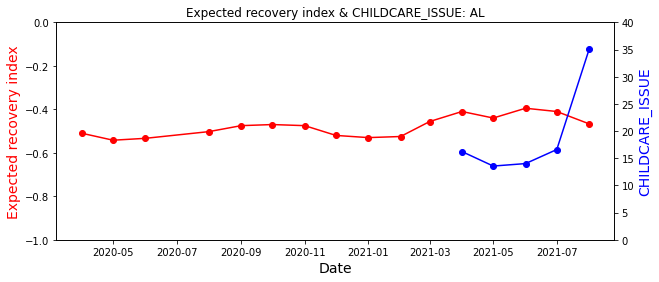

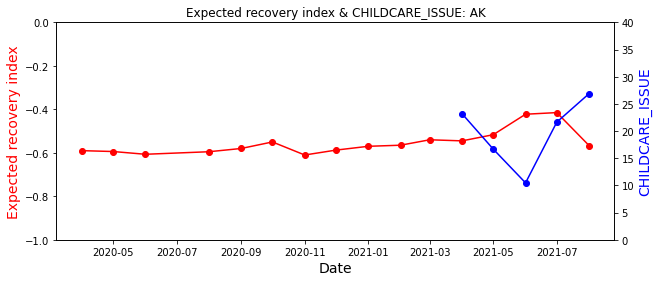

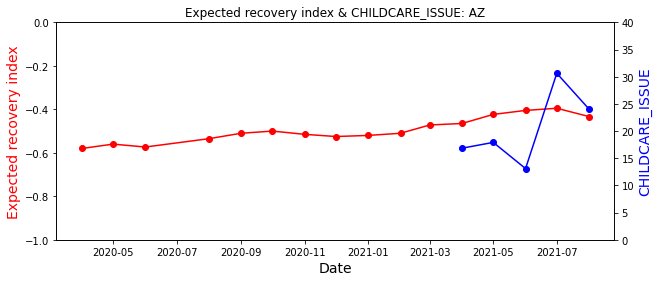

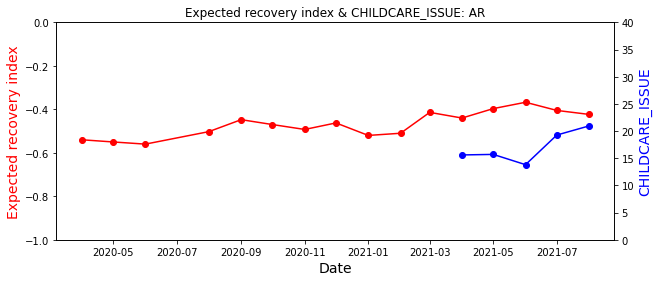

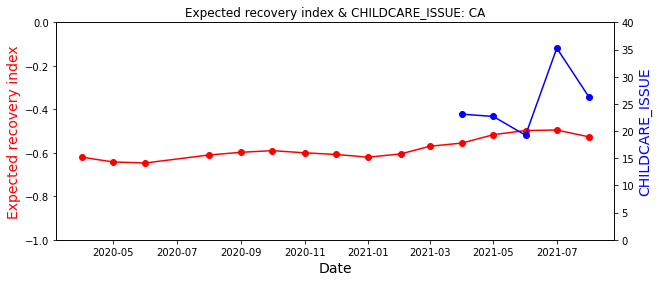

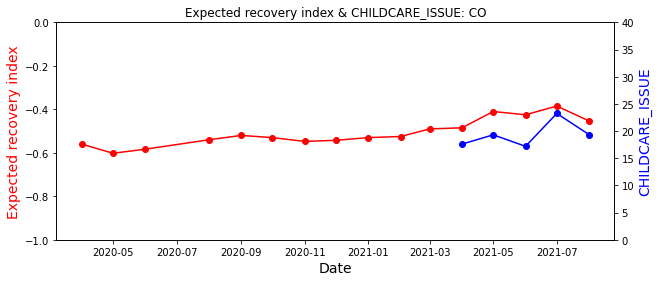

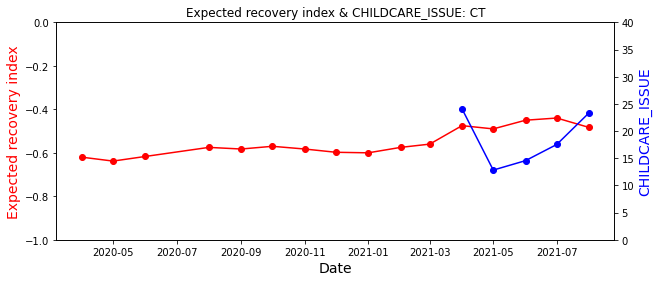

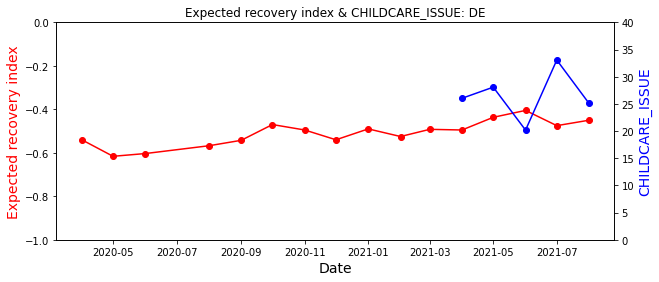

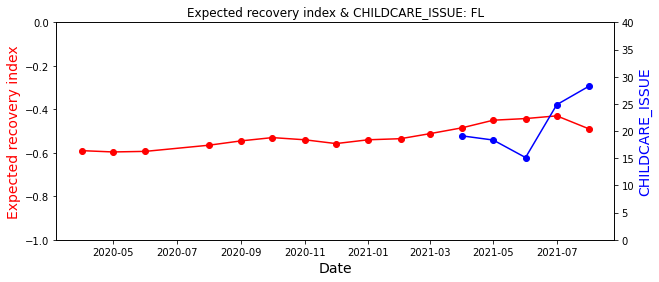

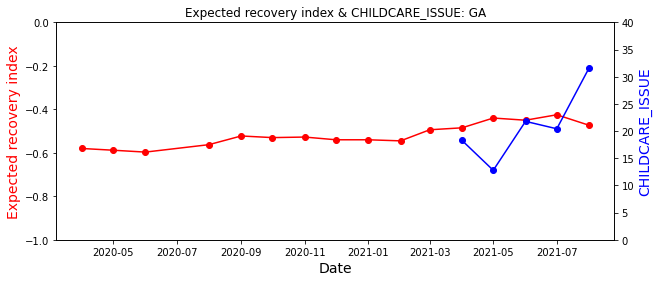

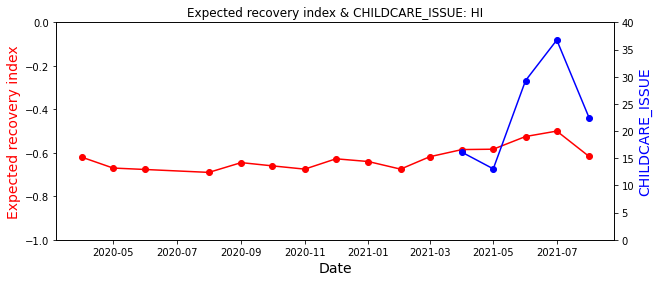

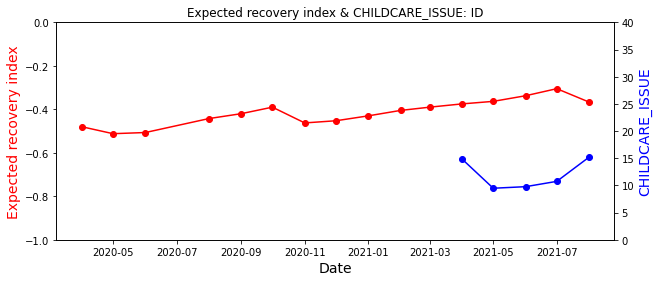

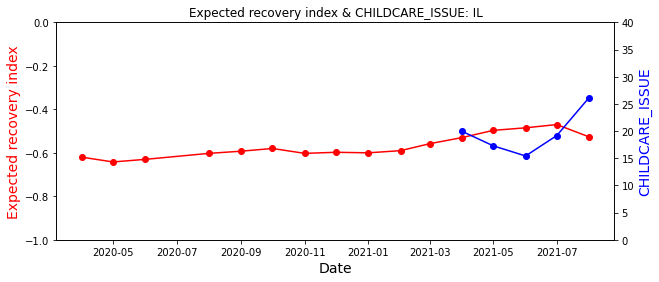

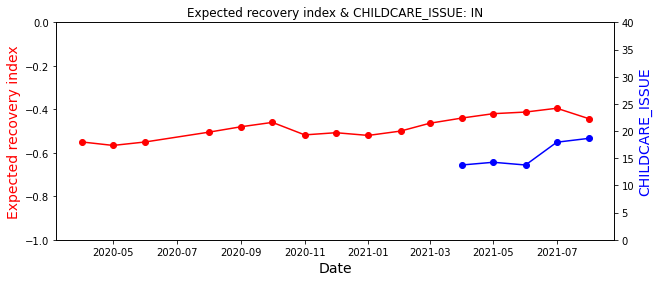

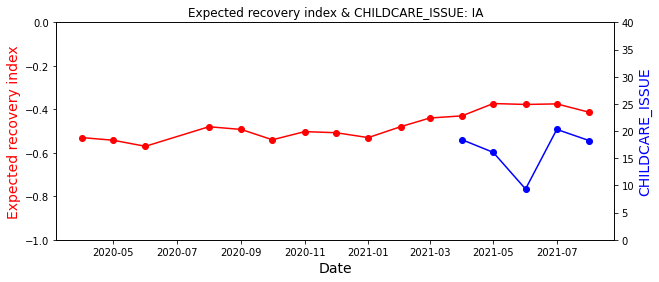

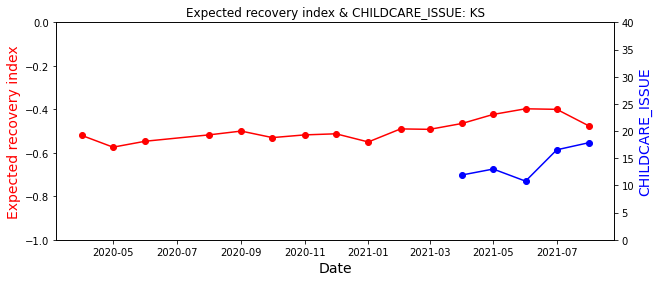

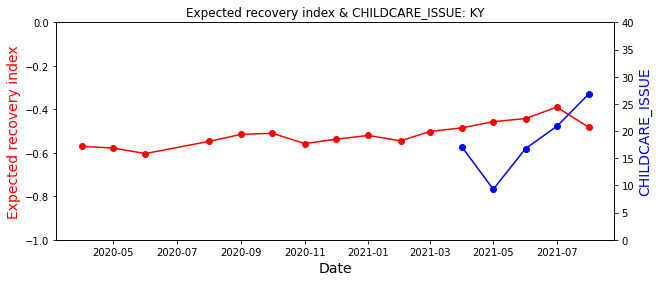

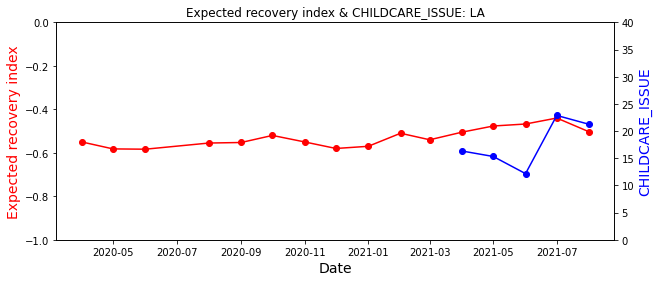

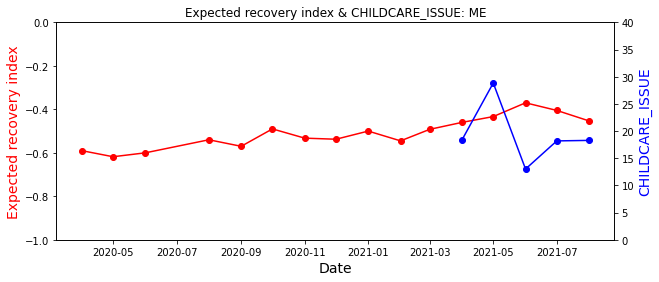

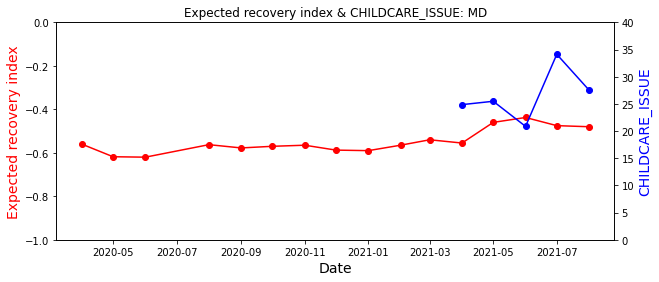

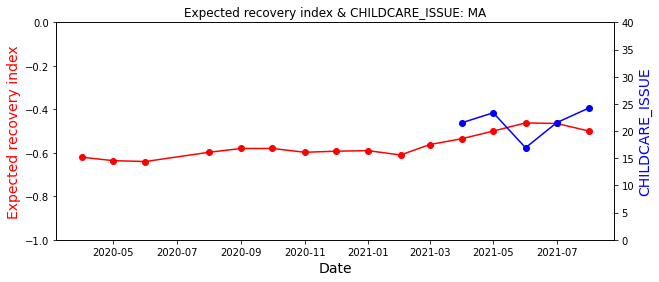

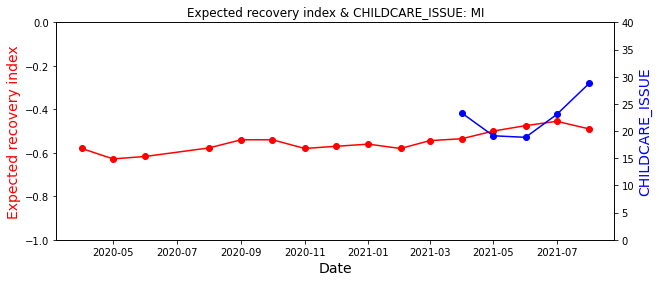

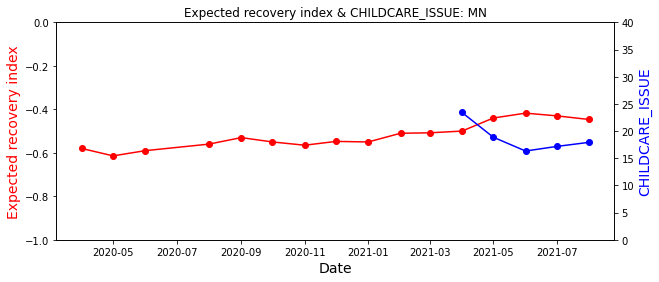

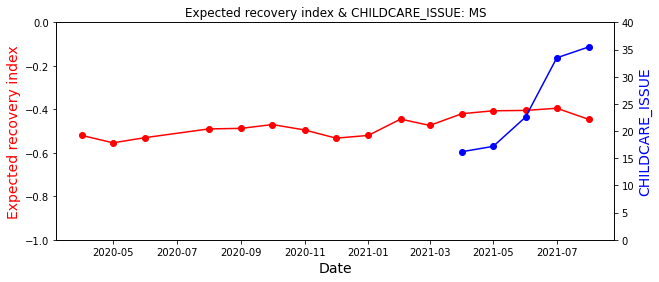

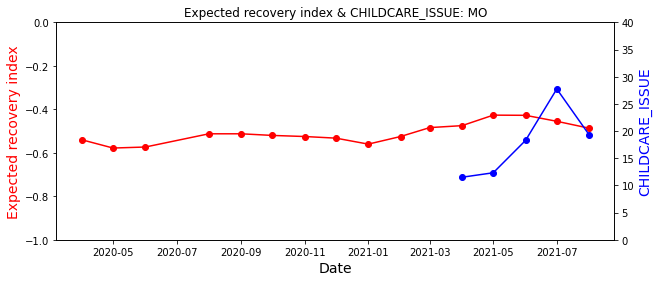

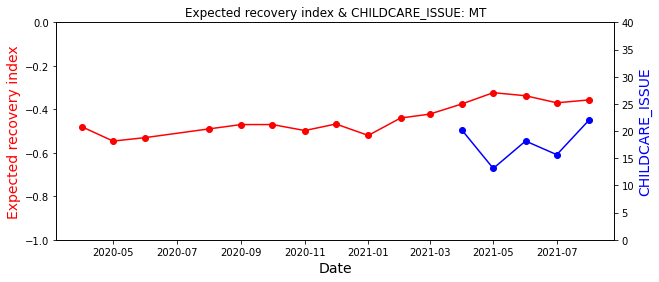

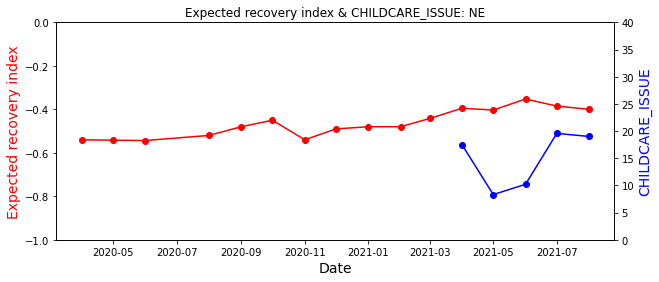

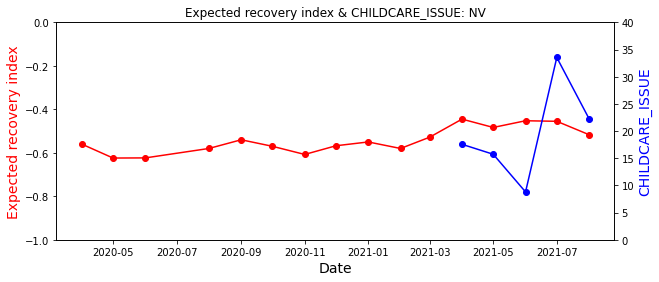

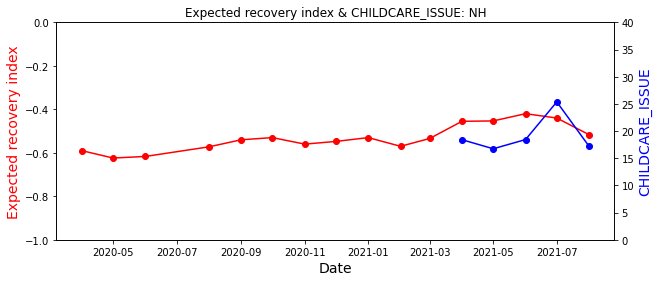

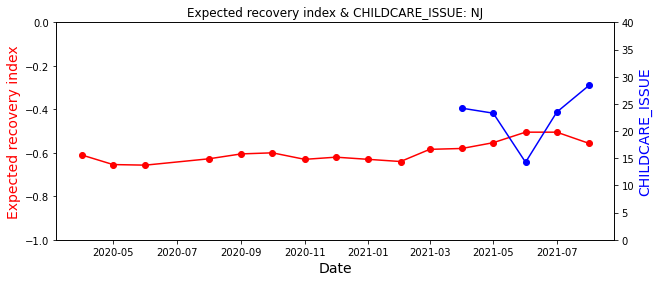

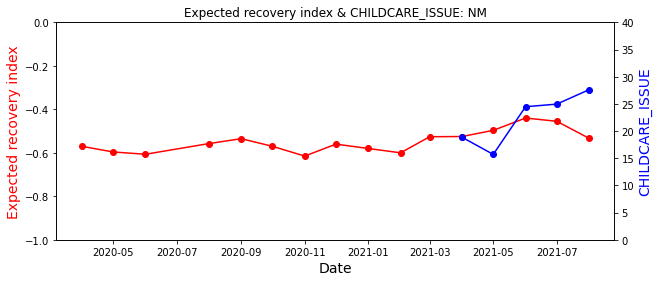

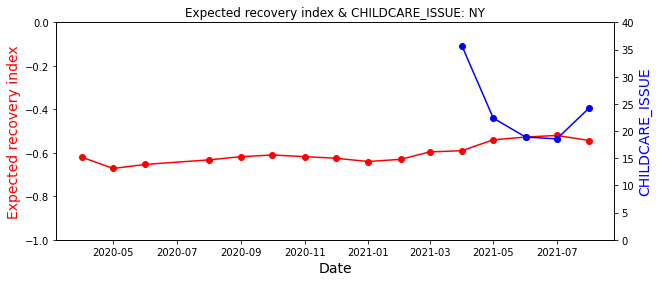

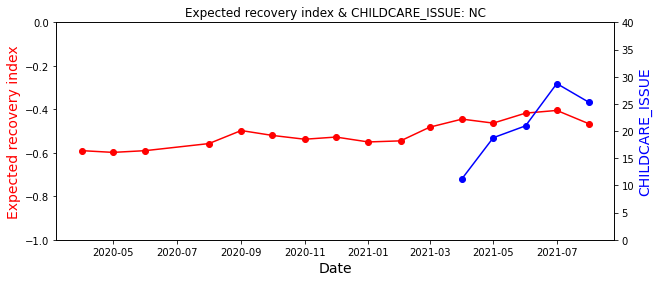

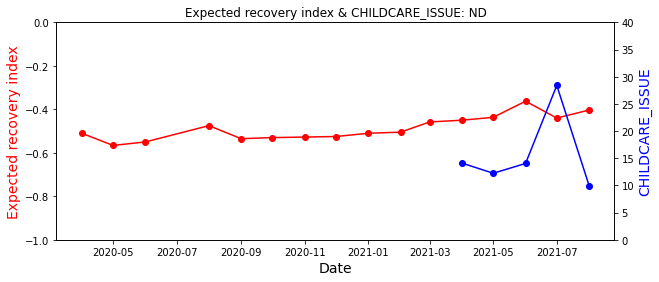

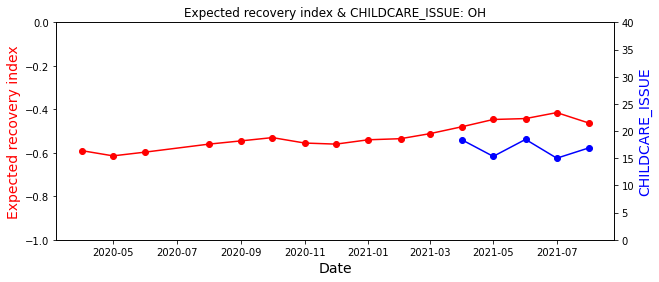

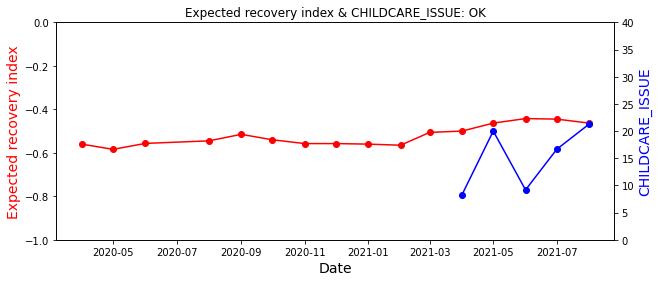

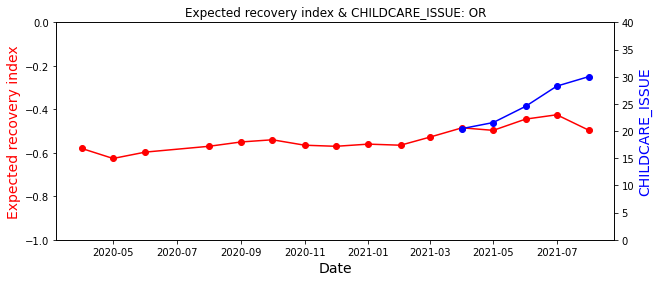

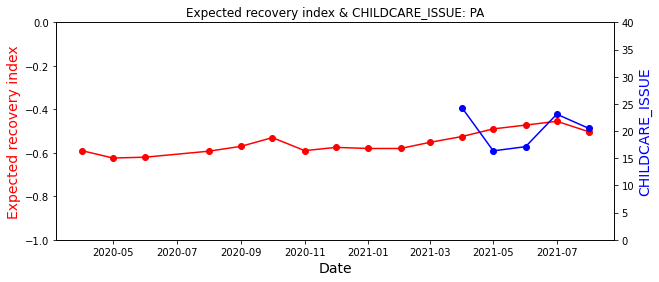

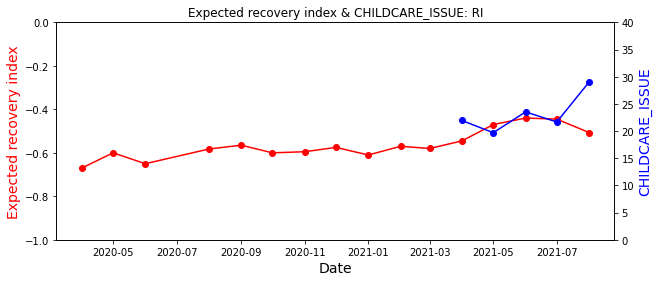

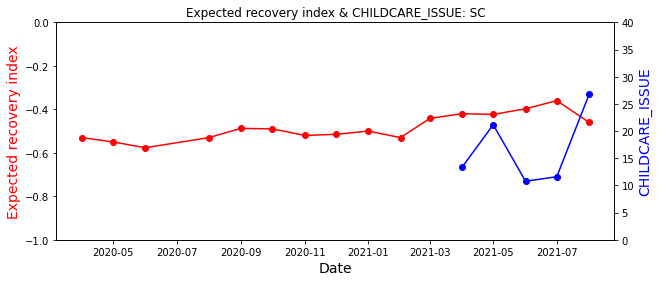

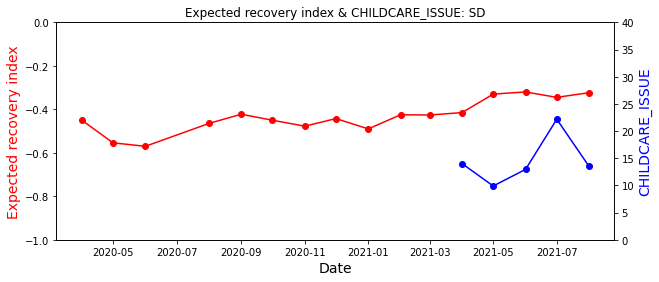

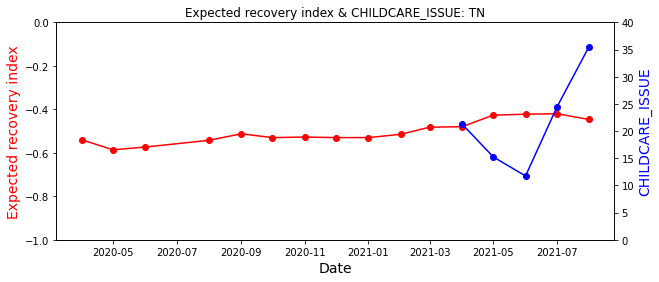

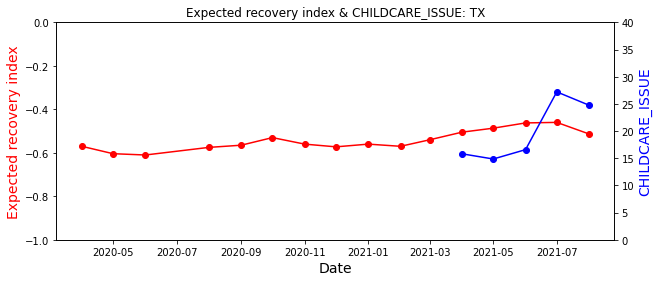

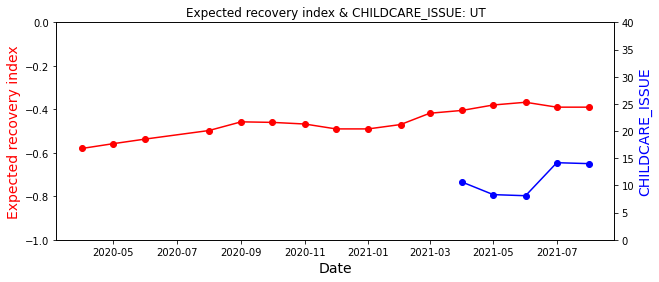

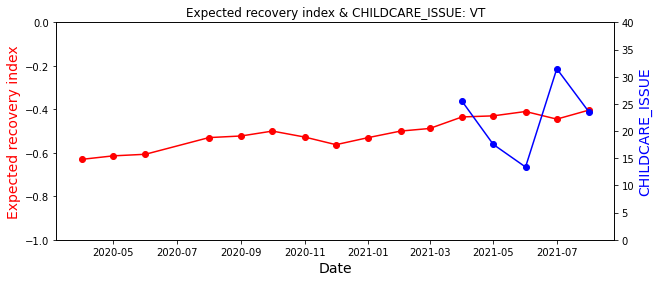

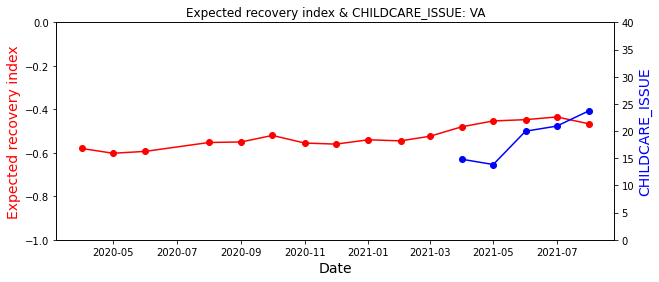

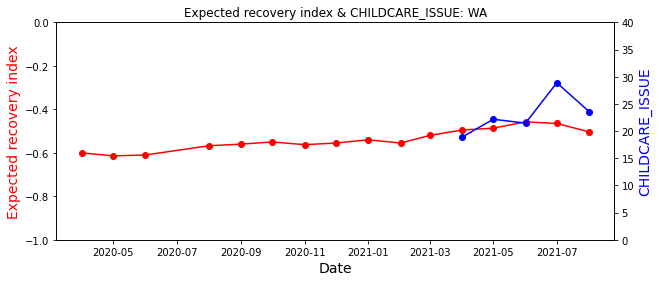

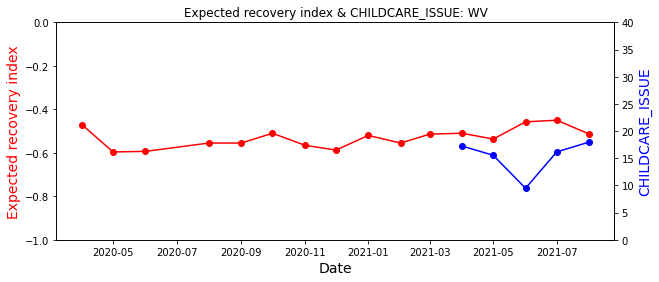

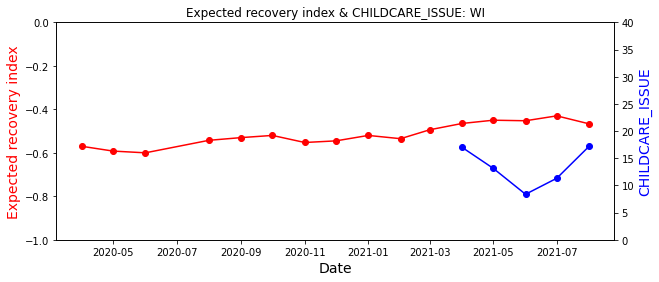

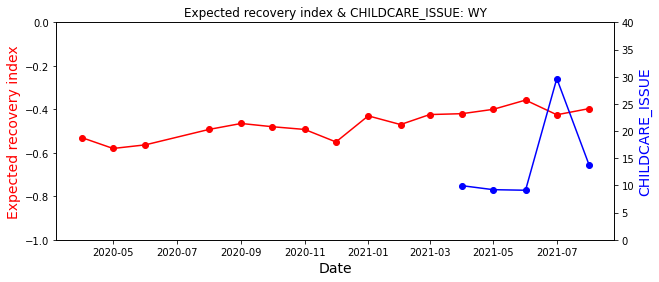

In [30]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'CHILDCARE_ISSUE'
   title = 'Expected recovery index & CHILDCARE_ISSUE: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([0,40])
   plt.title(title +state)
   plt.show()

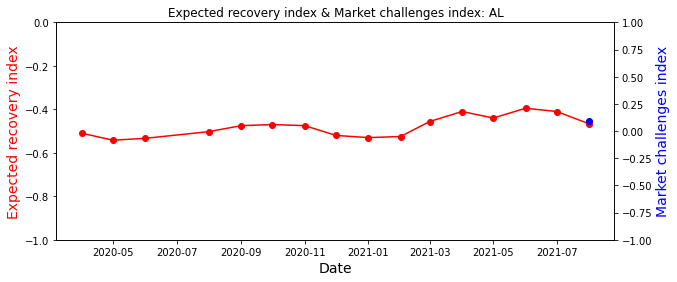

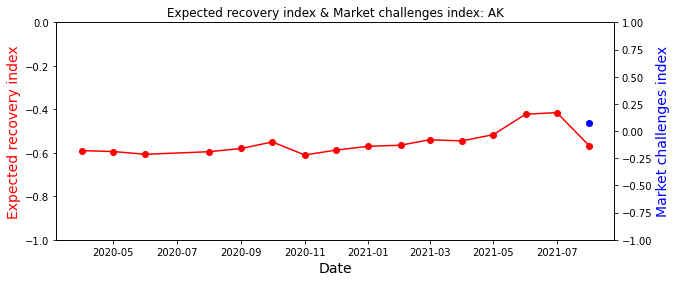

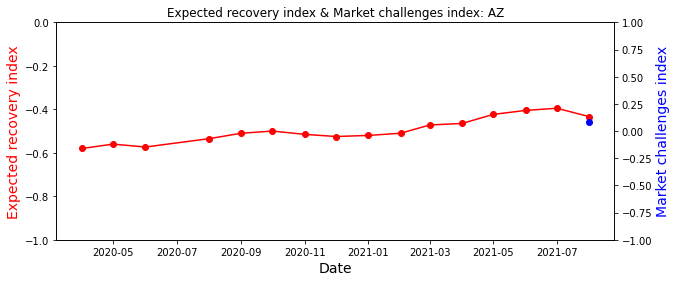

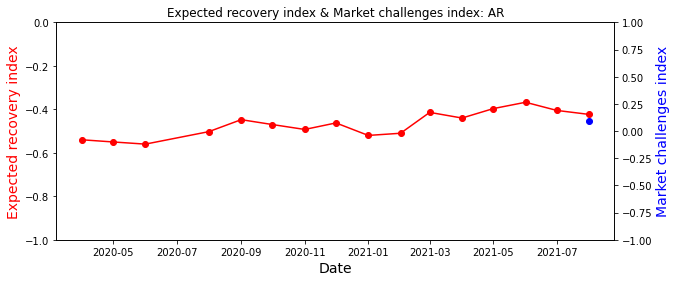

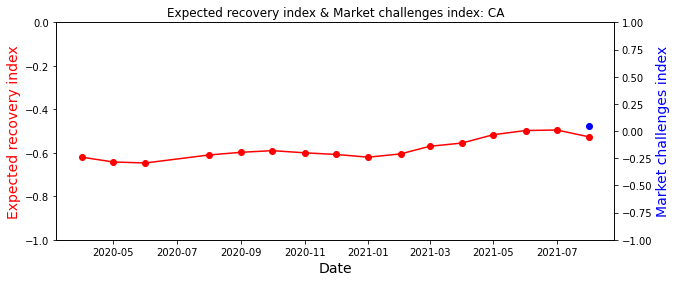

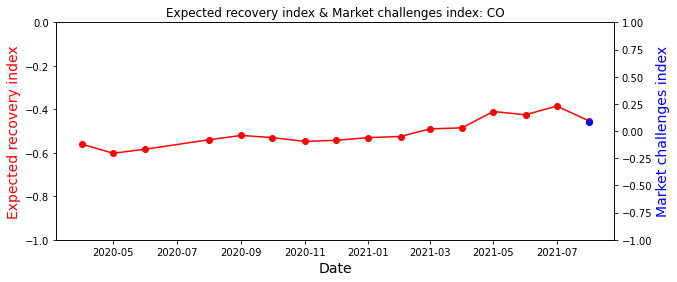

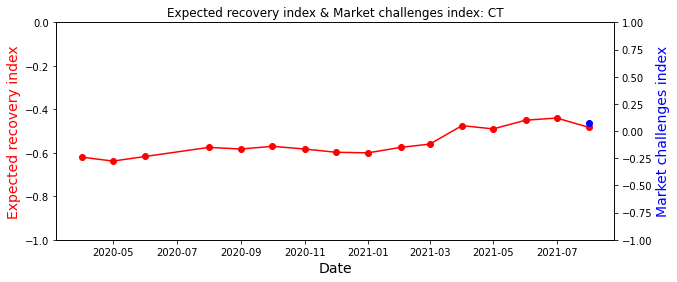

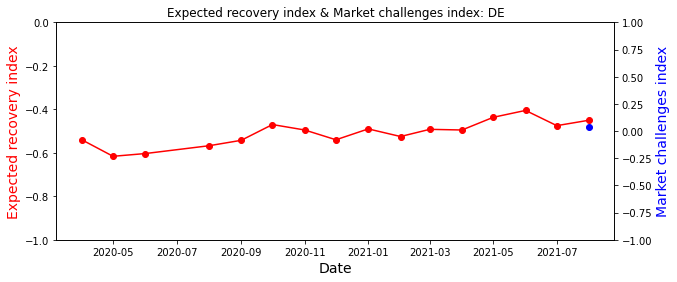

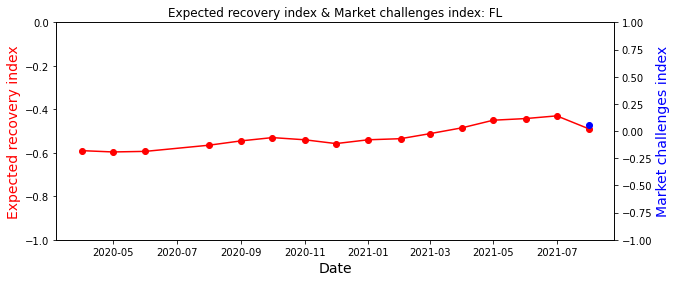

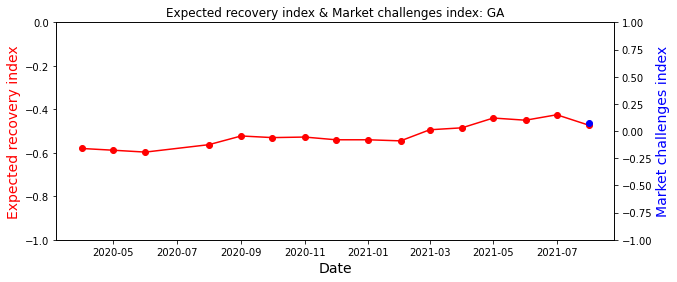

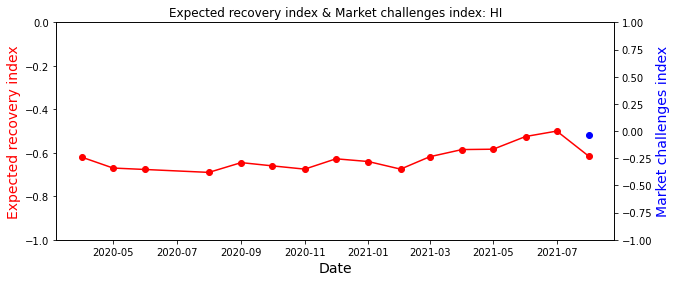

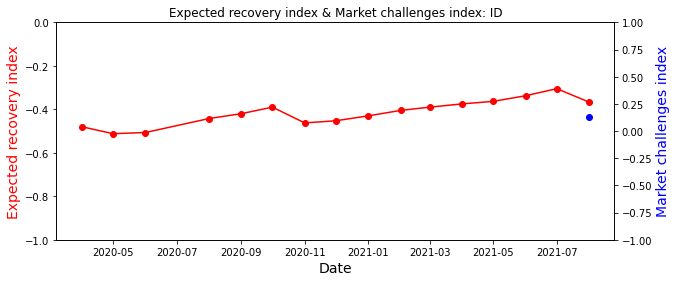

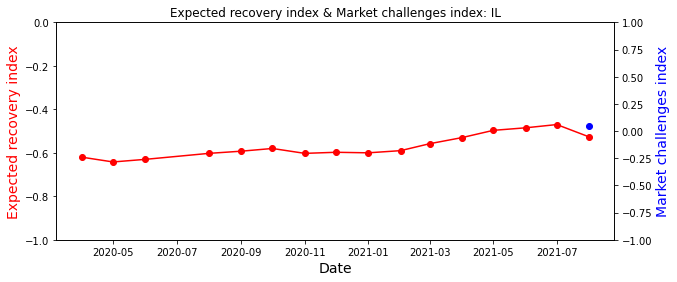

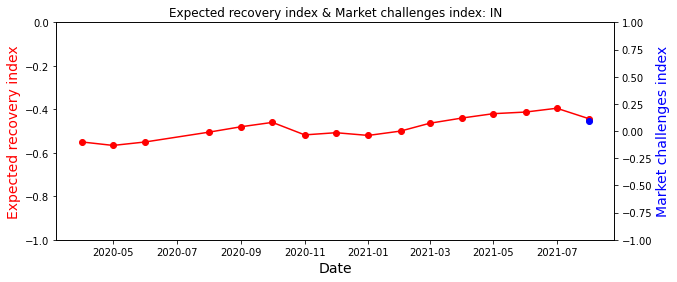

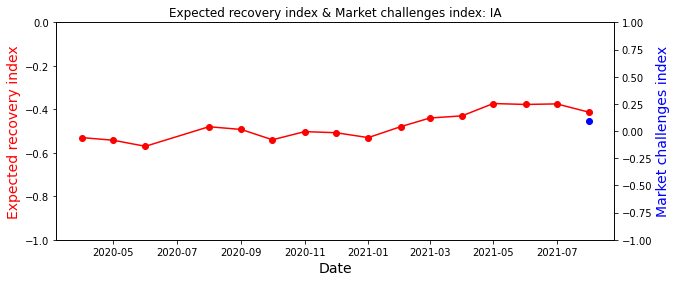

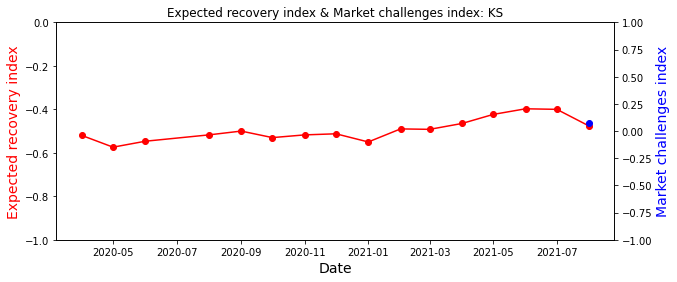

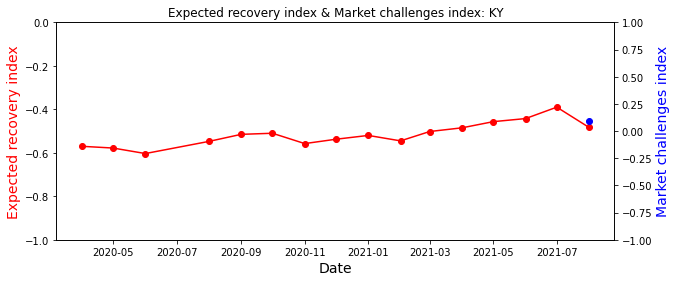

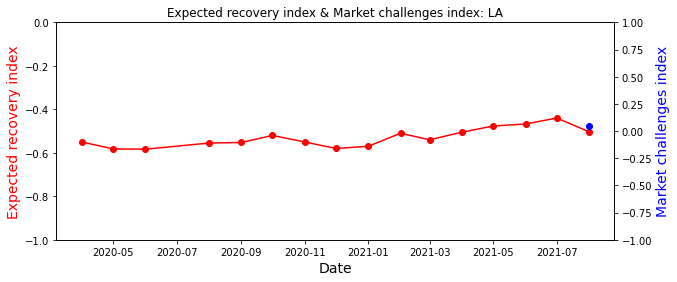

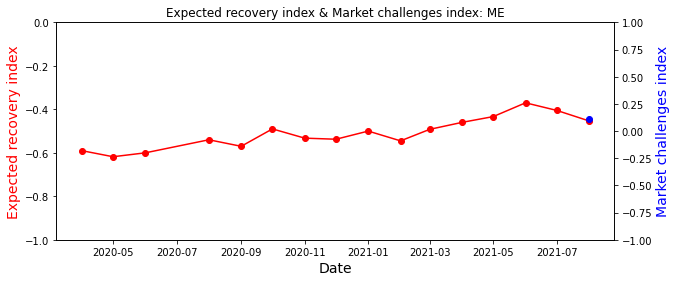

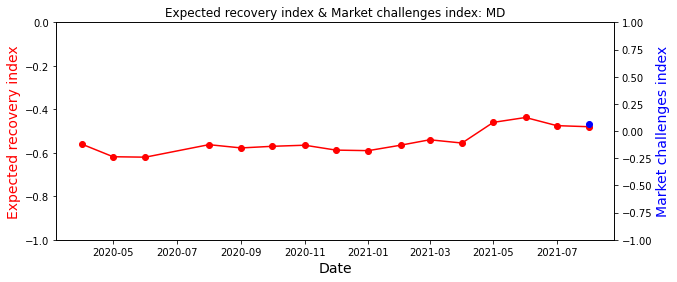

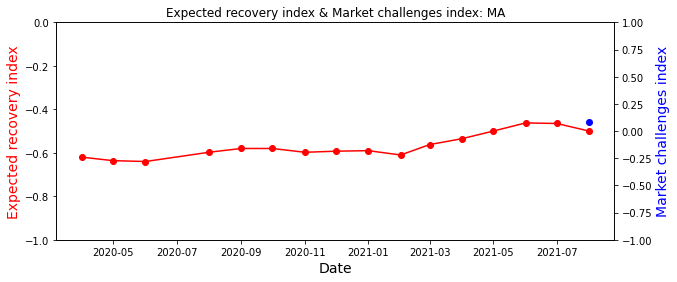

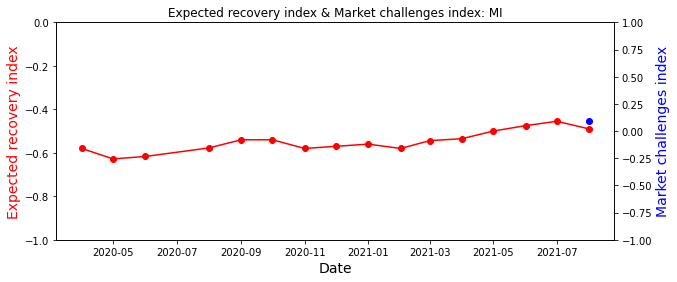

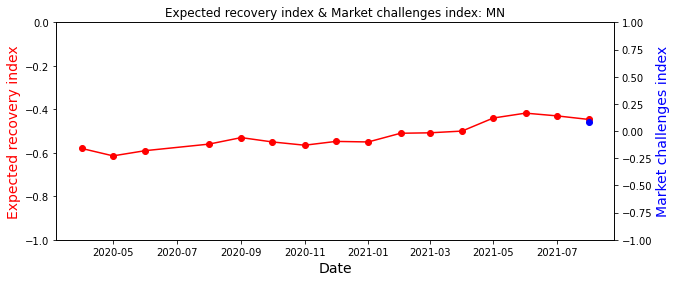

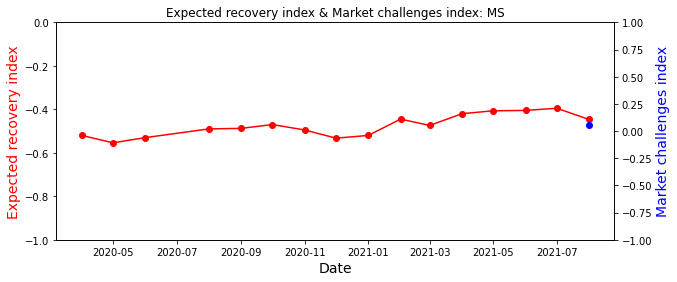

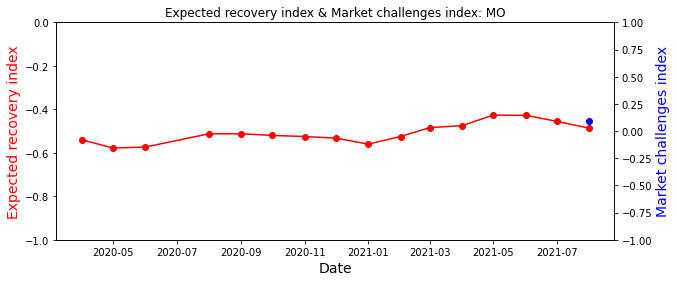

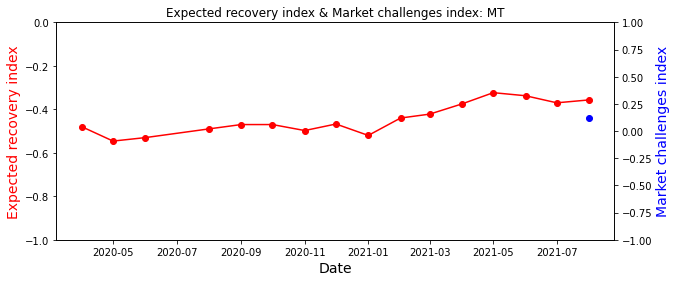

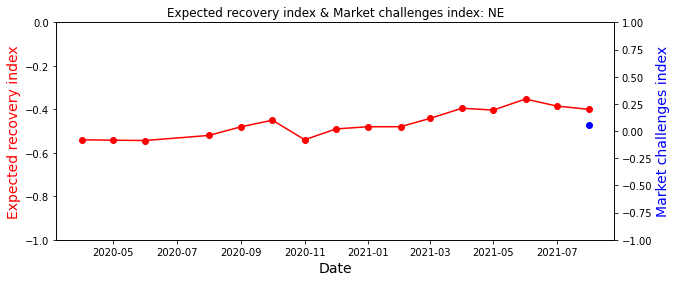

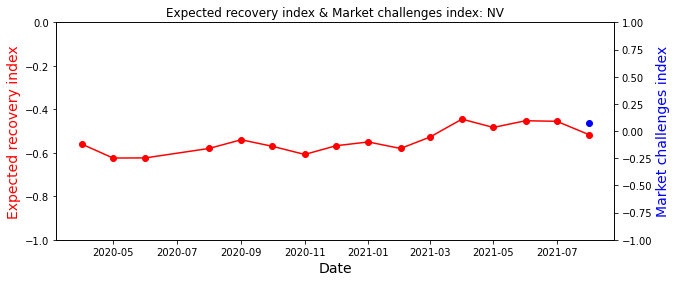

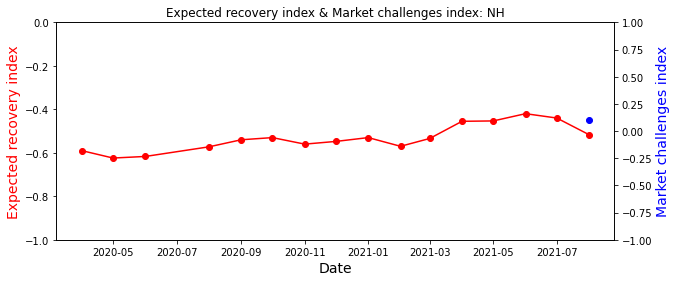

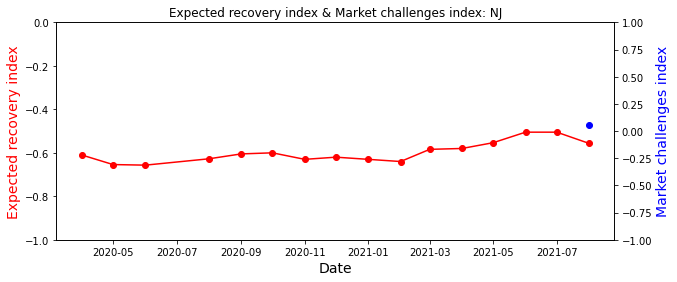

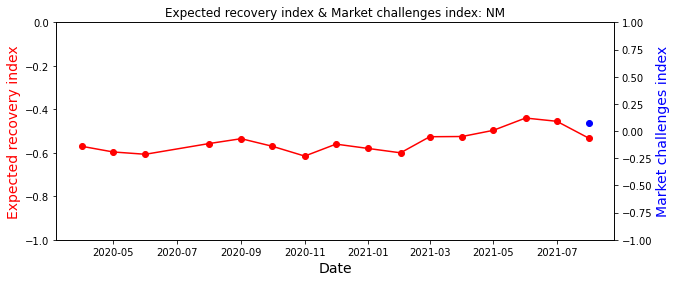

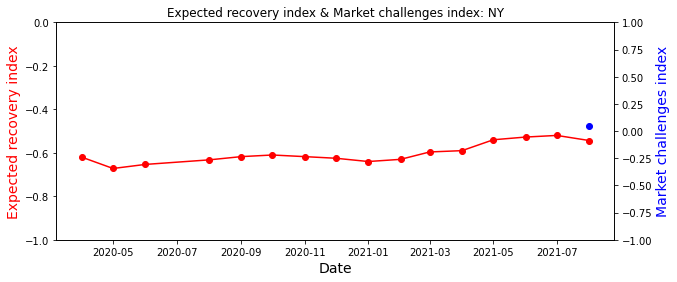

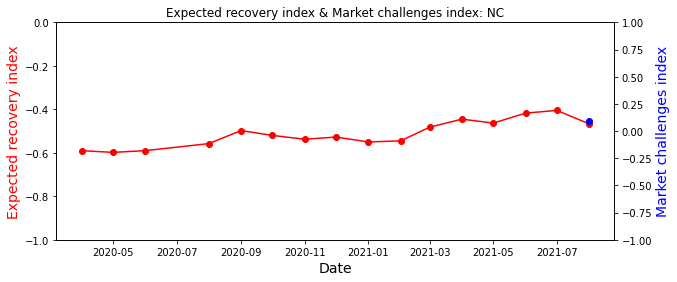

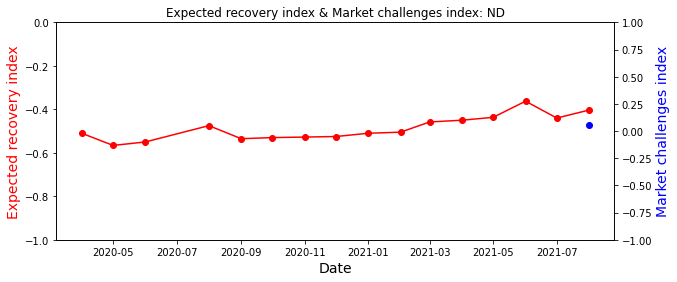

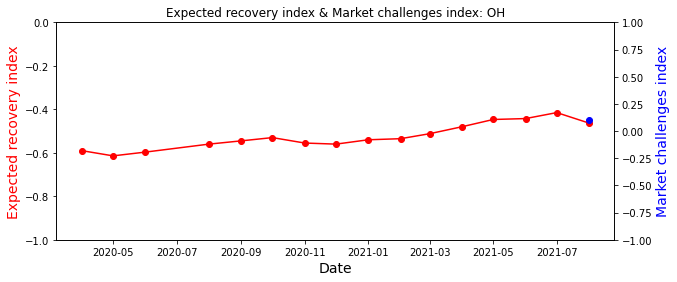

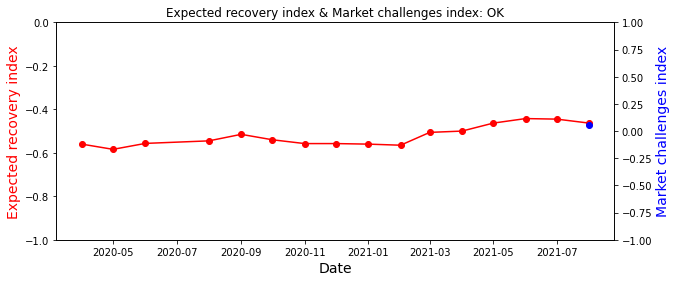

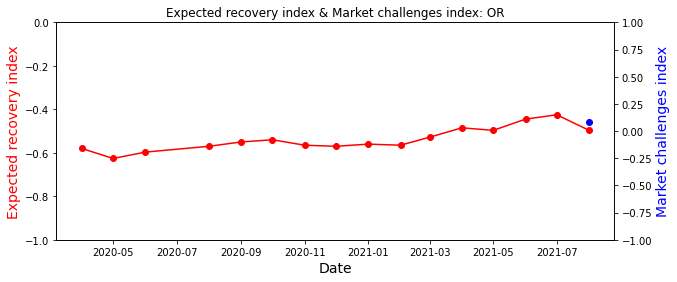

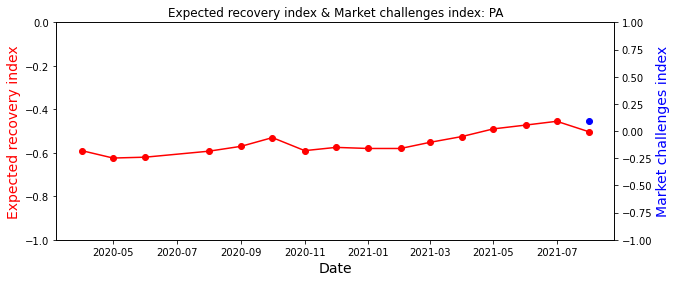

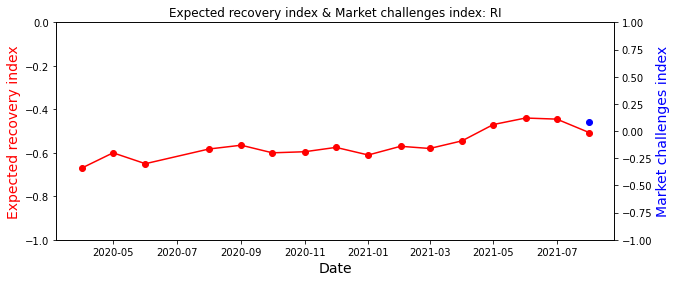

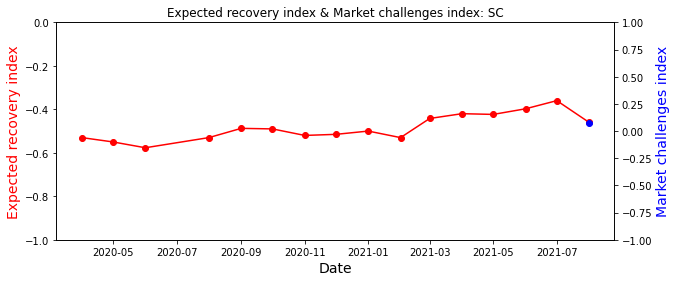

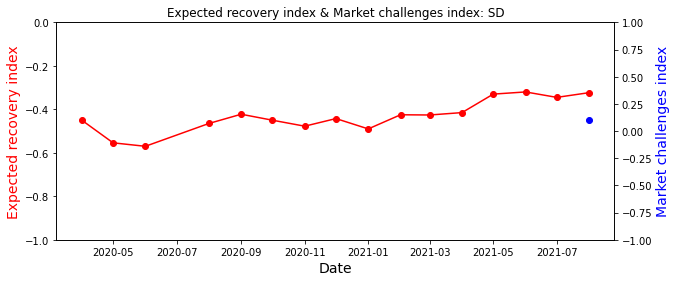

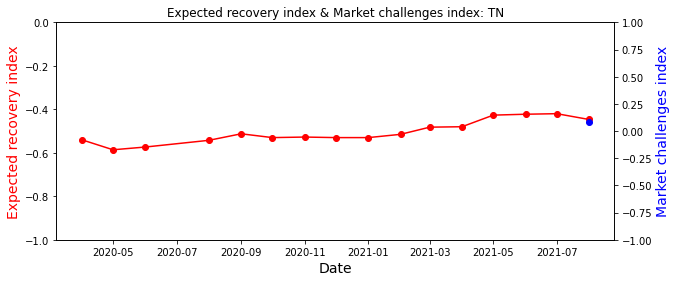

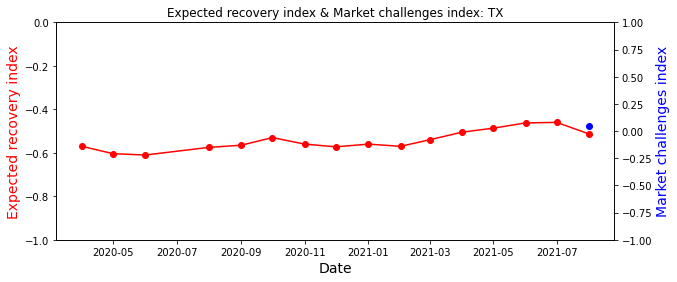

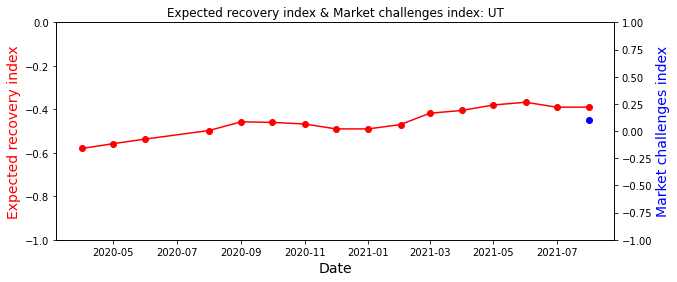

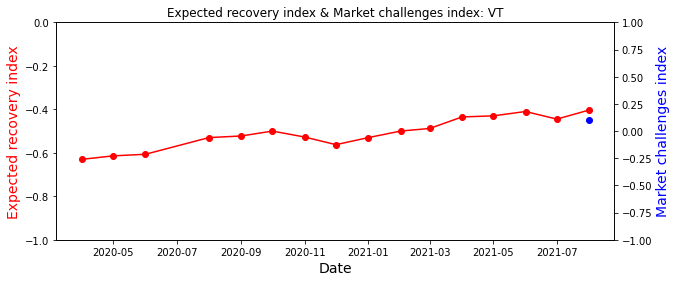

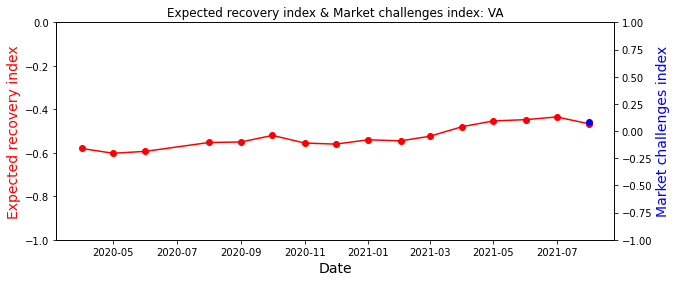

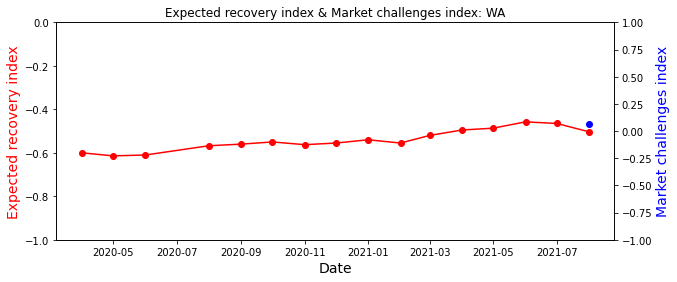

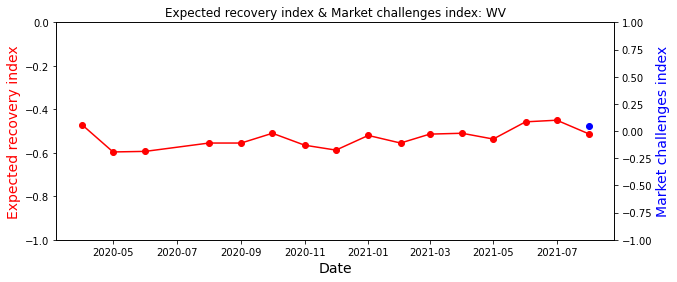

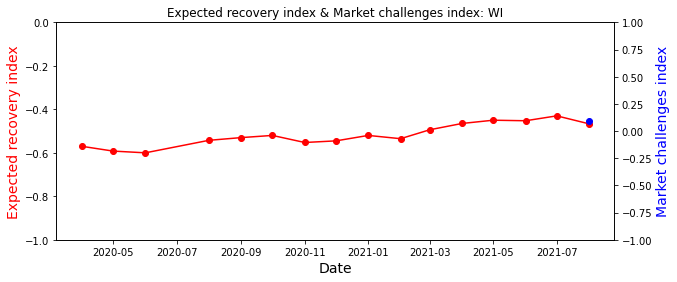

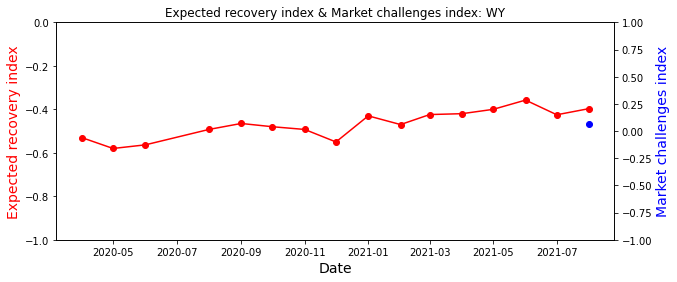

In [29]:
 for state  in df.STATE_ABBR.unique():
   feature_1 ='Expected recovery index'
   feature_2 = 'Market challenges index'
   title = 'Expected recovery index & Market challenges index: '
   df_state = df.loc[df['STATE_ABBR']==state,:]
   fig,ax = plt.subplots(figsize =(10,4))
   ax.plot(df_state.index, df_state[feature_1], color="red", marker="o")
   ax.set_xlabel("Date",fontsize=14)
   ax.set_ylim([-1,0])
   ax.set_ylabel(feature_1,color="red",fontsize=14)

   ax2=ax.twinx()
   ax2.plot(df_state.index, df_state[feature_2],color="blue",marker="o")
   ax2.set_ylabel(feature_2,color="blue",fontsize=14)
   ax2.set_ylim([-1,1])
   plt.title(title +state)
   plt.show()